# Installations

In [1]:
!pip install numpy==1.26.4

In [2]:
!pip install ztfidr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 2.9 MB/s eta 0:00:00


In [3]:
!pip install sncosmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.1/600.1 kB 21.1 MB/s eta 0:00:00
  Created wheel for sncosmo: filename=sncosmo-2.12.0-cp311-cp311-linux_x86_64.whl size=714054 sha256=8cbd7c79bb34b189ab92f05a2f3a693a51c9fce89fca782fe14bd46705ff0ffb
  Stored in directory: /root/.cache/pip/wheels/ae/8a/c1/ff92a40059b556b62e8396315f1cbfe09be96701856525dc51
Successfully built sncosmo


In [4]:
!pip install george

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 kB 7.3 MB/s eta 0:00:00


In [5]:
!pip install emcee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.4 MB/s eta 0:00:00


In [6]:
!pip install corner

In [7]:
!pip install extinction

In [8]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.8/994.8 kB 28.7 MB/s eta 0:00:00


In [9]:
#!pip install piscola

In [10]:
!pip install statsmodels

In [11]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning,
                        message="Attempting to hash a tracer")

# Imports

In [171]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import numpy as np
import ztfidr
import pandas as pd
import shutil
import zipfile
import sncosmo
import random
import time

import scipy.optimize as op
import george
from george import kernels
import emcee
import corner

import extinction

import glob

from astroquery.ipac.irsa.irsa_dust import IrsaDust

from astroquery.irsa_dust import IrsaDust
import astropy.coordinates as coord
import astropy.units as u

from IPython.display import display, HTML

from astropy.coordinates import SkyCoord

import scipy
from scipy import stats

import math
from scipy import linalg, optimize, stats
from scipy.stats.distributions import chi2
from scipy.stats import norm, kstest
from scipy.stats import linregress, t
from numpy import load
from scipy.signal import correlate
from scipy.optimize import curve_fit
import zipfile
from astropy.io import ascii
from sklearn.metrics import mean_squared_error, r2_score
from scipy.interpolate import UnivariateSpline

from scipy.signal import savgol_filter

#import piscola
import io

from scipy.optimize import fsolve

from scipy.integrate import simpson
from numpy import trapz

import statsmodels.api as sm

import sys


In [172]:
pd.options.mode.chained_assignment = None

In [173]:
from numpy import RankWarning

warnings.simplefilter('ignore', RankWarning)

# Data organisation

In [15]:
zip_path = '/content/ztfcosmoidr-main.zip'
extract_to = '/content/data'

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)

Files extracted to: /content/data


In [16]:
unzipped_files = os.listdir(extract_to)
print("Unzipped files:", unzipped_files)

Unzipped files: ['ztfcosmoidr-main']


In [17]:
new_directory = '/content/data/ztfcosmoidr-main/'
os.chdir(new_directory)
print("Current working directory:", os.getcwd())

Current working directory: /content/data/ztfcosmoidr-main


In [18]:
sample = ztfidr.get_sample()

/usr/local/lib/python3.11/dist-packages/ztfidr/lightcurve.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc = pandas.read_csv(filename,  delim_whitespace=True, comment='#')


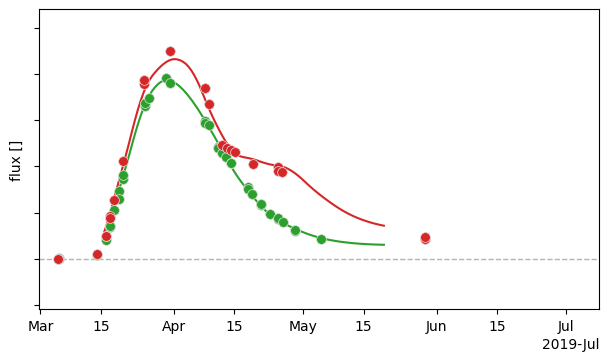

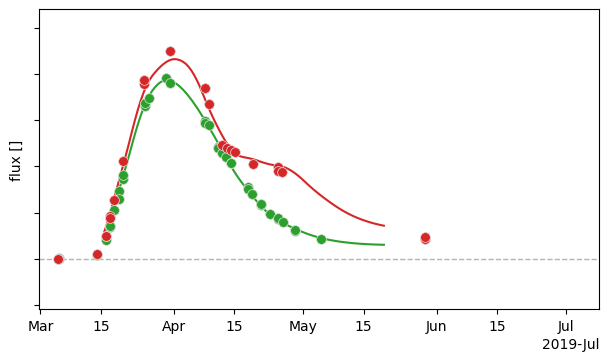

In [19]:
sample.data

lc = sample.get_target_lightcurve("ZTF19aampqcq")
lc.show()

# Plot exploration

In [20]:
directory = "dr2/lightcurves"

all_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

num_to_select = 3

selected_files = random.sample(all_files, num_to_select)

supernovae_titles = [title.split('_')[0] for title in selected_files]
print(supernovae_titles)
print(len(supernovae_titles))

['ZTF19aavivbl', 'ZTF18abupiap', 'ZTF20ablstba']
3


In [21]:
all_contents = os.listdir(directory)

file_count = len([name for name in all_contents if os.path.isfile(os.path.join(directory, name))])

print(f"There are {file_count} files in the directory.")

There are 3630 files in the directory.


/usr/local/lib/python3.11/dist-packages/ztfidr/lightcurve.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc = pandas.read_csv(filename,  delim_whitespace=True, comment='#')


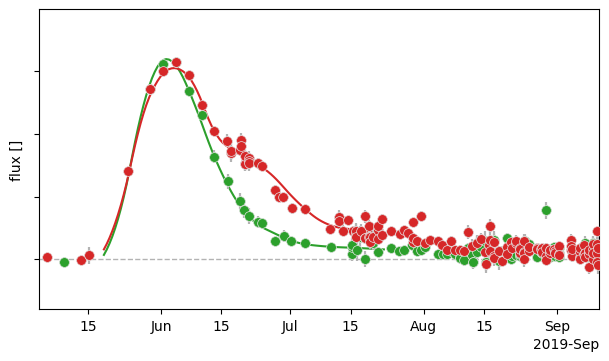

Graph No. 1: ZTF19aavivbl


/usr/local/lib/python3.11/dist-packages/ztfidr/lightcurve.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc = pandas.read_csv(filename,  delim_whitespace=True, comment='#')


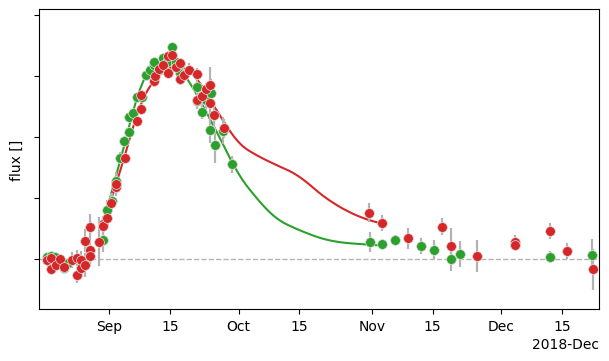

Graph No. 2: ZTF18abupiap


/usr/local/lib/python3.11/dist-packages/ztfidr/lightcurve.py:99: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lc = pandas.read_csv(filename,  delim_whitespace=True, comment='#')


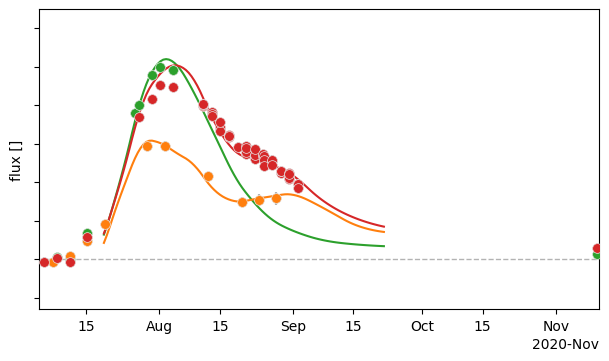

Graph No. 3: ZTF20ablstba


In [22]:
def plot_supernova_lightcurves(titles):
  step = 1
  for title in titles:
        try:
            lc = sample.get_target_lightcurve(title)
            lc.show()
            plt.show()
            print(f"\033[1;91mGraph No. {step}: {title}\033[0m")
            step += 1
        except Exception as e:
            print(f"Failed to plot {title}: {e}")

plot_supernova_lightcurves(supernovae_titles)

#Identifying SNe of interest

Identifying 03fg SNe

In [23]:
file_path = 'dr2/tables/ztfdr2_classifications.csv'

data1 = pd.read_csv(file_path)
targetsn = data1[data1['sub_type'] == '03fg']

print('Your 03fg targets are:')
time.sleep(1)
print(targetsn)

Your 03fg targets are:
           ztfname   sn_type sub_type
1     ZTF18aaadqua  snia-pec     03fg
18    ZTF18aabxrjp  snia-pec     03fg
310   ZTF18abdpvnd  snia-pec     03fg
340   ZTF18abhpgje  snia-pec     03fg
477   ZTF18absbspk  snia-pec     03fg
492   ZTF18abspqsn  snia-pec     03fg
1003  ZTF19aailltc  snia-pec     03fg
1153  ZTF19aanmdsr  snia-pec     03fg
1615  ZTF19abkeuto  snia-pec     03fg
1639  ZTF19abnimpq  snia-pec     03fg
1759  ZTF19abwnpus  snia-pec     03fg
2213  ZTF19adajqwl  snia-pec     03fg
2241  ZTF20aaavvlv  snia-pec     03fg
2382  ZTF20aaiaaoi  snia-pec     03fg
2432  ZTF20aamhocj  snia-pec     03fg
2583  ZTF20aaupolv  snia-pec     03fg
2622  ZTF20aavpnlv  snia-pec     03fg
2719  ZTF20abahhml  snia-pec     03fg
2745  ZTF20abbbumr  snia-pec     03fg
2843  ZTF20abgfekk  snia-pec     03fg
2961  ZTF20aboytzr  snia-pec     03fg
3045  ZTF20abvxdio  snia-pec     03fg
3104  ZTF20abylbuf  snia-pec     03fg
3294  ZTF20ackitai  snia-pec     03fg
3342  ZTF20acnyxln  snia-pe

Identifying 02es SNe

In [24]:
file_path = 'dr2/tables/ztfdr2_classifications.csv'

try:
    data = pd.read_csv(file_path)

    search_pattern = '02es'

    filtered_data = data[data['sub_type'].str.contains(search_pattern, case=False, na=False)]

    if not filtered_data.empty:
        print("Your 02es targets are:")
        print(filtered_data[['ztfname', 'sub_type']])
    else:
        print("No '02es-like' supernovae found in the dataset.")

except Exception as e:
    print(f"An error occurred: {e}")

Your 02es targets are:
           ztfname sub_type
229   ZTF18aayiahw     02es
403   ZTF18abmjyvo     02es
824   ZTF18actasgb     02es
1663  ZTF19abpbqor     02es
2137  ZTF19acxgxcu     02es
2800  ZTF20abegjom     02es
3011  ZTF20abrjmgi     02es


# FILE MAKER

In [25]:
# For adding, deleting, or filling columns in the ATLAS datasets, for use in Piscola, as a specific file format is needed.

light_curve_directory = 'dr2/lightcurves'
file_name = 'ZTF18aayiahw_LC.csv'
file_path = os.path.join(light_curve_directory, file_name)

try:
    data = pd.read_csv(file_path, sep='\s+', comment='#')
except Exception as e:
    print(f"Failed to read {file_path}: {e}")
    data = None

if data is not None:
    explosion_time = 58270
    time_window_start = explosion_time - 100
    time_window_end = explosion_time + 100

    filtered_data = data[(data['mjd'] >= time_window_start) & (data['mjd'] <= time_window_end)]

    filtered_data = filtered_data[['mjd', 'flux', 'flux_err','filter']]

    filtered_data['flux'] =    filtered_data['flux']
    filtered_data['flux_err'] =    filtered_data['flux_err']
    filtered_data['m'] = 'nan'
    filtered_data['dm'] = 'nan'
    filtered_data['F'] = 'F'
    filtered_data['err'] = 'nan'
    filtered_data['chi/N'] = 'nan'
    filtered_data['RA'] = 'nan'
    filtered_data['Dec'] = 'nan'
    filtered_data['x'] = 'nan'
    filtered_data['y'] = 'nan'
    filtered_data['maj'] = 'nan'
    filtered_data['min'] = 'nan'
    filtered_data['phi'] = 'nan'
    filtered_data['apfit'] = 'nan'
    filtered_data['mag5sig'] = 'nan'
    filtered_data['Sky'] = 'nan'
    filtered_data['Obs'] = 'nan'

    filter_to_band_map = {
      'ztfg': 'ztf_g',
      'ztfr': 'ztf_r',
      'ztfi': 'ztf_i'
    }

    filtered_data['F'] = filtered_data['filter'].map(filter_to_band_map)
    filtered_data = filtered_data.drop(columns=['filter'])

    column_order = ['mjd', 'dm', 'm', 'flux', 'flux_err', 'F', 'err', 'chi/N', 'RA', 'Dec',
                    'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs']
    filtered_data = filtered_data[column_order]

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    pd.set_option('display.width', None)

    print(filtered_data.to_string(index=False))

        mjd  dm   m        flux    flux_err     F err chi/N  RA Dec   x   y maj min phi apfit mag5sig Sky Obs
58173.45222 nan nan  1134.77437  1476.06039 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58173.47604 nan nan   141.19205  1421.07444 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58173.54067 nan nan   435.06709  1575.46320 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58173.55762 nan nan  2595.04073  1784.42495 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58174.44686 nan nan   -86.12082  1128.40910 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58174.47777 nan nan  -508.53558  1546.20207 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58174.54032 nan nan -1364.01559  2063.00337 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58174.54433 nan nan  -682.38942  1907.79682 ztf_i nan   nan nan nan nan nan nan nan nan   nan     nan nan nan
58182.4410

# Investigation of lightcurves

In [26]:
light_curve_directory = 'dr2/lightcurves'

file_name = 'ZTF18aayiahw_LC.csv'

file_path = os.path.join(light_curve_directory, file_name)

try:
    with open(file_path, 'r') as file:
        content = file.read()
except Exception as e:
    print(f"Failed to read {file_path}: {e}")

data = pd.read_csv(file_path, sep='\s+', comment='#')

data_ztfg = data[data['filter'] == 'ztfg']
data_ztfr = data[data['filter'] == 'ztfr']

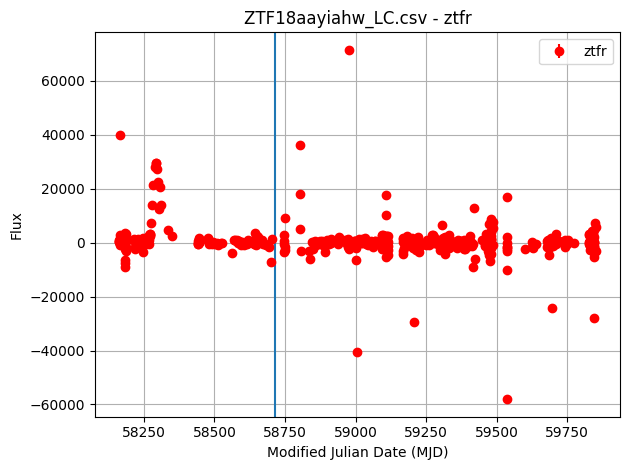

In [27]:
window = 150

data_ztfr = data[data['filter'] == 'ztfr']

#plt.ylim(-2000,40000)
#plt.xlim(58200,58400)
plt.axvline(x=58714)
plt.errorbar(data_ztfr['mjd'], data_ztfr['flux'], yerr=0, fmt='o', color='red', label='ztfr')
plt.title(f'{os.path.basename(file_path)} - ztfr')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

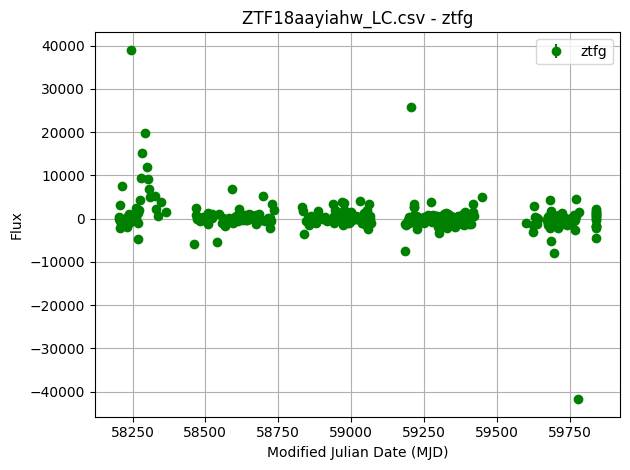

In [28]:
window = 150
data_ztfg = data[data['filter'] == 'ztfg']

#plt.ylim(-2000,40000)
#plt.xlim(58200,58400)

plt.errorbar(data_ztfg['mjd'], data_ztfg['flux'], yerr=0, fmt='o', color='green', label='ztfg')
plt.title(f'{os.path.basename(file_path)} - ztfg')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

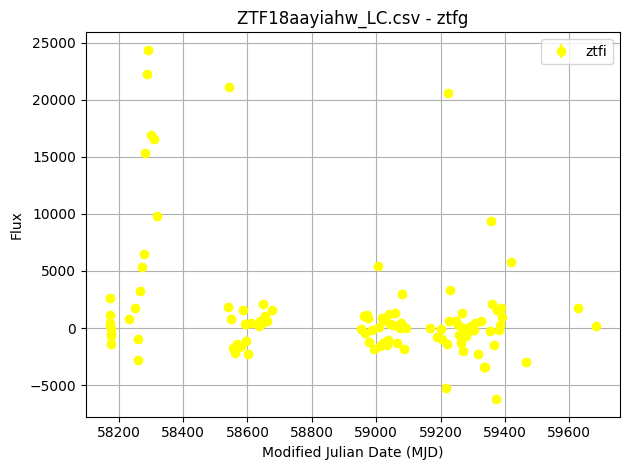

In [29]:
window = 150
data_ztfi = data[data['filter'] == 'ztfi']
#print(data_ztfi)
#plt.ylim(-2000,40000)
#plt.xlim(58200,58400)

plt.errorbar(data_ztfi['mjd'], data_ztfi['flux'], yerr=0, fmt='o', color='yellow', label='ztfi')
plt.title(f'{os.path.basename(file_path)} - ztfg')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Automating and randomising lightcurve retrieval

For the green band

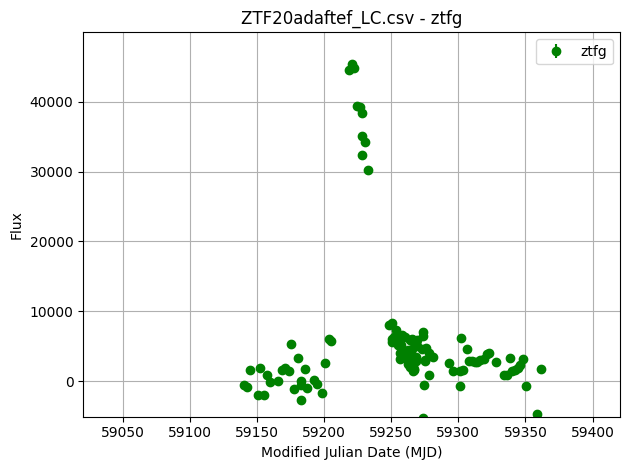

Graph No. 1: ZTF20adaftef_LC.csv


In [33]:
def plot_supernova_lightcurves_id(directory, num_files=None):
    file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('_LC.csv')]

    random.shuffle(file_paths)

    if num_files is not None:
        file_paths = file_paths[:num_files]

    step = 1

    for file_path in file_paths:
        try:
            data = pd.read_csv(file_path, sep='\s+', comment='#')

            window = 200

            data_ztfg = data[data['filter'] == 'ztfg']

            peak_timeg = data_ztfg.loc[data_ztfg['flux'].idxmax(), 'mjd']

            min_fluxg = max(data_ztfg['flux'].min(), -500)
            max_fluxg = data_ztfg['flux'].max()
            padg = (max_fluxg - min_fluxg) * 0.1
            plt.ylim(min_fluxg - padg, max_fluxg + padg)
            plt.xlim(peak_timeg - window, peak_timeg + window)

            plt.errorbar(data_ztfg['mjd'], data_ztfg['flux'], yerr=0, fmt='o', color='green', label='ztfg')
            plt.title(f'{os.path.basename(file_path)} - ztfg')
            plt.xlabel('Modified Julian Date (MJD)')
            plt.ylabel('Flux')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            print(f"\033[1;91mGraph No. {step}: {os.path.basename(file_path)}\033[0m")
            step += 1
        except Exception as e:
            print(f"Failed to plot {os.path.basename(file_path)}: {e}")

light_curve_directory = 'dr2/lightcurves'
plot_supernova_lightcurves_id(light_curve_directory, num_files=1)

For the red band

<ipython-input-34-ae9e5308d5bb>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


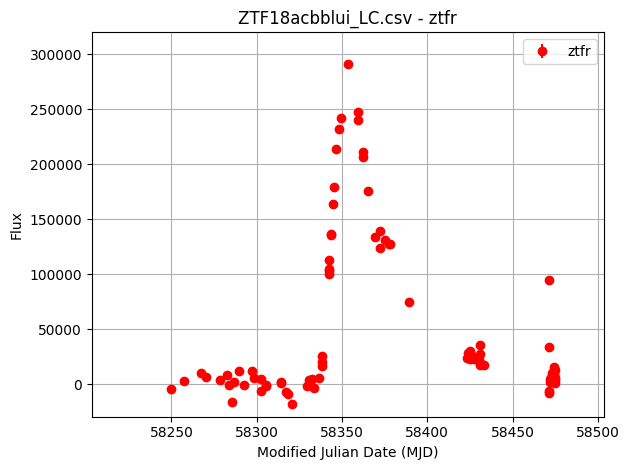

Graph No. 1: ZTF18acbblui_LC.csv


In [34]:
def plot_supernova_lightcurves_id(directory, num_files=None):
    file_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('_LC.csv')]

    random.shuffle(file_paths)

    if num_files is not None:
        file_paths = file_paths[:num_files]

    step = 1

    for file_path in file_paths:
        try:
            data = pd.read_csv(file_path, delim_whitespace=True, comment='#')

            window = 150

            data_ztfr = data[data['filter'] == 'ztfr']

            peak_timer = data_ztfr.loc[data_ztfr['flux'].idxmax(), 'mjd']

            min_fluxr = max(data_ztfr['flux'].min(), -500)
            max_fluxr = data_ztfr['flux'].max()
            padr = (max_fluxr - min_fluxr) * 0.1
            plt.ylim(min_fluxr - padr, max_fluxr + padr)
            plt.xlim(peak_timer - window, peak_timer + window)


            plt.errorbar(data_ztfr['mjd'], data_ztfr['flux'], yerr=0, fmt='o', color='red', label='ztfr')
            plt.title(f'{os.path.basename(file_path)} - ztfr')
            plt.xlabel('Modified Julian Date (MJD)')
            plt.ylabel('Flux')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()

            print(f"\033[1;91mGraph No. {step}: {os.path.basename(file_path)}\033[0m")
            step += 1
        except Exception as e:
            print(f"Failed to plot {os.path.basename(file_path)}: {e}")

light_curve_directory = 'dr2/lightcurves'
plot_supernova_lightcurves_id(light_curve_directory, num_files=1)

<ipython-input-49-b136e9671302>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


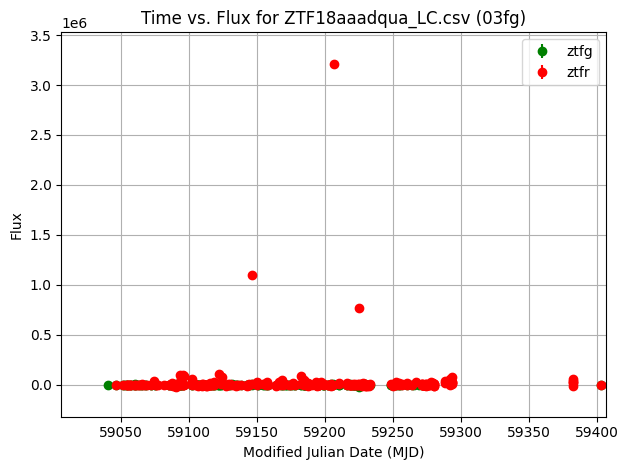

<ipython-input-49-b136e9671302>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


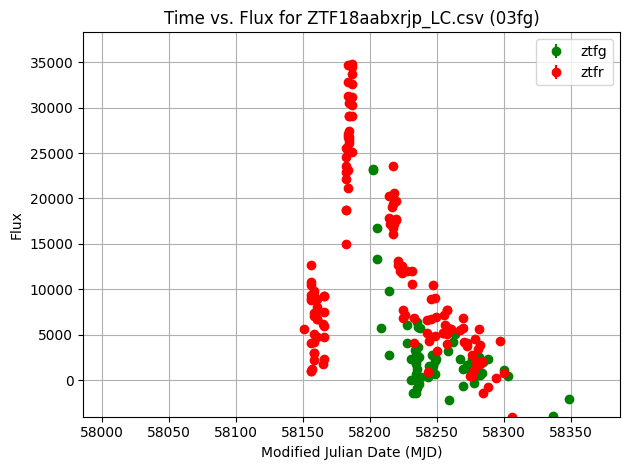

<ipython-input-49-b136e9671302>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


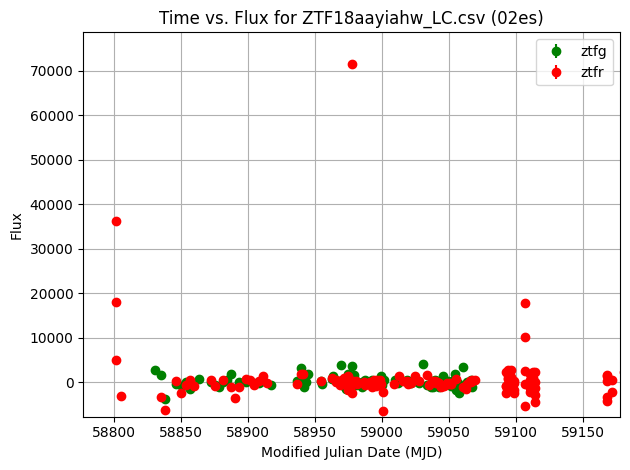

<ipython-input-49-b136e9671302>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


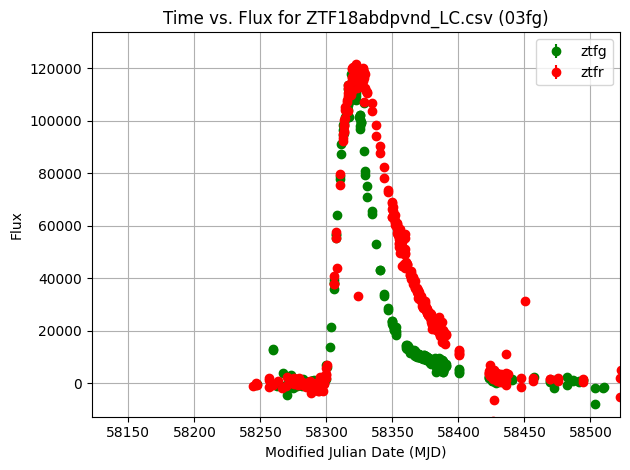

<ipython-input-49-b136e9671302>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, comment='#')


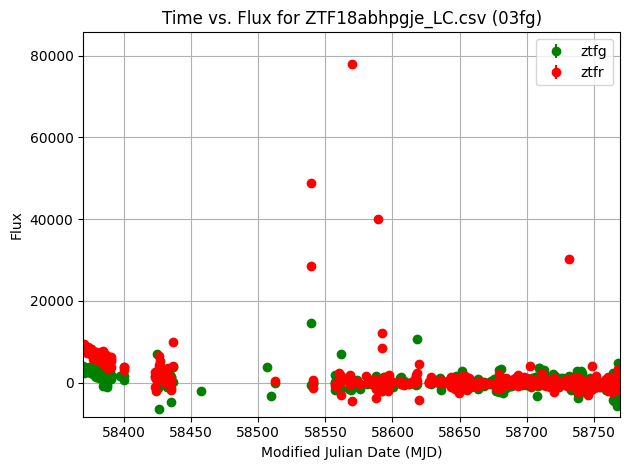

In [49]:
light_curve_directory = 'dr2/lightcurves'
classification_table_path = os.path.join('dr2/tables', 'ztfdr2_classifications.csv')

try:
    classifications = pd.read_csv(classification_table_path)
    filtered_classifications = classifications[classifications['sub_type'].isin(['03fg', '02es'])]
except Exception as e:
    print(f"Failed to read classification table: {e}")
    raise

count = 0

for index, row in filtered_classifications.iterrows():
  count = count + 1
  if count >= 6:
      break

  sn_name = row['ztfname']
  sn_subtype = row['sub_type']
  file_name = f'{sn_name}_LC.csv'
  file_path = os.path.join(light_curve_directory, file_name)

  try:
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#')
        data_ztfg = data[data['filter'] == 'ztfg']
        data_ztfr = data[data['filter'] == 'ztfr']

        window = 200

        data_ztfg = data[data['filter'] == 'ztfg']

        peak_timeg = data_ztfg.loc[data_ztfg['flux'].idxmax(), 'mjd']
        peak_timer = data_ztfr.loc[data_ztfr['flux'].idxmax(), 'mjd']

        min_fluxg = max(data_ztfg['flux'].min(), -500)
        max_fluxg = data_ztfg['flux'].max()
        padg = (max_fluxg - min_fluxg) * 0.5
        plt.ylim(min_fluxg - padg, max_fluxg + padg)
        plt.xlim(peak_timeg - window, peak_timeg + window)

        min_fluxr = max(data_ztfr['flux'].min(), -500)
        max_fluxr = data_ztfr['flux'].max()
        padr = (max_fluxr - min_fluxr) * 0.1
        plt.ylim(min_fluxr - padr, max_fluxr + padr)
        plt.xlim(peak_timer - window, peak_timer + window)

        plt.errorbar(data_ztfg['mjd'], data_ztfg['flux'], yerr=0, fmt='o', color='green', label='ztfg')
        plt.errorbar(data_ztfr['mjd'], data_ztfr['flux'], yerr=0, fmt='o', color='red', label='ztfr')

        plt.title(f'Time vs. Flux for {file_name} ({sn_subtype})')
        plt.xlabel('Modified Julian Date (MJD)')
        plt.ylabel('Flux')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

  except Exception as e:
        print(f"Failed to process {file_path}: {e}")

# Initial use of George GP regression

In [35]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF18aayiahw'

sn_lc = os.path.join(directory, f'{supernova_id}_LC.csv')

print("Path to the light curve file:", sn_lc)

sn_lc = pd.read_csv(sn_lc, sep='\s+', comment = '#')

Path to the light curve file: dr2/lightcurves/ZTF18aayiahw_LC.csv


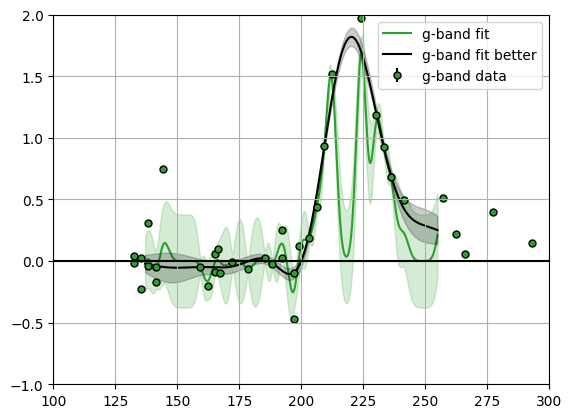

In [36]:
tcorr = 58270 - 200
fcorr = 1e4

sn_lc_g=sn_lc.loc[sn_lc['filter']=='ztfg']
sn_mjd_g= sn_lc_g['mjd'].values - tcorr
sn_flux_g=sn_lc_g['flux'].values/fcorr
sn_fluxerr_g=sn_lc_g['flux_err'].values/fcorr

plt.errorbar(sn_mjd_g,sn_flux_g,yerr=0, fmt='o',color='tab:green',markersize=5, markeredgecolor='k',ecolor='k', label='g-band data',zorder=1)
plt.xlim(100,300)

max_fluxg = sn_flux_g.max()
min_fluxg = max(sn_flux_g.min(), -500)
padg = (max_fluxg - min_fluxg) * 0.2
#plt.ylim(-2, max_fluxg + padg)

plt.ylim(-1, 2)

plt.grid(True)

lengthscale = 2
kernel = np.var(sn_flux_g)*kernels.ExpSquaredKernel(lengthscale ** 2)

gp_regressor = george.GP(kernel)
p0 = gp_regressor.get_parameter_vector() # these are my inital parameters, i need it for later
gp_regressor.compute(sn_mjd_g, sn_fluxerr_g)

sn_mjd_pred = np.arange(137, 255, 0.1)

sn_flux_g_pred, sn_fluxerr_g_var = gp_regressor.predict(sn_flux_g, sn_mjd_pred, return_var=True)

plt.fill_between(sn_mjd_pred, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var),
                 sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var),
                 color="tab:green", alpha=0.2,zorder=0)
plt.plot(sn_mjd_pred, sn_flux_g_pred, "tab:green", lw=1.5,
         zorder=0,label='g-band fit')

plt.axhline(y=0, color = 'black')

def neg_ln_like(p):
    gp_regressor.set_parameter_vector(p)

    return -gp_regressor.log_likelihood(sn_flux_g, quiet=True)

def grad_neg_ln_like(p):
    gp_regressor.set_parameter_vector(p)

    return -gp_regressor.grad_log_likelihood(sn_flux_g, quiet=True)

fit_results = op.minimize(neg_ln_like, p0, jac=grad_neg_ln_like)

gp_regressor.set_parameter_vector(fit_results.x)

sn_flux_g_pred_better, sn_fluxerr_g_var_better = gp_regressor.predict(sn_flux_g, sn_mjd_pred, return_var=True)

plt.fill_between(sn_mjd_pred, sn_flux_g_pred_better - np.sqrt(sn_fluxerr_g_var_better),
                 sn_flux_g_pred_better + np.sqrt(sn_fluxerr_g_var_better),
                 color="k", alpha=0.2,zorder=0)
plt.plot(sn_mjd_pred, sn_flux_g_pred_better, "k", lw=1.5,
         zorder=0,label='g-band fit better')

plt.legend()
plt.show()

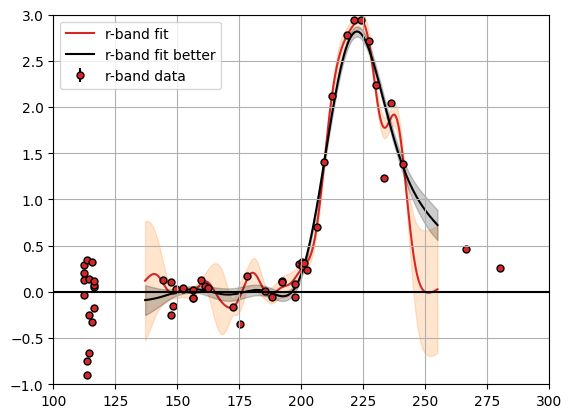

In [37]:
sn_lc_r=sn_lc.loc[sn_lc['filter']=='ztfr']
sn_mjd_r= sn_lc_r['mjd'].values - tcorr
sn_flux_r=sn_lc_r['flux'].values/fcorr
sn_fluxerr_r=sn_lc_r['flux_err'].values/fcorr

plt.errorbar(sn_mjd_r,sn_flux_r,yerr=0, fmt='o',color='tab:red',markersize=5, markeredgecolor='k',ecolor='k', label='r-band data',zorder=1)
plt.xlim(100,300)

min_fluxr = max(sn_flux_r.min(), -500)
max_fluxr = sn_flux_r.max()
padr = (max_fluxr - min_fluxr) * 0.1
plt.ylim(-2, max_fluxr + padr)
plt.ylim(-1, 3)
plt.grid(True)

plt.axhline(y=0, color = 'black')

lengthscale = 5

kernel = np.var(sn_flux_r)*kernels.ExpSquaredKernel(lengthscale ** 2)

gp_regressor = george.GP(kernel)
p0 = gp_regressor.get_parameter_vector()
gp_regressor.compute(sn_mjd_r, sn_fluxerr_r)

sn_flux_r_pred, sn_fluxerr_r_var = gp_regressor.predict(sn_flux_r, sn_mjd_pred, return_var=True)

plt.fill_between(sn_mjd_pred, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color="tab:orange", alpha=0.2,zorder=0)
plt.plot(sn_mjd_pred, sn_flux_r_pred, "tab:red", lw=1.5, zorder=0,label='r-band fit')

def neg_ln_like(p):
    gp_regressor.set_parameter_vector(p)

    return -gp_regressor.log_likelihood(sn_flux_r, quiet=True)

def grad_neg_ln_like(p):
    gp_regressor.set_parameter_vector(p)

    return -gp_regressor.grad_log_likelihood(sn_flux_r, quiet=True)

fit_results = op.minimize(neg_ln_like, p0, jac=grad_neg_ln_like)

gp_regressor.set_parameter_vector(fit_results.x)

sn_flux_r_pred_better, sn_fluxerr_r_var_better = gp_regressor.predict(sn_flux_r, sn_mjd_pred, return_var=True)

plt.fill_between(sn_mjd_pred, sn_flux_r_pred_better - np.sqrt(sn_fluxerr_r_var_better),sn_flux_r_pred_better + np.sqrt(sn_fluxerr_r_var_better),color="k", alpha=0.2,zorder=0)
plt.plot(sn_mjd_pred, sn_flux_r_pred_better, "k", lw=1.5, zorder=0,label='r-band fit better')

plt.legend()
plt.show()

# Filtering data for SNe of interest

In [50]:
def clean_flux_data(file_path, lower_percentile=1, upper_percentile=99):
    data = pd.read_csv(file_path, sep='\s+', comment='#')

    data['flux_ztfr'] = np.nan
    data['flux_ztfg'] = np.nan
    data['flux_ztfi'] = np.nan

    data.loc[data['filter'] == 'ztfr', 'flux_ztfr'] = data['flux']
    data.loc[data['filter'] == 'ztfg', 'flux_ztfg'] = data['flux']
    data.loc[data['filter'] == 'ztfi', 'flux_ztfi'] = data['flux']

    for col in ['flux_ztfr', 'flux_ztfg', 'flux_ztfi']:
        if not data[col].isna().all():
            lower_bound = data[col].quantile(lower_percentile / 100.0)
            upper_bound = data[col].quantile(upper_percentile / 100.0)
            data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = np.nan

    data.drop(columns=['flux'], inplace=True)

    cleaned_file_path = os.path.splitext(file_path)[0] + '_cleaned.csv'
    data.to_csv(cleaned_file_path, index=False)
    #print(f"Cleaned data saved to {cleaned_file_path}")

directory_path = 'dr2/lightcurves'
specific_files = [
    'ZTF18aabxrjp_LC.csv', 'ZTF18abspqsn_LC.csv', 'ZTF19abnimpq_LC.csv', 'ZTF20aaiaaoi_LC.csv', 'ZTF20aaavvlv_LC.csv',
    'ZTF19acxgxcu_LC.csv', 'ZTF19abkeuto_LC.csv', 'ZTF20aamhocj_LC.csv', 'ZTF20aaupolv_LC.csv', 'ZTF20abvxdio_LC.csv',
    'ZTF20abylbuf_LC.csv', 'ZTF20ackitai_LC.csv', 'ZTF20acnyxln_LC.csv', 'ZTF19acxgxcu_LC.csv','ZTF18aaadqua_LC.csv',
    'ZTF18abdpvnd_LC.csv','ZTF18abhpgje_LC.csv','ZTF18absbspk_LC.csv','ZTF19aailltc_LC.csv','ZTF19aanmdsr_LC.csv',
    'ZTF19abwnpus_LC.csv','ZTF19adajqwl_LC.csv','ZTF20aavpnlv_LC.csv','ZTF20abahhml_LC.csv','ZTF20abbbumr_LC.csv',
    'ZTF20abgfekk_LC.csv','ZTF20aboytzr_LC.csv','ZTF20acpilio_LC.csv','ZTF20acyybvq_LC.csv',
    'ZTF20adadmsg_LC.csv','ZTF20aatvdwr_LC.csv','ZTF18aayiahw_LC.csv','ZTF18abmjyvo_LC.csv','ZTF18actasgb_LC.csv',
    'ZTF19abpbqor_LC.csv','ZTF20abegjom_LC.csv','ZTF20abrjmgi_LC.csv']

csv_files = [os.path.join(directory_path, f) for f in specific_files if os.path.exists(os.path.join(directory_path, f))]

for file in csv_files:
    clean_flux_data(file)

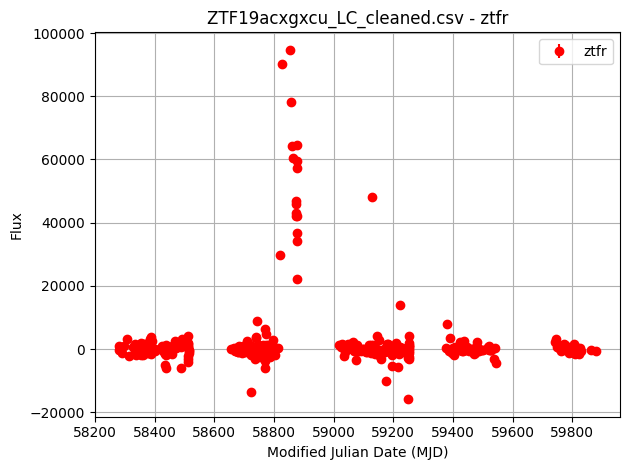

In [51]:
light_curve_directory = 'dr2/lightcurves'

file_name = 'ZTF19acxgxcu_LC_cleaned.csv'

file_path = os.path.join(light_curve_directory, file_name)

try:
    with open(file_path, 'r') as file:
        content = file.read()
except Exception as e:
    print(f"Failed to read {file_path}: {e}")

data = pd.read_csv(file_path, comment='#')

window = 150

plt.errorbar(data['mjd'], data['flux_ztfr'], yerr=0, fmt='o', color='red', label='ztfr')
plt.title(f'{os.path.basename(file_path)} - ztfr')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

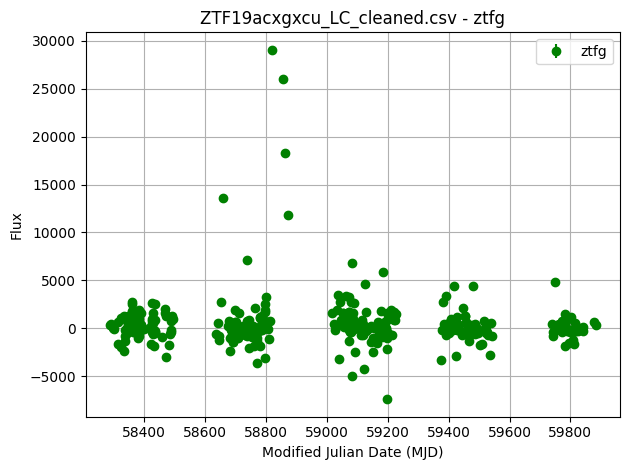

In [52]:
plt.errorbar(data['mjd'], data['flux_ztfg'], yerr=0, fmt='o', color='green', label='ztfg')
plt.title(f'{os.path.basename(file_path)} - ztfg')
plt.xlabel('Modified Julian Date (MJD)')
plt.ylabel('Flux')
plt.legend()
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

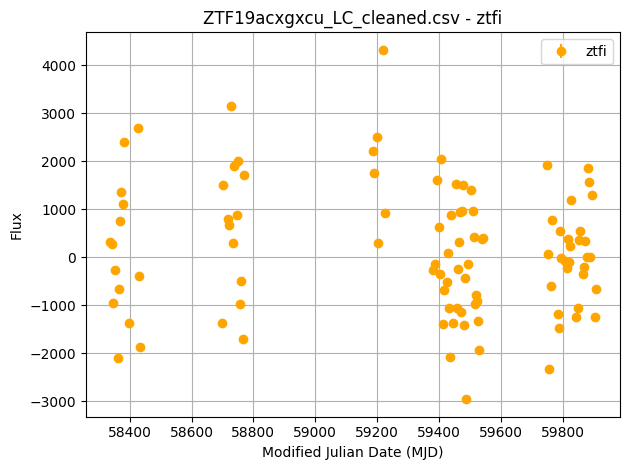

In [53]:
try:
  plt.errorbar(data['mjd'], data['flux_ztfi'], yerr=0, fmt='o', color='orange', label='ztfi')
  plt.title(f'{os.path.basename(file_path)} - ztfi')
  plt.xlabel('Modified Julian Date (MJD)')
  plt.ylabel('Flux')
  plt.legend()
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()
except Exception as e:
    print('No i-band data found', {e})

# Initial testing of plotting data and fitting

I've retained this for comepleteness, to show the progression through understanding of how to use George and manipulate the data

In [77]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF20adadmsg'

sn_lc = os.path.join(directory, f'{supernova_id}_LC.csv')

print("Path to the light curve file:", sn_lc)

sn_lc = pd.read_csv(sn_lc,delim_whitespace=True, comment = '#')

Path to the light curve file: dr2/lightcurves/ZTF20adadmsg_LC.csv


<ipython-input-77-eeb8a33784a3>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  sn_lc = pd.read_csv(sn_lc,delim_whitespace=True, comment = '#')


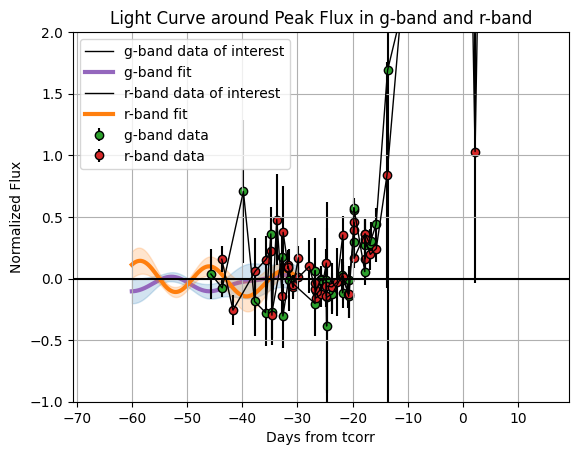

In [81]:
tcorr = 59220
fcorr = 1e4

#Green
sn_lc_g=sn_lc.loc[sn_lc['filter']=='ztfg']
sn_mjd_g= sn_lc_g['mjd'].values - tcorr
sn_flux_g=sn_lc_g['flux'].values/fcorr

sn_lc_g = sn_lc.loc[sn_lc['filter'] == 'ztfg']
sn_lc_g['mjd_corrected'] = sn_lc_g['mjd'] - tcorr
sn_lc_g['flux_normalized'] = sn_lc_g['flux'] / fcorr
sn_fluxerr_g=sn_lc_g['flux_err'].values/fcorr

peak_flux_indexg = sn_lc_g['flux'].idxmax()
peak_flux_mjdg = sn_lc_g.loc[peak_flux_indexg, 'mjd_corrected']

start_timeg = peak_flux_mjdg - 50

filtered_datag = sn_lc_g[(sn_lc_g['mjd_corrected'] >= start_timeg) & (sn_lc_g['mjd_corrected'] <= peak_flux_mjdg)]

#Red
sn_lc_r=sn_lc.loc[sn_lc['filter']=='ztfr']
sn_mjd_r= sn_lc_r['mjd'].values - tcorr
sn_flux_r=sn_lc_r['flux'].values/fcorr

sn_lc_r = sn_lc.loc[sn_lc['filter'] == 'ztfr']
sn_lc_r['mjd_corrected'] = sn_lc_r['mjd'] - tcorr
sn_lc_r['flux_normalized'] = sn_lc_r['flux'] / fcorr
sn_fluxerr_r=sn_lc_r['flux_err'].values/fcorr

peak_flux_indexr = sn_lc_r['flux'].idxmax()
peak_flux_mjdr = sn_lc_r.loc[peak_flux_indexr, 'mjd_corrected']

start_timer = peak_flux_mjdr - 50

filtered_datar = sn_lc_r[(sn_lc_r['mjd_corrected'] >= start_timer) & (sn_lc_r['mjd_corrected'] <= peak_flux_mjdr)]

lengthscale = 6

# Green band GP
kernelg = np.var(sn_lc_g['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorg = george.GP(kernelg)
gp_regressorg.compute(sn_lc_g['mjd_corrected'], sn_fluxerr_g)
sn_mjd_predg = np.linspace(-60,-30,300)
sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(sn_lc_g['flux_normalized'], sn_mjd_predg, return_var=True)

# Red band GP
kernelr = np.var(sn_lc_r['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorr = george.GP(kernelr)
gp_regressorr.compute(sn_lc_r['mjd_corrected'], sn_fluxerr_r)
sn_mjd_predr = np.linspace(-60,-30,300)
sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(sn_lc_r['flux_normalized'], sn_mjd_predr, return_var=True)

plt.xlim(min(filtered_datag['mjd_corrected']) - 25, max(filtered_datag['mjd_corrected']) + 15)
plt.ylim(-1,2)

#plt.plot(sn_mjd_g,sn_flux_g, color='green', label='g-band data', lw = 1)
plt.plot(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], color='black', label='g-band data of interest', lw =1)
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color="tab:blue", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predg, sn_flux_g_pred, "tab:purple", lw=3, zorder=0,label='g-band fit')

#plt.plot(sn_mjd_r,sn_flux_r, color='red', label='r-band data', lw = 1)
plt.plot(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], color='black', label='r-band data of interest', lw =1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], yerr=filtered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color="tab:orange", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predr, sn_flux_r_pred, "tab:orange", lw=3, zorder=0,label='r-band fit')

plt.axhline(y=0, color = 'black', linestyle = '-')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title('Light Curve around Peak Flux in g-band and r-band')
plt.legend()
plt.show()

Automation

Time correction applied: 58852.15262


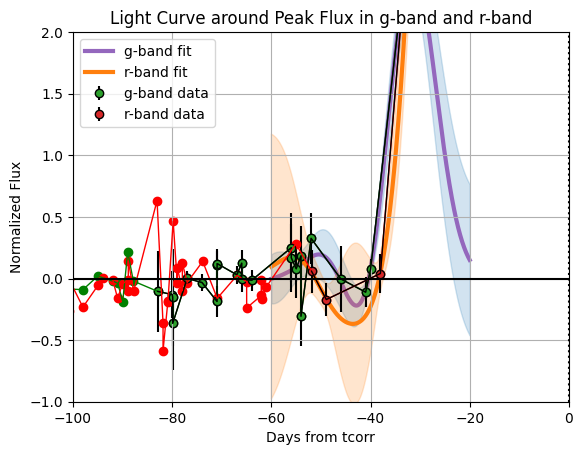

In [82]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF19acxgxcu'

sn_lc = os.path.join(directory, f'{supernova_id}_LC_cleaned.csv')

sn_lc_c = pd.read_csv(sn_lc, comment = '#')

peak_mjd_ztfg = sn_lc_c.loc[sn_lc_c['flux_ztfg'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfg, peak_mjd_ztfr)

print('Time correction applied:', tcorr)

fcorr = 1e4 #correct for flux
tdfg = 55
tdfr = 55

#Green
sn_lc_gc =sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_mjd_gc = sn_lc_gc['mjd'].values - tcorr
sn_flux_gc =sn_lc_gc['flux_ztfg'].values/fcorr

sn_lc_gc = sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_lc_gc['mjd_corrected'] = sn_lc_gc['mjd'] - tcorr
sn_lc_gc['flux_normalized'] = sn_lc_gc['flux_ztfg'] / fcorr
sn_lc_gc['flux_err_normalized'] = sn_lc_gc['flux_err'] / fcorr
sn_lc_gc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexg = sn_lc_gc['flux_ztfg'].idxmax()
peak_flux_mjdg = sn_lc_gc.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg
filtered_datag = sn_lc_gc[(sn_lc_gc['mjd_corrected'] >= start_timeg) & (sn_lc_gc['mjd_corrected'] <= peak_flux_mjdg)]

#Red
sn_lc_rc =sn_lc_c.loc[sn_lc_c['filter']=='ztfr']
sn_mjd_rc = sn_lc_rc['mjd'].values - tcorr
sn_flux_rc = sn_lc_rc['flux_ztfr'].values/fcorr

sn_lc_rc = sn_lc_c.loc[sn_lc_c['filter'] == 'ztfr']
sn_lc_rc['mjd_corrected'] = sn_lc_rc['mjd'] - tcorr
sn_lc_rc['flux_normalized'] = sn_lc_rc['flux_ztfr'] / fcorr
sn_lc_rc['flux_err_normalized'] = sn_lc_rc['flux_err'] / fcorr
sn_lc_rc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexr = sn_lc_rc['flux_ztfr'].idxmax()
peak_flux_mjdr = sn_lc_rc.loc[peak_flux_indexr, 'mjd_corrected']
start_timer = peak_flux_mjdr - tdfr
filtered_datar = sn_lc_rc[(sn_lc_rc['mjd_corrected'] >= start_timer) & (sn_lc_rc['mjd_corrected'] <= peak_flux_mjdr)]

lengthscale = 5

# Green band GP
kernelg = np.var(filtered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorg = george.GP(kernelg)
gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['flux_err_normalized'].values)
sn_mjd_predg = np.linspace(-60,-20, 500)
sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)

# Red band GP
kernelr = np.var(sn_lc_rc['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorr = george.GP(kernelr)
gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['flux_err_normalized'].values)
sn_mjd_predr = np.linspace(-60,-20, 500)
sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)

# Plotting
#plt.xlim(min(filtered_datag['mjd_corrected']) - 20 , max(filtered_datag['mjd_corrected'])+15)
plt.ylim(-1,2)
plt.xlim(-100, 0)
plt.plot(sn_mjd_gc,sn_flux_gc, color='green', lw = 1)
plt.scatter(sn_mjd_gc,sn_flux_gc, color='green')
plt.plot(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color="tab:blue", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predg, sn_flux_g_pred, "tab:purple", lw=3, zorder=0,label='g-band fit')

plt.plot(sn_mjd_rc,sn_flux_rc, color='red', lw = 1)
plt.scatter(sn_mjd_rc,sn_flux_rc, color='red')

plt.plot(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], yerr=filtered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color="tab:orange", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predr, sn_flux_r_pred, "tab:orange", lw=3, zorder=0,label='r-band fit')

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title('Light Curve around Peak Flux in g-band and r-band')
plt.legend()
plt.show()

Adding optimisation of lengthscale as test

In [83]:
directory_path = 'dr2/lightcurves'
pattern = '*_LC_cleaned.csv'
full_pattern = f"{directory_path}/{pattern}"
files = glob.glob(full_pattern)
step = 0
for file in files:
  step += 1
  filename = file.split('\\')[-1]
  sne_name = filename.replace('_LC_cleaned.csv', '')
  #print('SNe Title no:',step,'Sne Name:', sne_name)


Time correction applied: 59077.26025


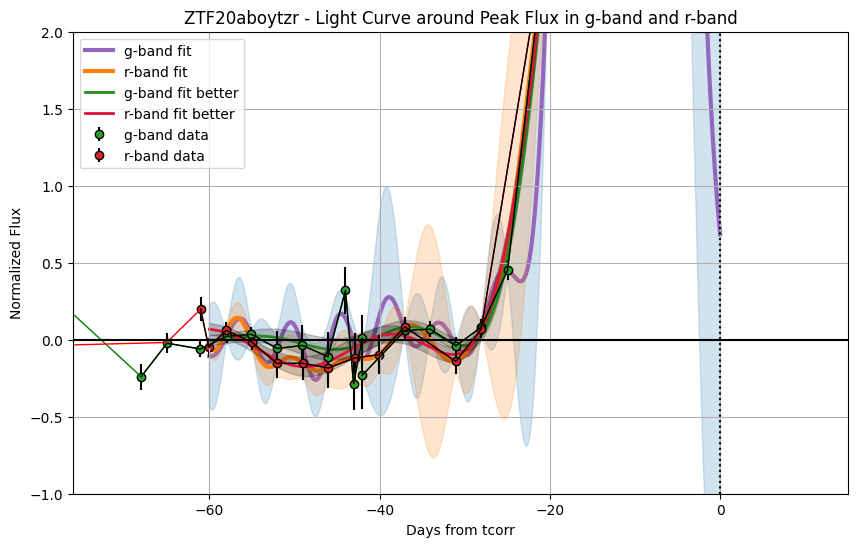

In [84]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF20aboytzr'

plt.figure(figsize=(10,6))

sn_lc = os.path.join(directory, f'{supernova_id}_LC_cleaned.csv')

sn_lc_c = pd.read_csv(sn_lc, comment = '#')

peak_mjd_ztfg = sn_lc_c.loc[sn_lc_c['flux_ztfg'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfg, peak_mjd_ztfr)

print('Time correction applied:', tcorr)

fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

p0 = gp_regressor.get_parameter_vector()

#Green
sn_lc_gc =sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_mjd_gc = sn_lc_gc['mjd'].values - tcorr
sn_flux_gc =sn_lc_gc['flux_ztfg'].values/fcorr

sn_lc_gc = sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_lc_gc['mjd_corrected'] = sn_lc_gc['mjd'] - tcorr
sn_lc_gc['flux_normalized'] = sn_lc_gc['flux_ztfg'] / fcorr
sn_lc_gc['flux_err_normalized'] = sn_lc_gc['flux_err'] / fcorr
sn_lc_gc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexg = sn_lc_gc['flux_ztfg'].idxmax()
peak_flux_mjdg = sn_lc_gc.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg
filtered_datag = sn_lc_gc[(sn_lc_gc['mjd_corrected'] >= start_timeg) & (sn_lc_gc['mjd_corrected'] <= peak_flux_mjdg)]

#Red
sn_lc_rc =sn_lc_c.loc[sn_lc_c['filter']=='ztfr']
sn_mjd_rc = sn_lc_rc['mjd'].values - tcorr
sn_flux_rc = sn_lc_rc['flux_ztfr'].values/fcorr

sn_lc_rc = sn_lc_c.loc[sn_lc_c['filter'] == 'ztfr']
sn_lc_rc['mjd_corrected'] = sn_lc_rc['mjd'] - tcorr
sn_lc_rc['flux_normalized'] = sn_lc_rc['flux_ztfr'] / fcorr
sn_lc_rc['flux_err_normalized'] = sn_lc_rc['flux_err'] / fcorr
sn_lc_rc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexr = sn_lc_rc['flux_ztfr'].idxmax()
peak_flux_mjdr = sn_lc_rc.loc[peak_flux_indexr, 'mjd_corrected']
start_timer = peak_flux_mjdr - tdfr
filtered_datar = sn_lc_rc[(sn_lc_rc['mjd_corrected'] >= start_timer) & (sn_lc_rc['mjd_corrected'] <= peak_flux_mjdr)]

lengthscale = 3

# Green band GP
kernelg = np.var(filtered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorg = george.GP(kernelg)
gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['flux_err_normalized'].values)
sn_mjd_predg = np.linspace(-60,-0, 500)
sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)

# Red band GP
kernelr = np.var(sn_lc_rc['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
gp_regressorr = george.GP(kernelr)
gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['flux_err_normalized'].values)
sn_mjd_predr = np.linspace(-60,-0, 500)
sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)

# Optimise lengthscale of green
def neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

def grad_neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.grad_log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

fit_resultsg = op.minimize(neg_ln_likeg, p0, jac=grad_neg_ln_likeg)
gp_regressorg.set_parameter_vector(fit_resultsg.x)
sn_flux_g_pred_better, sn_fluxerr_g_var_better = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)

# Optimise lengthscale of red
def neg_ln_liker(p):
    gp_regressorr.set_parameter_vector(p)
    return -gp_regressorr.log_likelihood(filtered_datar['flux_normalized'].values, quiet=True)

def grad_neg_ln_liker(p):
    gp_regressorr.set_parameter_vector(p)
    return -gp_regressorr.grad_log_likelihood(filtered_datar['flux_normalized'].values, quiet=True)

fit_resultsr = op.minimize(neg_ln_liker, p0, jac=grad_neg_ln_liker)
gp_regressorr.set_parameter_vector(fit_resultsr.x)
sn_flux_r_pred_better, sn_fluxerr_r_var_better = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)


# Plotting
plt.xlim(min(filtered_datar['mjd_corrected'])-15 , max(filtered_datar['mjd_corrected'])+15)
plt.ylim(-1,2)

plt.plot(sn_mjd_gc,sn_flux_gc, color='green', lw = 1)
plt.plot(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color="tab:blue", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predg, sn_flux_g_pred, "tab:purple", lw=3, zorder=0,label='g-band fit')

plt.plot(sn_mjd_rc,sn_flux_rc, color='red', lw = 1)
plt.plot(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], yerr=filtered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color="tab:orange", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predr, sn_flux_r_pred, "tab:orange", lw=3, zorder=0,label='r-band fit')

plt.fill_between(sn_mjd_predg, sn_flux_g_pred_better - np.sqrt(sn_fluxerr_g_var_better), sn_flux_g_pred_better + np.sqrt(sn_fluxerr_g_var_better), color="k", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predg, sn_flux_g_pred_better, lw=2, zorder=0,label='g-band fit better', color = '#228B22')

plt.fill_between(sn_mjd_predr, sn_flux_r_pred_better - np.sqrt(sn_fluxerr_r_var_better), sn_flux_r_pred_better + np.sqrt(sn_fluxerr_r_var_better), color="k", alpha=0.2,zorder=0)
plt.plot(sn_mjd_predr, sn_flux_r_pred_better, lw=2, zorder=0,label='r-band fit better', color = '#DC143C')

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in g-band and r-band')
plt.legend()
plt.show()

In [85]:
Ng = len(filtered_datag['flux_normalized'].values)
mug = np.mean((filtered_datag['flux_normalized'].values))

smg = np.sum((filtered_datag['flux_normalized'].values - mug)**2)

stdg = np.sqrt((smg) / Ng)

Nr = len(filtered_datar['flux_normalized'].values)
mur = np.mean((filtered_datar['flux_normalized'].values))

smr = np.sum((filtered_datar['flux_normalized'].values - mur)**2)

stdr = np.sqrt(smr / Nr)

print('Standard deviation for green:',stdg)
print('Standard deviation for red:', stdr)

Standard deviation for green: 3.602815303188242
Standard deviation for red: 4.238121240126808


Adding variance in lengthscale

Green

Time correction applied: 59224.21112


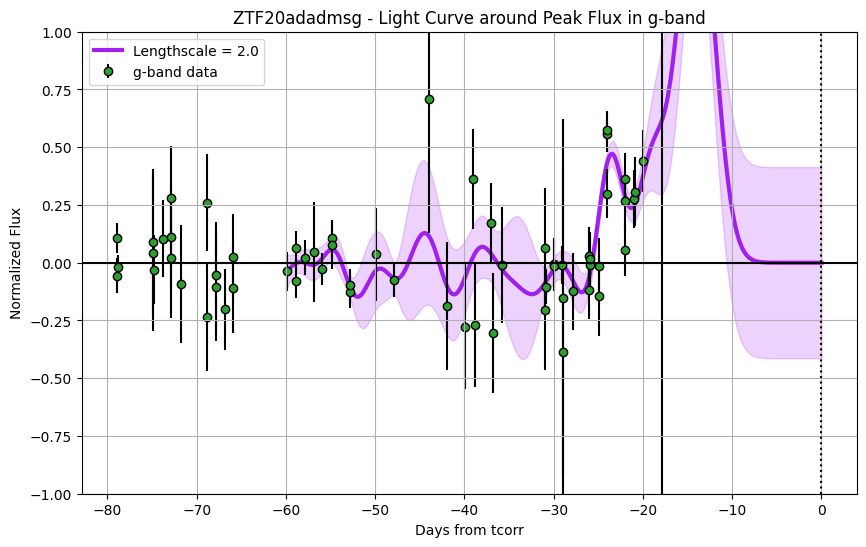

Lengthscales used: [2.]


In [87]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF20adadmsg'

plt.figure(figsize=(10,6))

sn_lc = os.path.join(directory, f'{supernova_id}_LC_cleaned.csv')

sn_lc_c = pd.read_csv(sn_lc, comment = '#')

peak_mjd_ztfg = sn_lc_c.loc[sn_lc_c['flux_ztfg'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfr,peak_mjd_ztfg)

print('Time correction applied:', tcorr)

fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

lengthscales = np.linspace(2,2,1)
colours0 = ['#A020F0','#008000',  '#0000FF', '#008080']

gp_regressorr = george.GP(kernelr)
gp_regressorg = george.GP(kernelg)

p0r = gp_regressorr.get_parameter_vector()
p0g = gp_regressorg.get_parameter_vector()

#Green
sn_lc_gc =sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_mjd_gc = sn_lc_gc['mjd'].values - tcorr
sn_flux_gc =sn_lc_gc['flux_ztfg'].values/fcorr

sn_lc_gc = sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_lc_gc['mjd_corrected'] = sn_lc_gc['mjd'] - tcorr
sn_lc_gc['flux_normalized'] = sn_lc_gc['flux_ztfg'] / fcorr
sn_lc_gc['flux_err_normalized'] = sn_lc_gc['flux_err'] / fcorr
sn_lc_gc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexg = sn_lc_gc['flux_ztfg'].idxmax()
peak_flux_mjdg = sn_lc_gc.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg
filtered_datag = sn_lc_gc[(sn_lc_gc['mjd_corrected'] >= start_timeg) & (sn_lc_gc['mjd_corrected'] <= peak_flux_mjdg)]

# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['flux_err_normalized'].values)
  sn_mjd_predg = np.linspace(-60,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= current_colour, alpha=0.2,zorder=0)


# Optimise lengthscale of green
def neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

def grad_neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.grad_log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

fit_resultsg = op.minimize(neg_ln_likeg, p0g, jac=grad_neg_ln_likeg)
gp_regressorg.set_parameter_vector(fit_resultsg.x)
sn_flux_g_pred_better, sn_fluxerr_g_var_better = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)

# Plotting
#plt.xlim(min(filtered_datag['mjd_corrected'])-15 , max(filtered_datag['mjd_corrected'])+15)
plt.ylim(-1,1)

#plt.plot(sn_mjd_gc,sn_flux_gc, color='green', lw = 1)
#plt.plot(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

#plt.fill_between(sn_mjd_predg, sn_flux_g_pred_better - np.sqrt(sn_fluxerr_g_var_better), sn_flux_g_pred_better + np.sqrt(sn_fluxerr_g_var_better), color="k", alpha=0.2,zorder=0)
#plt.plot(sn_mjd_predg, sn_flux_g_pred_better, lw=2, zorder=0,label='g-band fit better', color = '#228B22')

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in g-band')
plt.legend()
plt.show()

print('Lengthscales used:', lengthscales)

Red

Time correction applied: 59224.21112


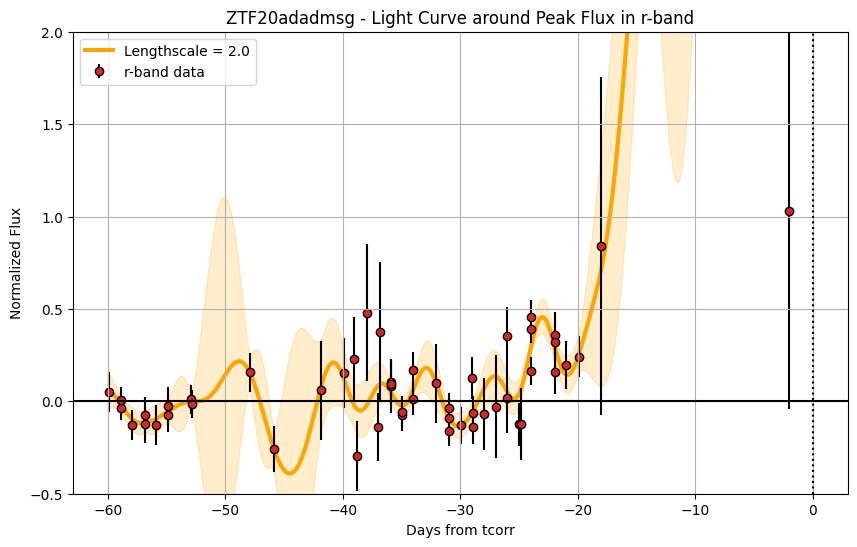

Lengthscales used: [2.]


In [88]:
plt.figure(figsize=(10,6))

peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfr, peak_mjd_ztfg)

print('Time correction applied:', tcorr)

fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

p0 = gp_regressor.get_parameter_vector()

#Green
sn_lc_rc =sn_lc_c.loc[sn_lc_c['filter']=='ztfr']
sn_mjd_rc = sn_lc_rc['mjd'].values - tcorr
sn_flux_rc =sn_lc_rc['flux_ztfr'].values/fcorr

sn_lc_rc = sn_lc_c.loc[sn_lc_c['filter']=='ztfr']
sn_lc_rc['mjd_corrected'] = sn_lc_rc['mjd'] - tcorr
sn_lc_rc['flux_normalized'] = sn_lc_rc['flux_ztfr'] / fcorr
sn_lc_rc['flux_err_normalized'] = sn_lc_rc['flux_err'] / fcorr
sn_lc_rc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexr = sn_lc_rc['flux_ztfr'].idxmax()
peak_flux_mjdr = sn_lc_rc.loc[peak_flux_indexr, 'mjd_corrected']
start_timer = peak_flux_mjdr - tdfr
filtered_datar = sn_lc_rc[(sn_lc_rc['mjd_corrected'] >= start_timer) & (sn_lc_rc['mjd_corrected'] <= peak_flux_mjdr)]

colours1 = ['#FFA500','#800000', '#FFC0CB', 'yellow']

# red band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(filtered_datar['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['flux_err_normalized'].values)
  sn_mjd_predr = np.linspace(-60,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color=current_colour, alpha=0.2,zorder=0)

#Optimise lengthscale of red
def neg_ln_liker(p):
    gp_regressorr.set_parameter_vector(p)
    return -gp_regressorr.log_likelihood(filtered_datar['flux_normalized'].values, quiet=True)

def grad_neg_ln_liker(p):
    gp_regressorr.set_parameter_vector(p)
    return -gp_regressorr.grad_log_likelihood(filtered_datar['flux_normalized'].values, quiet=True)

fit_resultsr = op.minimize(neg_ln_liker, p0r, jac=grad_neg_ln_liker)
gp_regressorr.set_parameter_vector(fit_resultsr.x)
sn_flux_r_pred_better, sn_fluxerr_r_var_better = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)

# Plotting
#plt.xlim(min(filtered_datar['mjd_corrected'])-15 , max(filtered_datar['mjd_corrected'])+15)
plt.ylim(-.5,2)

#plt.plot(sn_mjd_rc,sn_flux_rc, color='green', lw = 1)
#plt.plot(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], yerr=filtered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

#plt.fill_between(sn_mjd_predr, sn_flux_r_pred_better - np.sqrt(sn_fluxerr_r_var_better), sn_flux_r_pred_better + np.sqrt(sn_fluxerr_r_var_better), color="k", alpha=0.2,zorder=0)
#plt.plot(sn_mjd_predr, sn_flux_r_pred_better, lw=2, zorder=0,label='r-band fit better', color = '#DC143C')

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in r-band')
plt.legend()
plt.show()

print('Lengthscales used:', lengthscales)

Both plotted together

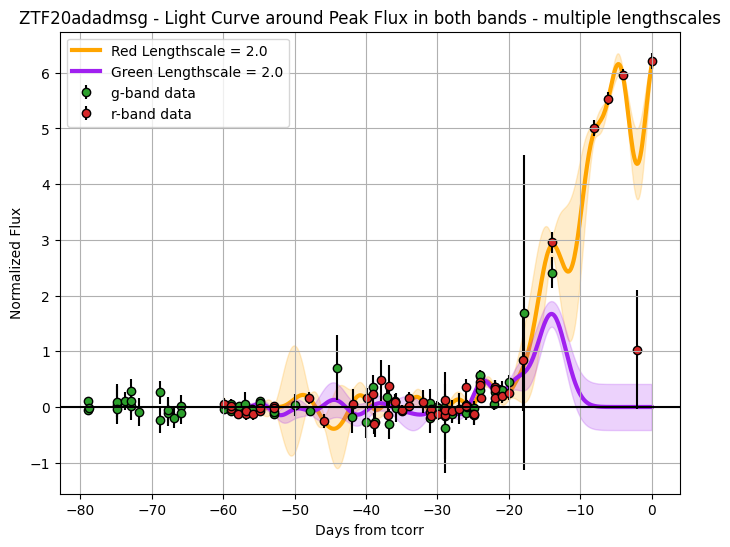

In [89]:
plt.figure(figsize=(8,6))

#plt.xlim(min(filtered_datar['mjd_corrected']) , max(filtered_datar['mjd_corrected'])+15)
#plt.ylim(-0.5, 1)

#plt.ylim(-.1,0.7)
#plt.xlim(-40,-20)

plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

#plt.fill_between(sn_mjd_predg, sn_flux_g_pred_better - np.sqrt(sn_fluxerr_g_var_better), sn_flux_g_pred_better + np.sqrt(sn_fluxerr_g_var_better), color="k", alpha=0.2,zorder=0)
#plt.plot(sn_mjd_predg, sn_flux_g_pred_better, lw=2, zorder=0,label='g-band fit better', color = '#228B22')

plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['flux_normalized'], yerr=filtered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

#plt.fill_between(sn_mjd_predr, sn_flux_r_pred_better - np.sqrt(sn_fluxerr_r_var_better), sn_flux_r_pred_better + np.sqrt(sn_fluxerr_r_var_better), color="k", alpha=0.2,zorder=0)
#plt.plot(sn_mjd_predr, sn_flux_r_pred_better, lw=2, zorder=0,label='r-band fit better', color = '#DC143C')

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(filtered_datar['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['flux_err_normalized'].values)
  sn_mjd_predr = np.linspace(-60,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Red Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color=current_colour, alpha=0.2,zorder=0)

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['flux_err_normalized'].values)
  sn_mjd_predg = np.linspace(-60,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Green Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color=current_colour, alpha=0.2,zorder=0)

plt.axhline(y=0, color = 'black', linestyle = '-')
#plt.axvline(x=0, color = 'black', linestyle = '-')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in both bands - multiple lengthscales')
plt.legend()
plt.show()

Segmenting data


Time correction applied: 59210.22817


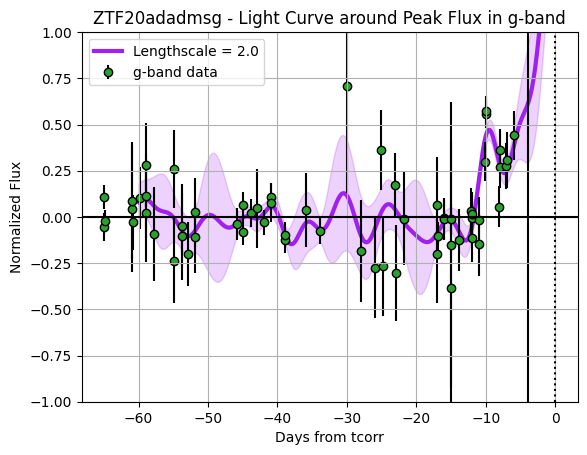

Lengthscales used: [2.]


In [91]:
directory = 'dr2/lightcurves'
supernova_id = 'ZTF20adadmsg'

sn_lc = os.path.join(directory, f'{supernova_id}_LC_cleaned.csv')

sn_lc_c = pd.read_csv(sn_lc, comment = '#')

peak_mjd_ztfg = sn_lc_c.loc[sn_lc_c['flux_ztfg'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_c.loc[sn_lc_c['flux_ztfr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfg,peak_mjd_ztfg)

print('Time correction applied:', tcorr)

fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

lengthscales = np.linspace(2,2,1)
colours0 = ['#A020F0','#008000',  '#0000FF', '#008080']

for idx, lengthscale in enumerate(lengthscales):
    kernelg = np.var(sn_lc_gc['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)

gp_regressorg = george.GP(kernelg)

p0g = gp_regressorg.get_parameter_vector()

#Green
sn_lc_gc =sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_mjd_gc = sn_lc_gc['mjd'].values - tcorr
sn_flux_gc =sn_lc_gc['flux_ztfg'].values/fcorr

sn_lc_gc = sn_lc_c.loc[sn_lc_c['filter']=='ztfg']
sn_lc_gc['mjd_corrected'] = sn_lc_gc['mjd'] - tcorr
sn_lc_gc['flux_normalized'] = sn_lc_gc['flux_ztfg'] / fcorr
sn_lc_gc['flux_err_normalized'] = sn_lc_gc['flux_err'] / fcorr
sn_lc_gc.dropna(subset=['flux_normalized', 'mjd_corrected', 'flux_err_normalized'], inplace=True)

peak_flux_indexg = sn_lc_gc['flux_ztfg'].idxmax()
peak_flux_mjdg = sn_lc_gc.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg
filtered_datag = sn_lc_gc[(sn_lc_gc['mjd_corrected'] >= start_timeg) & (sn_lc_gc['mjd_corrected'] <= peak_flux_mjdg)]

# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['flux_err_normalized'].values)
  sn_mjd_predg = np.linspace(-60,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= current_colour, alpha=0.2,zorder=0)

# Optimise lengthscale of green
def neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

def grad_neg_ln_likeg(p):
    gp_regressorg.set_parameter_vector(p)
    return -gp_regressorg.grad_log_likelihood(filtered_datag['flux_normalized'].values, quiet=True)

fit_resultsg = op.minimize(neg_ln_likeg, p0g, jac=grad_neg_ln_likeg)
gp_regressorg.set_parameter_vector(fit_resultsg.x)
sn_flux_g_pred_better, sn_fluxerr_g_var_better = gp_regressorg.predict(filtered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)

# Plotting
#plt.xlim(min(filtered_datag['mjd_corrected'])-15 , max(filtered_datag['mjd_corrected'])+15)
plt.ylim(-1,1)

#plt.plot(sn_mjd_gc,sn_flux_gc, color='green', lw = 1)
#plt.plot(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], color='black', lw =1)
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['flux_normalized'], yerr=filtered_datag['flux_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

#plt.fill_between(sn_mjd_predg, sn_flux_g_pred_better - np.sqrt(sn_fluxerr_g_var_better), sn_flux_g_pred_better + np.sqrt(sn_fluxerr_g_var_better), color="k", alpha=0.2,zorder=0)
#plt.plot(sn_mjd_predg, sn_flux_g_pred_better, lw=2, zorder=0,label='g-band fit better', color = '#228B22')

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in g-band')
plt.legend()
plt.show()

print('Lengthscales used:', lengthscales)

Calculated threshold (stdg) for the point of interest: -0.21038749678199894


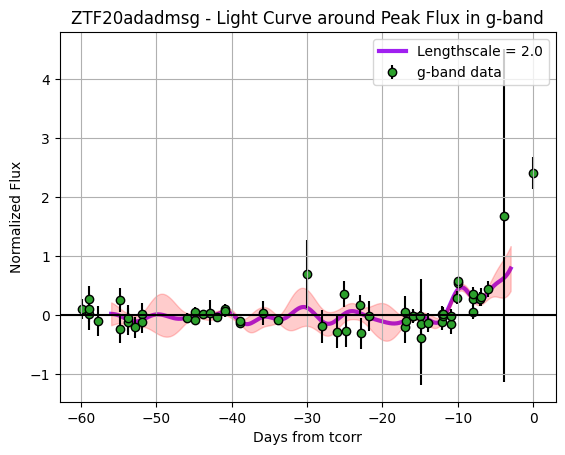

In [92]:
dfiltered_datag = sn_lc_gc[(sn_lc_gc['mjd_corrected'] <= -0) & (sn_lc_gc['mjd_corrected'] >= -60)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(dfiltered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(dfiltered_datag['mjd_corrected'].values, dfiltered_datag['flux_err_normalized'].values)
  sn_mjd_predg = np.linspace(-56,-3, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(dfiltered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= 'red', alpha=0.2,zorder=0)

tolerance = 0.1

target_mjd = -15

closest_idx = np.abs(sn_mjd_predg - target_mjd).argmin()

stdg = sn_flux_g_pred[closest_idx] - 3 * np.sqrt(sn_fluxerr_g_var[closest_idx])
print("Calculated threshold (stdg) for the point of interest:", stdg)

plt.errorbar(dfiltered_datag['mjd_corrected'], dfiltered_datag['flux_normalized'], yerr= dfiltered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-0.2, 1)
#plt.xlim(-25, -15)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in g-band')
plt.legend()
plt.show()

Calculated threshold (stdr) for the point of interest: -1.7826437078155992


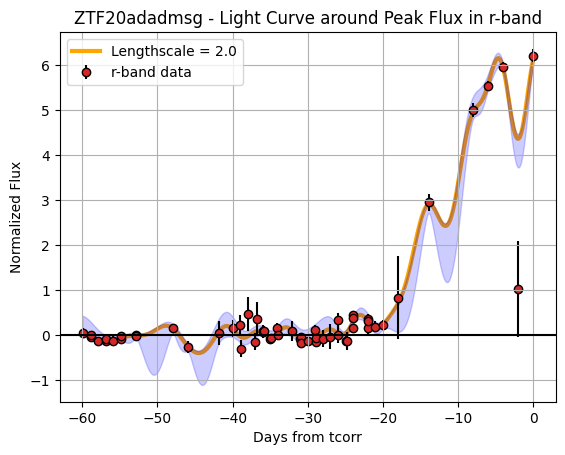

In [93]:
dfiltered_datar = sn_lc_rc[(sn_lc_rc['mjd_corrected'] <= -0) & (sn_lc_rc['mjd_corrected'] >= -60)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(dfiltered_datar['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(dfiltered_datar['mjd_corrected'].values, dfiltered_datar['flux_err_normalized'].values)
  sn_mjd_predr = np.linspace(-0, -60, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(dfiltered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_g_var), color= 'blue', alpha=0.2,zorder=0)

tolerance = 0.1

target_mjdr = -18

closest_idx = np.abs(sn_mjd_predr - target_mjdr).argmin()

stdr = sn_flux_r_pred[closest_idx] - 4 * np.sqrt(sn_fluxerr_r_var[closest_idx])
print("Calculated threshold (stdr) for the point of interest:", stdr)

plt.errorbar(dfiltered_datar['mjd_corrected'], dfiltered_datar['flux_normalized'], yerr= dfiltered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-0.2, 1)
#plt.xlim(-25, -15)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in r-band')
plt.legend()
plt.show()

Calculated threshold (stdg) for the point of interest: -0.21038749678199894
Calculated threshold (stdr) for the point of interest: -1.7826437078155992


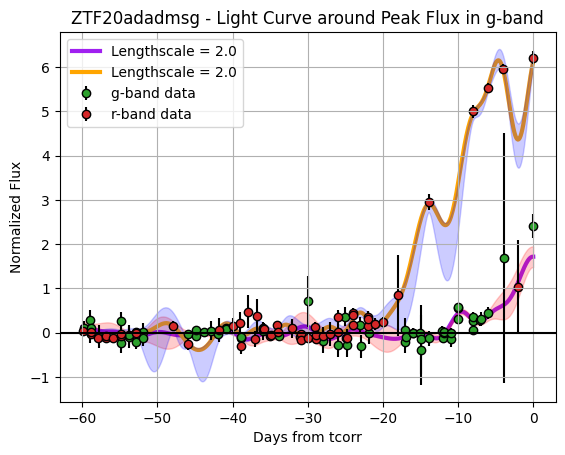

In [94]:
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(dfiltered_datag['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(dfiltered_datag['mjd_corrected'].values, dfiltered_datag['flux_err_normalized'].values)
  sn_mjd_predg = np.linspace(-0,-60, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(dfiltered_datag['flux_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= 'red', alpha=0.2,zorder=0)

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(dfiltered_datar['flux_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(dfiltered_datar['mjd_corrected'].values, dfiltered_datar['flux_err_normalized'].values)
  sn_mjd_predr = np.linspace(-0,-60, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(dfiltered_datar['flux_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_g_var), color= 'blue', alpha=0.2,zorder=0)

plt.errorbar(dfiltered_datag['mjd_corrected'], dfiltered_datag['flux_normalized'], yerr= dfiltered_datag['flux_err']/fcorr, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(dfiltered_datar['mjd_corrected'], dfiltered_datar['flux_normalized'], yerr= dfiltered_datar['flux_err']/fcorr, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-0.2, 0.8)
#plt.xlim(-35, -20)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(supernova_id)} - Light Curve around Peak Flux in g-band')
plt.legend()

print("Calculated threshold (stdg) for the point of interest:", stdg)
print("Calculated threshold (stdr) for the point of interest:", stdr)

plt.show()


Accounting for Extinction

In [95]:
specific_files = [
    'ZTF18aabxrjp_LC_cleaned.csv', 'ZTF18abspqsn_LC_cleaned.csv', 'ZTF19abnimpq_LC_cleaned.csv', 'ZTF20aaiaaoi_LC_cleaned.csv', 'ZTF20aaavvlv_LC_cleaned.csv',
    'ZTF19acxgxcu_LC_cleaned.csv', 'ZTF19abkeuto_LC_cleaned.csv', 'ZTF20aamhocj_LC_cleaned.csv', 'ZTF20aaupolv_LC_cleaned.csv', 'ZTF20abvxdio_LC_cleaned.csv',
    'ZTF20abylbuf_LC_cleaned.csv', 'ZTF20ackitai_LC_cleaned.csv', 'ZTF20acnyxln_LC_cleaned.csv', 'ZTF19acxgxcu_LC_cleaned.csv','ZTF18aaadqua_LC_cleaned.csv',
    'ZTF18abdpvnd_LC_cleaned.csv','ZTF18abhpgje_LC_cleaned.csv','ZTF18absbspk_LC_cleaned.csv','ZTF19aailltc_LC_cleaned.csv','ZTF19aanmdsr_LC_cleaned.csv',
    'ZTF19abwnpus_LC_cleaned.csv','ZTF19adajqwl_LC_cleaned.csv','ZTF20aavpnlv_LC_cleaned.csv','ZTF20abahhml_LC_cleaned.csv','ZTF20abbbumr_LC_cleaned.csv',
    'ZTF20abgfekk_LC_cleaned.csv','ZTF20aboytzr_LC_cleaned.csv','ZTF20acpilio_LC_cleaned.csv','ZTF20acyybvq_LC_cleaned.csv', 'ZTF20adadmsg_LC_cleaned.csv',
    'ZTF20aatvdwr_LC_cleaned.csv','ZTF18aayiahw_LC_cleaned.csv','ZTF18abmjyvo_LC_cleaned.csv','ZTF18actasgb_LC_cleaned.csv', 'ZTF19abpbqor_LC_cleaned.csv',
    'ZTF20abegjom_LC_cleaned.csv','ZTF20abrjmgi_LC_cleaned.csv']

ztf_ids = [filename.split('_')[0] for filename in specific_files]

file_path = 'dr2/tables/ztfdr2_coordinates.csv'
df = pd.read_csv(file_path)

filtered_df = df[df['ztfname'].isin(ztf_ids)]

filtered_df = df[df['ztfname'].isin(ztf_ids)]

coordinates = {row['ztfname']: {'RA': row['ra'], 'DEC': row['dec']} for index, row in filtered_df.iterrows()}

for ztf_id, coord in coordinates.items():
  print(f"ZTF ID: {ztf_id}, RA: {coord['RA']}, DEC: {coord['DEC']}")

ZTF ID: ZTF18aaadqua, RA: 26.798708, DEC: 18.798611
ZTF ID: ZTF18aabxrjp, RA: 185.543276, DEC: 26.994508
ZTF ID: ZTF18aayiahw, RA: 209.808366, DEC: 28.540756
ZTF ID: ZTF18abdpvnd, RA: 348.5226, DEC: 29.633388
ZTF ID: ZTF18abhpgje, RA: 277.678151, DEC: 54.634476
ZTF ID: ZTF18abmjyvo, RA: 244.934214, DEC: 50.551842
ZTF ID: ZTF18absbspk, RA: 347.598003, DEC: 27.641014
ZTF ID: ZTF18abspqsn, RA: 10.435893, DEC: 51.630975
ZTF ID: ZTF18actasgb, RA: 65.171952, DEC: -14.781265
ZTF ID: ZTF19aailltc, RA: 184.048607, DEC: 35.95478
ZTF ID: ZTF19aanmdsr, RA: 258.036851, DEC: 55.306826
ZTF ID: ZTF19abkeuto, RA: 331.595878, DEC: 0.672866
ZTF ID: ZTF19abnimpq, RA: 31.347038, DEC: 30.767102
ZTF ID: ZTF19abpbqor, RA: 264.862088, DEC: 31.243383
ZTF ID: ZTF19abwnpus, RA: 339.486775, DEC: 7.460501
ZTF ID: ZTF19acxgxcu, RA: 351.138334, DEC: 5.110933
ZTF ID: ZTF19adajqwl, RA: 221.869667, DEC: 29.536777
ZTF ID: ZTF20aaavvlv, RA: 139.623744, DEC: 28.141573
ZTF ID: ZTF20aaiaaoi, RA: 147.29288, DEC: 11.139633
ZTF

Applying

In [96]:
ztf_id_to_query = 'ZTF19abkeuto'

directory = 'dr2/lightcurves'

sn_lc_cc = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')

sn_lc_cc = pd.read_csv(sn_lc_cc, comment = '#')

print('Length of DataFrame before flag removal:', len(sn_lc_cc))

#sn_lc_cc = sn_lc_cc[(sn_lc_cc.flag&1==0) & (sn_lc_cc.flag&2==0) & (sn_lc_cc.flag&4==0) & (sn_lc_cc.flag&16==0)]
sn_lc_cc = sn_lc_cc[(sn_lc_cc.flag&1==0) & (sn_lc_cc.flag&2==0) & (sn_lc_cc.flag&4==0) & (sn_lc_cc.flag&8==0) & (sn_lc_cc.flag&16==0)]
#sn_lc_cc = sn_lc_cc[(sn_lc_cc.flag&1==0) & (sn_lc_cc.flag&2==0) & (sn_lc_cc.flag&4==0) & (sn_lc_cc.flag&8==0) & (sn_lc_cc.flag&16==0) & (sn_lc_cc.flag&32==0)]

ra = coordinates[ztf_id_to_query]['RA']
dec = coordinates[ztf_id_to_query]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
else:
    raise ValueError("E(B-V) column not found in the table.")

rv = 3.1 # This is constant for milky way

av = ebv * rv #av is just a scaling parameter

waveg = np.array([4746.48]) # g
waver = np.array([6366.38]) # r

g_v = 4746.48
r_v = 6366.38

wave_errg = np.array([g_v])
wave_errr = np.array([r_v])

extinction_valuesg = extinction.fm07(waveg, av)
extinction_valuesr = extinction.fm07(waver, av)
extinction_valueserrg = extinction.fm07(wave_errg, av)
extinction_valueserrr = extinction.fm07(wave_errr, av)

sn_lc_cc['flux_rg'] = extinction.remove(extinction_valuesg, sn_lc_cc['flux_ztfg'].values)
sn_lc_cc['flux_rr'] = extinction.remove(extinction_valuesr, sn_lc_cc['flux_ztfr'].values)
sn_lc_cc['fluxg_err_corrected'] = extinction.remove(extinction_valueserrg, sn_lc_cc['flux_err'].values)
sn_lc_cc['fluxr_err_corrected'] = extinction.remove(extinction_valueserrr, sn_lc_cc['flux_err'].values)

updated_csv_path = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')
sn_lc_cc.to_csv(updated_csv_path, index=False)

print('Right Ascension Value:', ra, 'degrees')
print('Right Declination Value:', dec,'degrees')
print('Visual Extinction Value:', av)
print("E(B-V) Value:", ebv)
print("Extinction Values for the green band:", extinction_valuesg)
print("Extinction Values for the red band:", extinction_valuesr)
print("Extinction Values for the red band error values:", extinction_valueserrr)
print("Extinction Values for the green band error values:", extinction_valueserrg)


peak_mjd_ztfg = sn_lc_cc.loc[sn_lc_cc['flux_rg'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_cc.loc[sn_lc_cc['flux_rr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfr,peak_mjd_ztfg)

print('Time correction applied:', tcorr)

sn_lc_cc['flux_rg'] = sn_lc_cc['flux_rg'].interpolate(method='linear', limit_direction='both')
sn_lc_cc['flux_rr'] = sn_lc_cc['flux_rr'].interpolate(method='linear', limit_direction='both')

print('Length of DataFrame After flag removal:', len(sn_lc_cc))

Length of DataFrame before flag removal: 809
Right Ascension Value: 331.595878 degrees
Right Declination Value: 0.672866 degrees
Visual Extinction Value: 0.18135
E(B-V) Value: 0.0585
Extinction Values for the green band: [0.21922652]
Extinction Values for the red band: [0.14689398]
Extinction Values for the red band error values: [0.14689398]
Extinction Values for the green band error values: [0.21922652]
Time correction applied: 58720.40023
Length of DataFrame After flag removal: 809


Number of data points before filtering: 809
Range of data being analyzed: -65.0 to 0.0 OR: -65.0 to -5.034950000001118
Number of green band data points after filtering: 63
Number of red band data points after filtering: 60


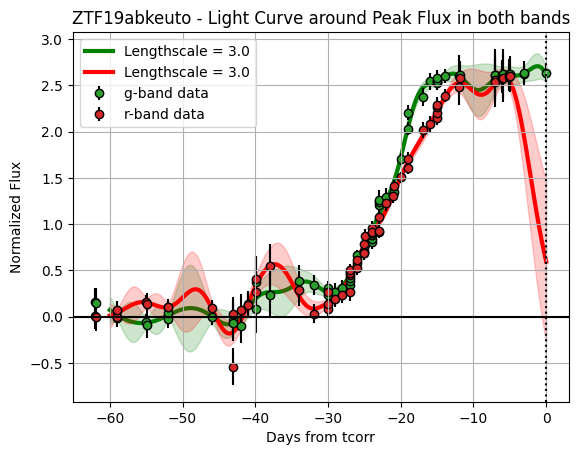

Lengthscales used: [3.]


In [97]:
fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

lengthscales = np.linspace(3,3,1)
colours0 = ['green','#008000',  '#0000FF', '#008080']
colours1 = ['red','#800000', '#FFC0CB', 'yellow']

sn_lc_cc['mjd_corrected'] = sn_lc_cc['mjd'] - tcorr
sn_lc_cc['fluxg_normalized'] = sn_lc_cc['flux_rg'] / fcorr

sn_lc_cc['fluxr_normalized'] = sn_lc_cc['flux_rr'] / fcorr

sn_lc_cc['fluxg_err_normalized'] = sn_lc_cc['fluxg_err_corrected'] / fcorr
sn_lc_cc['fluxr_err_normalized'] = sn_lc_cc['fluxr_err_corrected'] / fcorr

sn_lc_cc['fluxr_err_normalized'] = sn_lc_cc['fluxr_err_normalized'] #* 3
sn_lc_cc['fluxg_err_normalized'] = sn_lc_cc['fluxg_err_normalized'] #* 3

peak_flux_indexg = sn_lc_cc['fluxg_normalized'].idxmax()
peak_flux_mjdg = sn_lc_cc.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg

peak_flux_indexr = sn_lc_cc['fluxr_normalized'].idxmax()
peak_flux_mjdr = sn_lc_cc.loc[peak_flux_indexr, 'mjd_corrected']
start_timer = start_timeg

print("Number of data points before filtering:", len(sn_lc_cc))
print("Range of data being analyzed:", start_timeg, "to", peak_flux_mjdg, 'OR:', start_timer, "to", peak_flux_mjdr )

filtered_datag = sn_lc_cc[(sn_lc_cc['mjd_corrected'] >= start_timeg) & (sn_lc_cc['mjd_corrected'] <= peak_flux_mjdg)]
filtered_datar = sn_lc_cc[(sn_lc_cc['mjd_corrected'] >= start_timer) & (sn_lc_cc['mjd_corrected'] <= peak_flux_mjdr)]

print("Number of green band data points after filtering:", len(filtered_datag))
print("Number of red band data points after filtering:", len(filtered_datar))


# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  p0g = gp_regressorg.get_parameter_vector()
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-60,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= current_colour, alpha=0.2,zorder=0)

# Red band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(filtered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  p0r = gp_regressorr.get_parameter_vector()
  gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-60,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= current_colour, alpha=0.2,zorder=0)

#plt.ylim(-.2,2)
#plt.xlim(-50,-0)

plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['fluxg_normalized'], yerr=filtered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['fluxr_normalized'], yerr=filtered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in both bands')
plt.legend()
plt.show()

print('Lengthscales used:', lengthscales)

Slicing data of interest

Calculated stdg for the point of interest: -0.37698016656339206


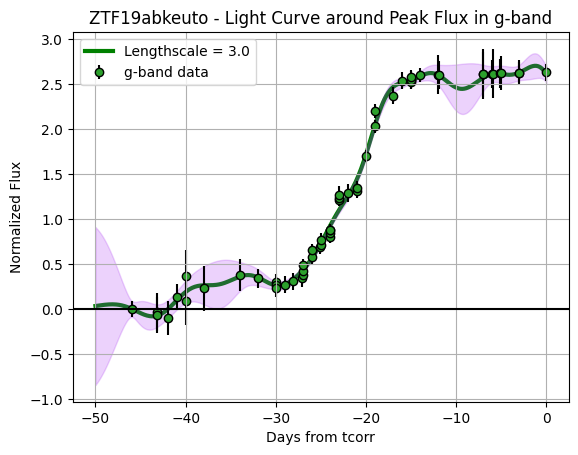

In [99]:
ddfiltered_datag = sn_lc_cc[(sn_lc_cc['mjd_corrected'] <= -0) & (sn_lc_cc['mjd_corrected'] >= -50)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(ddfiltered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(ddfiltered_datag['mjd_corrected'].values, ddfiltered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-50,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(ddfiltered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

tolerance = 1

target_mjd = -44

closest_idx = np.abs(sn_mjd_predg - target_mjd).argmin()

stdg = sn_flux_g_pred[closest_idx] - 2 * np.sqrt(sn_fluxerr_g_var[closest_idx])
print("Calculated stdg for the point of interest:", stdg)

plt.errorbar(ddfiltered_datag['mjd_corrected'], ddfiltered_datag['fluxg_normalized'], yerr= ddfiltered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-.1,.5)
#plt.xlim(-35, -10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in g-band')
plt.legend()
plt.show()

Calculated stdr for the point of interest: 1.54421076832505


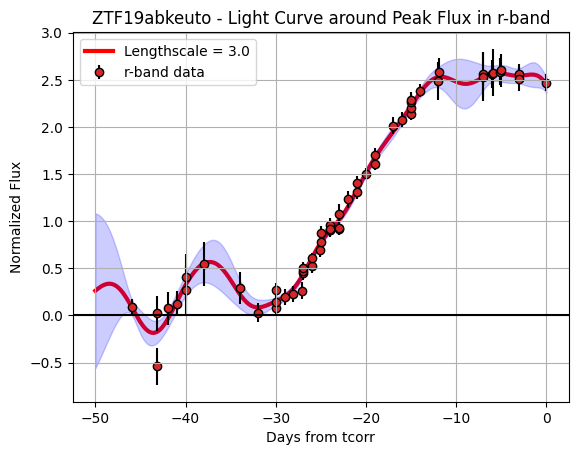

In [101]:
ddfiltered_datar = sn_lc_cc[(sn_lc_cc['mjd_corrected'] <= -0) & (sn_lc_cc['mjd_corrected'] >= -50)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(ddfiltered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(ddfiltered_datar['mjd_corrected'].values, ddfiltered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-50,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(ddfiltered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

tolerance = 1

target_mjd = -19

closest_idx = np.abs(sn_mjd_predr - target_mjd).argmin()

stdr = sn_flux_r_pred[closest_idx] - 3 * np.sqrt(sn_fluxerr_r_var[closest_idx])
print("Calculated stdr for the point of interest:", stdr)

plt.errorbar(ddfiltered_datar['mjd_corrected'], ddfiltered_datar['fluxr_normalized'], yerr= ddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-.1,.5)
#plt.xlim(-35, -10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in r-band')
plt.legend()
plt.show()

Calculated stdg for the point of interest: -0.37698016656339206
Calculated stdr for the point of interest: 1.54421076832505


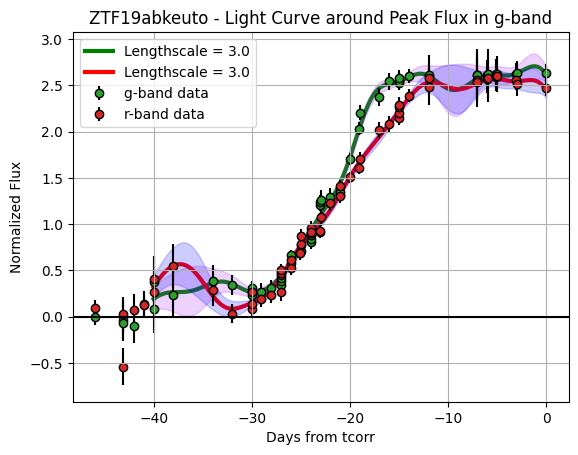

In [103]:
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(ddfiltered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(ddfiltered_datag['mjd_corrected'].values, ddfiltered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-0,-40, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(ddfiltered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(ddfiltered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(ddfiltered_datar['mjd_corrected'].values, ddfiltered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-0,-40, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(ddfiltered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

plt.errorbar(ddfiltered_datag['mjd_corrected'], ddfiltered_datag['fluxg_normalized'], yerr= ddfiltered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(ddfiltered_datar['mjd_corrected'], ddfiltered_datar['fluxr_normalized'], yerr= ddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-.1,.5)
#plt.xlim(-35, -10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in g-band')
plt.legend()

print("Calculated stdg for the point of interest:", stdg)
print("Calculated stdr for the point of interest:", stdr)

plt.show()

# A - Searching ZTF data for LC w/ bump

The actual analysis starts here

# A1 - Extinction in counts

In [133]:
ztf_id_to_query = 'ZTF19abkeuto'

directory = 'dr2/lightcurves'

file_patch = 'dr2/tables'

file_nambe = 'ztfdr2_salt2_params.csv'

fualpath = os.path.join(file_patch, file_nambe)

mi = pd.read_csv(fualpath)

pd.set_option('display.max_columns', None)

file_path = os.path.join(directory, ztf_id_to_query)

sn_lc_cce = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')
sn_lc_ccei = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')

sn_lc_cce = pd.read_csv(sn_lc_cce, comment = '#')
sn_lc_ccei = pd.read_csv(sn_lc_ccei, comment = '#')

print(len(sn_lc_cce))

sn_lc_cce = sn_lc_cce[(sn_lc_cce.flag&1==0) & (sn_lc_cce.flag&2==0) & (sn_lc_cce.flag&4==0) & (sn_lc_cce.flag&8==0) & (sn_lc_cce.flag&16==0)] # under 'recommended' slicing
sn_lc_ccei = sn_lc_ccei[(sn_lc_ccei.flag&1==0) & (sn_lc_ccei.flag&2==0) & (sn_lc_ccei.flag&4==0) & (sn_lc_ccei.flag&8==0) & (sn_lc_ccei.flag&16==0)] # under 'recommended' slicing

ra = coordinates[ztf_id_to_query]['RA']
dec = coordinates[ztf_id_to_query]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
else:
    raise ValueError("E(B-V) column not found in the table.")

rv = 3.1 # This is constant for milky way

av = ebv * rv #av is just a scaling parameter

waveg = np.array([4746.48]) # g
waver = np.array([6421.17]) # r
wavei = np.array([7955.96]) # i

g_v = 4746.48
r_v = 6421.17
i_v = 7955.96

wave_errg = np.array([g_v])
wave_errr = np.array([r_v])
wave_erri = np.array([i_v])

extinction_valuesg = extinction.fm07(waveg, av)
extinction_valuesr = extinction.fm07(waver, av)
extinction_valuesi = extinction.fm07(wavei, av)

extinction_valueserrg = extinction.fm07(wave_errg, av)
extinction_valueserrr = extinction.fm07(wave_errr, av)
extinction_valueserri = extinction.fm07(wave_erri, av)

ZP = sn_lc_cce['ZP']

row = mi.loc[mi['ztfname'] == ztf_id_to_query]
if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]
    print('Redshift value:', z, '±', err)
else:
    print(f"No redshift data found for {supernova_id}")

fluxg_ratio = 10 ** (-0.4 * extinction_valuesg)
fluxr_ratio = 10 ** (-0.4 * extinction_valuesr)
fluxi_ratio = 10 ** (-0.4 * extinction_valuesi)

fluxerrg_ratio = 10 ** (-0.4 * extinction_valueserrg)
fluxerrr_ratio = 10 ** (-0.4 * extinction_valueserrr)
fluxerri_ratio = 10 ** (-0.4 * extinction_valueserri)

fluxg_corr =  sn_lc_cce['flux_ztfg'] * fluxg_ratio
fluxr_corr =  sn_lc_cce['flux_ztfr'] * fluxr_ratio
fluxi_corr =  sn_lc_cce['flux_ztfi'] * fluxi_ratio

fluxerr_g_corr =  sn_lc_cce['flux_err'] * fluxerrg_ratio
fluxerr_r_corr =  sn_lc_cce['flux_err'] * fluxerrr_ratio
fluxerr_i_corr =  sn_lc_cce['flux_err'] * fluxerri_ratio

sn_lc_cce['fluxg_corr'] = fluxg_corr
sn_lc_cce['fluxr_corr'] = fluxr_corr
sn_lc_ccei['fluxi_corr'] = fluxi_corr

sn_lc_cce['fluxerr_g_corr'] = fluxerr_g_corr
sn_lc_cce['fluxerr_r_corr'] = fluxerr_r_corr
sn_lc_ccei['fluxerr_i_corr'] = fluxerr_i_corr

updated_csv_path = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')
sn_lc_cce.to_csv(updated_csv_path, index=False)
sn_lc_ccei.to_csv(updated_csv_path, index=False)

print('Right Ascension Value:', ra, 'degrees')

print('Right Declination Value:', dec,'degrees')
print('Visual Extinction Value:', av)
print("E(B-V) Value:", ebv)
print("Extinction Values for the green band:", extinction_valuesg)
print("Extinction Values for the red band:", extinction_valuesr)
print("Extinction Values for the near-IR band:", extinction_valuesi)

print("Extinction Values for the red band error values:", extinction_valueserrr)
print("Extinction Values for the green band error values:", extinction_valueserrg)
print("Extinction Values for the near-IR band error values:", extinction_valueserri)

sn_lc_cce['fluxg_corr'] = sn_lc_cce['fluxg_corr'].interpolate(method='linear', limit_direction='both')
sn_lc_cce['fluxr_corr'] = sn_lc_cce['fluxr_corr'].interpolate(method='linear', limit_direction='both')

print('Length of DataFrame:', len(sn_lc_cc))

sn_lc_cce['mjd'] = sn_lc_cce['mjd'] / (1 + z)

peak_mjd_ztfg = sn_lc_cce.loc[sn_lc_cce['fluxg_corr'].idxmax(), 'mjd']
peak_mjd_ztfr = sn_lc_cce.loc[sn_lc_cce['fluxr_corr'].idxmax(), 'mjd']
tcorr = max(peak_mjd_ztfg,peak_mjd_ztfg)

print('Time correction applied:', tcorr)

809
Redshift value: 0.13214608 ± 0.0
Right Ascension Value: 331.595878 degrees
Right Declination Value: 0.672866 degrees
Visual Extinction Value: 0.18135
E(B-V) Value: 0.0585
Extinction Values for the green band: [0.21922652]
Extinction Values for the red band: [0.14488742]
Extinction Values for the near-IR band: [0.10021064]
Extinction Values for the red band error values: [0.14488742]
Extinction Values for the green band error values: [0.21922652]
Extinction Values for the near-IR band error values: [0.10021064]
Length of DataFrame: 809
Time correction applied: 51866.451924649155


Number of data points before filtering: 809
Range of data being analyzed: -65.0 to 0.0 OR: -65.0 to -4.447261787987372
Number of green band data points after filtering: 67
Number of red band data points after filtering: 64


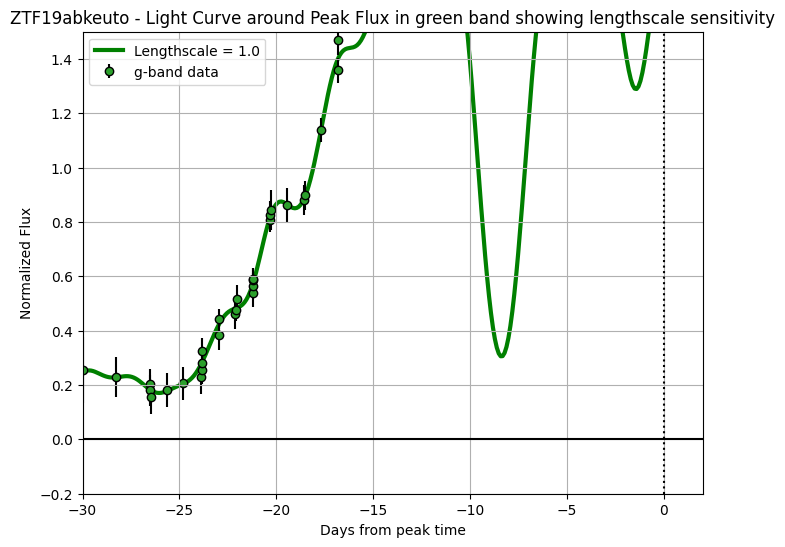

Lengthscales used: [1.]
Time correction applied: 51866.451924649155


In [134]:
fcorr = 1e4 #correct for flux
tdfg = 65
tdfr = 65

plt.figure(figsize=(8,6))

lengthscales = np.linspace(1,1,1)
colours0 = ['green','blue', 'purple']
colours1 = ['red','#800000', '#FFC0CB', 'yellow']

sn_lc_cce['mjd_corrected'] = sn_lc_cce['mjd'] - tcorr

sn_lc_cce['fluxg_normalized'] = sn_lc_cce['fluxg_corr'] / fcorr
sn_lc_cce['fluxr_normalized'] = sn_lc_cce['fluxr_corr'] / fcorr

sn_lc_cce['fluxg_err_normalized'] = sn_lc_cce['fluxerr_g_corr'] / fcorr
sn_lc_cce['fluxr_err_normalized'] = sn_lc_cce['fluxerr_r_corr'] / fcorr

sn_lc_cce['fluxr_err_normalized'] = sn_lc_cce['fluxr_err_normalized'] #* 3 --- scaling factor
sn_lc_cce['fluxg_err_normalized'] = sn_lc_cce['fluxg_err_normalized'] #* 3 --- scaling factor

peak_flux_indexg = sn_lc_cce['fluxg_normalized'].idxmax()
peak_flux_mjdg = sn_lc_cce.loc[peak_flux_indexg, 'mjd_corrected']
start_timeg = peak_flux_mjdg - tdfg

peak_flux_indexr = sn_lc_cce['fluxr_normalized'].idxmax()
peak_flux_mjdr = sn_lc_cce.loc[peak_flux_indexr, 'mjd_corrected']
start_timer = start_timeg

print("Number of data points before filtering:", len(sn_lc_cce))
print("Range of data being analyzed:", start_timeg, "to", peak_flux_mjdg, 'OR:', start_timer, "to", peak_flux_mjdr )

filtered_datag = sn_lc_cce[(sn_lc_cce['mjd_corrected'] >= start_timeg) & (sn_lc_cce['mjd_corrected'] <= peak_flux_mjdg)]
filtered_datar = sn_lc_cce[(sn_lc_cce['mjd_corrected'] >= start_timer) & (sn_lc_cce['mjd_corrected'] <= peak_flux_mjdr)]

print("Number of green band data points after filtering:", len(filtered_datag))
print("Number of red band data points after filtering:", len(filtered_datar))

# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  p0g = gp_regressorg.get_parameter_vector()
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-50,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  #plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

# Red band GP
#for idx, lengthscale in enumerate(lengthscales):
  #current_colour = colours1[idx]
  #kernelr = np.var(filtered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  #gp_regressorr = george.GP(kernelr)
  #p0r = gp_regressorr.get_parameter_vector()
  #gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['fluxr_err_normalized'].values)
  #sn_mjd_predr = np.linspace(-50,-0, 500)
  #sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  #plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  #plt.fill_between(sn_mjd_predr, (sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var)), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

plt.ylim(-.2,1.5)
plt.xlim(-30,2)

plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['fluxg_normalized'], yerr=filtered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
#plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['fluxr_normalized'], yerr=filtered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')
plt.axvline(x=0, color = 'black', linestyle = ':')

plt.grid(True)
plt.xlabel('Days from peak time')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in green band showing lengthscale sensitivity')
plt.legend()
plt.show()

print('Lengthscales used:', lengthscales)
print('Time correction applied:', tcorr)

i-band

Total data points: 92
Data points with NaN in 'fluxi_normalized': 0
Number of data points before filtering: 92
Range of data being analyzed: 5858.854275350845 to 6858.854275350845
Number of yellow band data points after filtering: 15


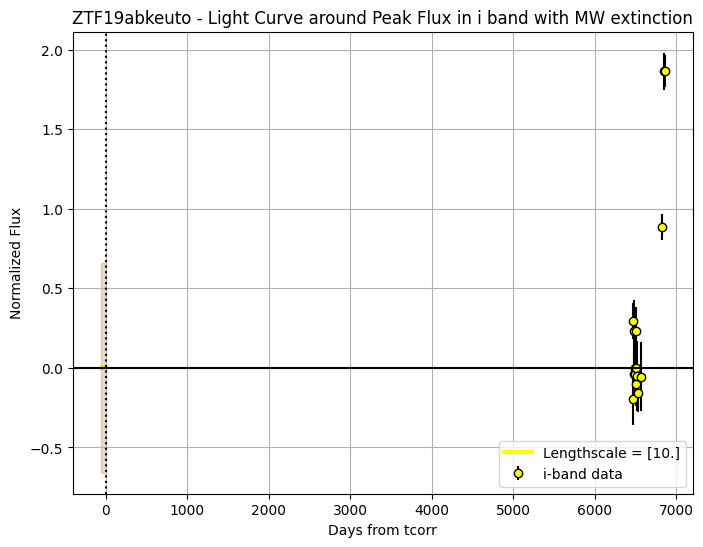

Lengthscales used: [10.]


In [135]:
try:
  peak_mjd_ztfi = sn_lc_ccei.loc[sn_lc_ccei['fluxi_corr'].idxmax(), 'mjd']
  tcorri = tcorr
  fcorr = 1e4 #correct for flux
  tdfi = 1000

  plt.figure(figsize=(8,6))

  lengthscalesi = np.linspace(10,10,1)
  colours2 = ['yellow']

  sn_lc_ccei['mjd_corrected'] = sn_lc_ccei['mjd'] - tcorri
  sn_lc_ccei['fluxi_normalized'] = sn_lc_ccei['fluxi_corr'] / fcorr

  sn_lc_ccei['fluxi_err_normalized'] = sn_lc_ccei['fluxerr_i_corr'] / fcorr

  sn_lc_ccei['fluxi_err_normalized'] = sn_lc_ccei['fluxi_err_normalized'] #* 3

  sn_lc_ccei = sn_lc_ccei.dropna(subset=['fluxi_normalized', 'fluxi_err_normalized', 'mjd_corrected'])

  print("Total data points:", len(sn_lc_ccei['flux_ztfi']))
  print("Data points with NaN in 'fluxi_normalized':", sn_lc_ccei['fluxi_normalized'].isna().sum())

  peak_flux_indexi = sn_lc_ccei['fluxi_normalized'].idxmax()
  peak_flux_mjdi = sn_lc_ccei.loc[peak_flux_indexi, 'mjd_corrected']
  start_timei = peak_flux_mjdi - tdfi

  print("Number of data points before filtering:", len(sn_lc_ccei))
  print("Range of data being analyzed:", start_timei, "to", peak_flux_mjdi)

  filtered_datai = sn_lc_ccei[(sn_lc_ccei['mjd_corrected'] >= start_timei) & (sn_lc_ccei['mjd_corrected'] <= peak_flux_mjdi)]

  print("Number of yellow band data points after filtering:", len(filtered_datai))

  # Near-IR band GP
  for idx, lengthscalei in enumerate(lengthscalesi):
    current_colour = colours2[idx]
    kerneli = np.var(filtered_datai['fluxi_normalized']) * kernels.ExpSquaredKernel(lengthscalesi ** 2)
    gp_regressori = george.GP(kerneli)
    p0i = gp_regressori.get_parameter_vector()
    gp_regressori.compute(filtered_datai['mjd_corrected'].values, filtered_datai['fluxi_err_normalized'].values)
    sn_mjd_predi = np.linspace(-60,-0, 500)
    sn_flux_i_pred, sn_fluxerr_i_var = gp_regressori.predict(filtered_datai['fluxi_normalized'].values, sn_mjd_predi, return_var=True)
    plt.plot(sn_mjd_predi, sn_flux_i_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscalesi}')
    plt.fill_between(sn_mjd_predi, sn_flux_i_pred - np.sqrt(sn_fluxerr_i_var), sn_flux_i_pred + np.sqrt(sn_fluxerr_i_var), color= '#964B00', alpha=0.2,zorder=0)


  #plt.ylim(-.2,1)
  #plt.xlim(-50,-10)

  plt.errorbar(filtered_datai['mjd_corrected'], filtered_datai['fluxi_normalized'], yerr=filtered_datai['fluxi_err_normalized'], fmt='o', color='yellow', markersize=6, markeredgecolor='k', ecolor='k', label='i-band data', zorder=1)

  plt.axhline(y=0, color = 'black', linestyle = '-')
  plt.axvline(x=0, color = 'black', linestyle = ':')

  plt.grid(True)
  plt.xlabel('Days from tcorr')
  plt.ylabel('Normalized Flux')
  plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in i band with MW extinction')
  plt.legend()
  plt.show()

  print('Lengthscales used:', lengthscalesi)

except Exception as e:
    print(f'There is an issue with the i-band data: {e}')

Calculated stdg for the point of interest: -0.16174912912884576


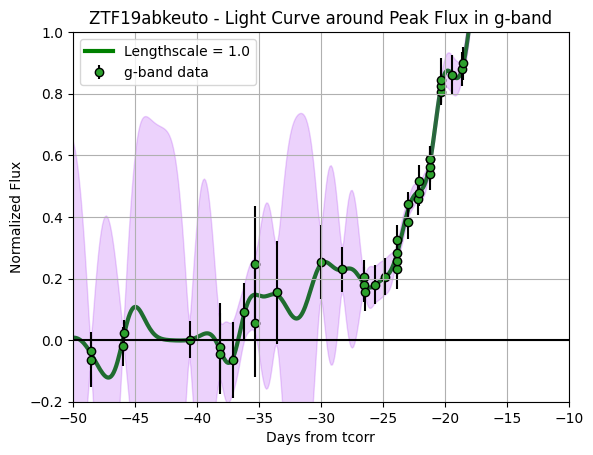

In [136]:
ddfiltered_datag = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -0) & (sn_lc_cce['mjd_corrected'] >= -50)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(ddfiltered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(ddfiltered_datag['mjd_corrected'].values, ddfiltered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-50,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(ddfiltered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

tolerance = 1

target_mjd = -28.5

closest_idx = np.abs(sn_mjd_predg - target_mjd).argmin()

stdg = sn_flux_g_pred[closest_idx] - 3 * np.sqrt(sn_fluxerr_g_var[closest_idx])
print("Calculated stdg for the point of interest:", stdg)

plt.errorbar(ddfiltered_datag['mjd_corrected'], ddfiltered_datag['fluxg_normalized'], yerr= ddfiltered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

plt.ylim(-.2,1)
plt.xlim(-50,-10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in g-band')
plt.legend()
plt.show()

ConstantKernel(log_constant=-0.6328223495754038, ndim=1, axes=array([0])) * ExpSquaredKernel(metric=Metric(1.0, ndim=1, axes=array([0]), bounds=[(None, None)]), block=None)
Calculated stdr for the point of interest: -0.2442614837930424


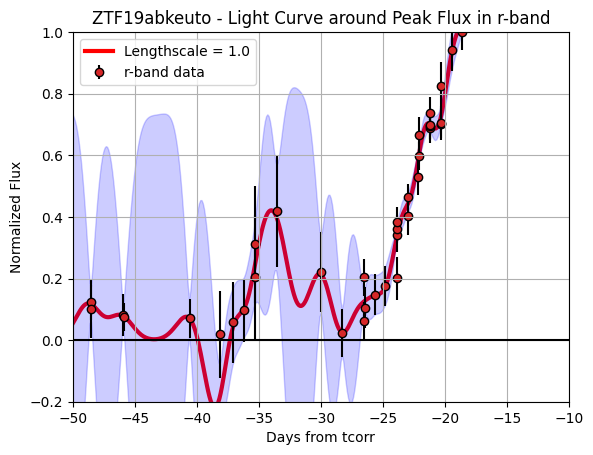

In [137]:
ddfiltered_datar = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -0) & (sn_lc_cce['mjd_corrected'] >= -50)]

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(ddfiltered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  print(kernelr)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(ddfiltered_datar['mjd_corrected'].values, ddfiltered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-50,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(ddfiltered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

tolerance = 1

target_mjd = target_mjd

closest_idx = np.abs(sn_mjd_predr - target_mjd).argmin()

stdr = sn_flux_r_pred[closest_idx] - 2 * np.sqrt(sn_fluxerr_r_var[closest_idx])
print("Calculated stdr for the point of interest:", stdr)

plt.errorbar(ddfiltered_datar['mjd_corrected'], ddfiltered_datar['fluxr_normalized'], yerr= ddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '-')

plt.ylim(-.2,1)
plt.xlim(-50,-10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in r-band')
plt.legend()
plt.show()

Calculated stdg for the point of interest: -0.16174912912884576
Calculated stdr for the point of interest: -0.2442614837930424


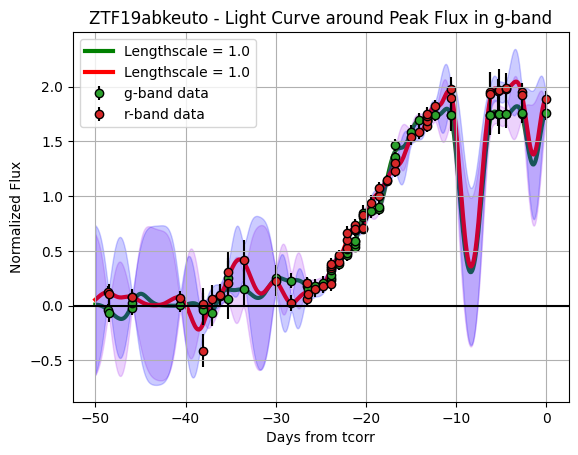

In [138]:
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(ddfiltered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  gp_regressorg.compute(ddfiltered_datag['mjd_corrected'].values, ddfiltered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-0,-50, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(ddfiltered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(ddfiltered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  gp_regressorr.compute(ddfiltered_datar['mjd_corrected'].values, ddfiltered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-0,-50, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(ddfiltered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

plt.errorbar(ddfiltered_datag['mjd_corrected'], ddfiltered_datag['fluxg_normalized'], yerr= ddfiltered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(ddfiltered_datar['mjd_corrected'], ddfiltered_datar['fluxr_normalized'], yerr= ddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.axhline(y=0, color = 'black', linestyle = '-')

#plt.ylim(-.2,1)
#plt.xlim(-50,-10)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in g-band')
plt.legend()

print("Calculated stdg for the point of interest:", stdg)
print("Calculated stdr for the point of interest:", stdr)

plt.show()

15


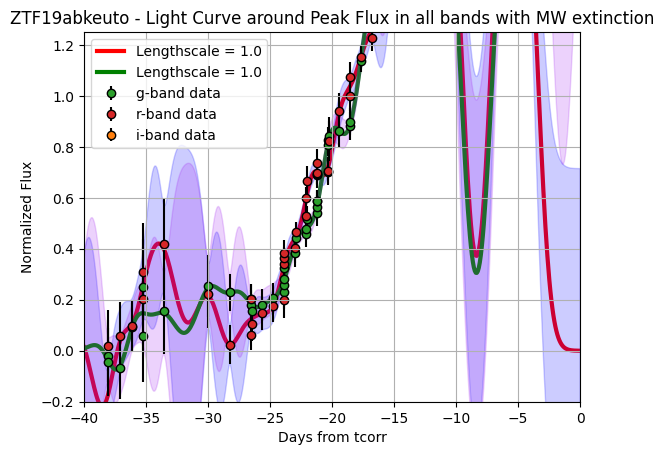

In [139]:
plt.errorbar(filtered_datag['mjd_corrected'], filtered_datag['fluxg_normalized'], yerr=filtered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(filtered_datar['mjd_corrected'], filtered_datar['fluxr_normalized'], yerr=filtered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
try:
  print(len(filtered_datai['fluxi_normalized']))
  plt.errorbar(filtered_datai['mjd_corrected'], filtered_datai['fluxi_normalized'], yerr=filtered_datai['fluxi_err_normalized'], fmt='o', color='tab:orange', markersize=6, markeredgecolor='k', ecolor='k', label='i-band data', zorder=1)
except Exception as e:
    print(f'There is an issue with the i-band data: {e}')

# Red band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours1[idx]
  kernelr = np.var(filtered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorr = george.GP(kernelr)
  p0r = gp_regressorr.get_parameter_vector()
  gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['fluxr_err_normalized'].values)
  sn_mjd_predr = np.linspace(-40,-0, 500)
  sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
  plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)

# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  p0g = gp_regressorg.get_parameter_vector()
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-40,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)

try:
  # Near-IR band GP
  if len(filtered_datai['fluxi_normalized']) > 1:
    for idx, lengthscalei in enumerate(lengthscalesi):
      current_colour = colours2[idx]
      kerneli = np.var(filtered_datai['fluxi_normalized']) * kernels.ExpSquaredKernel(lengthscalesi ** 2)
      gp_regressori = george.GP(kerneli)
      p0i = gp_regressori.get_parameter_vector()
      gp_regressori.compute(filtered_datai['mjd_corrected'].values, filtered_datai['fluxi_err_normalized'].values)
      sn_mjd_predi = np.linspace(-60,-0, 500)
      sn_flux_i_pred, sn_fluxerr_i_var = gp_regressori.predict(filtered_datai['fluxi_normalized'].values, sn_mjd_predi, return_var=True)
      #plt.plot(sn_mjd_predi, sn_flux_i_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscalesi}')
      #plt.fill_between(sn_mjd_predi, sn_flux_i_pred - np.sqrt(sn_fluxerr_i_var), sn_flux_i_pred + np.sqrt(sn_fluxerr_i_var), color= current_colour, alpha=0.2,zorder=0)
except Exception as e:
    print(f'There is an issue with the i-band data, see above')

plt.ylim(-.2,1.25)
plt.xlim(-40,-0)



plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in all bands with MW extinction')
plt.legend()
plt.show()

# A1.5 - Adding a LC without bump for contrast

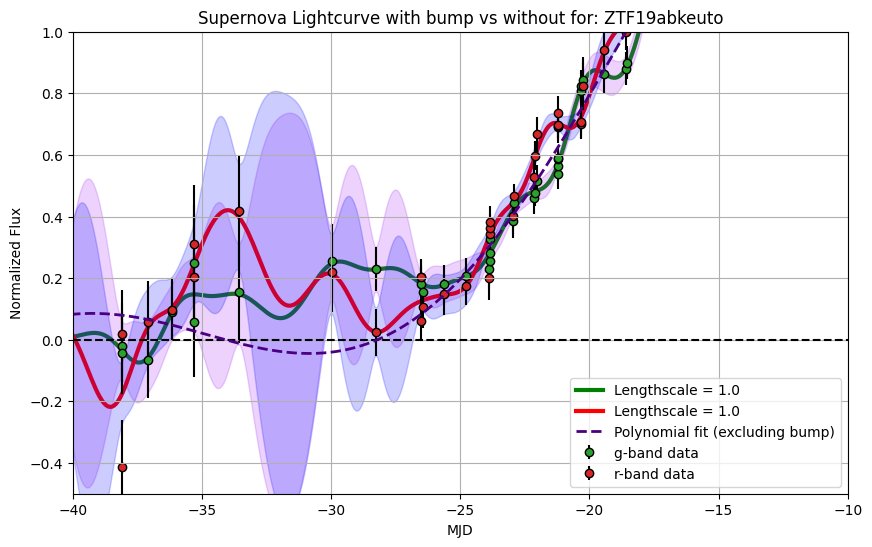

In [140]:
plt.figure(figsize=(10, 6))
# Green band GP
for idx, lengthscale in enumerate(lengthscales):
  current_colour = colours0[idx]
  kernelg = np.var(filtered_datag['fluxg_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
  gp_regressorg = george.GP(kernelg)
  p0g = gp_regressorg.get_parameter_vector()
  gp_regressorg.compute(filtered_datag['mjd_corrected'].values, filtered_datag['fluxg_err_normalized'].values)
  sn_mjd_predg = np.linspace(-40,-0, 500)
  sn_flux_g_pred, sn_fluxerr_g_var = gp_regressorg.predict(filtered_datag['fluxg_normalized'].values, sn_mjd_predg, return_var=True)
  plt.plot(sn_mjd_predg, sn_flux_g_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
  plt.fill_between(sn_mjd_predg, sn_flux_g_pred - np.sqrt(sn_fluxerr_g_var), sn_flux_g_pred + np.sqrt(sn_fluxerr_g_var), color= '#A020F0', alpha=0.2,zorder=0)
  plt.errorbar(ddfiltered_datag['mjd_corrected'], ddfiltered_datag['fluxg_normalized'], yerr= ddfiltered_datag['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
  # Red band GP
  for idx, lengthscale in enumerate(lengthscales):
    current_colour = colours1[idx]
    kernelr = np.var(filtered_datar['fluxr_normalized']) * kernels.ExpSquaredKernel(lengthscale ** 2)
    gp_regressorr = george.GP(kernelr)
    p0r = gp_regressorr.get_parameter_vector()
    gp_regressorr.compute(filtered_datar['mjd_corrected'].values, filtered_datar['fluxr_err_normalized'].values)
    sn_mjd_predr = np.linspace(-40,-0, 500)
    sn_flux_r_pred, sn_fluxerr_r_var = gp_regressorr.predict(filtered_datar['fluxr_normalized'].values, sn_mjd_predr, return_var=True)
    plt.plot(sn_mjd_predr, sn_flux_r_pred, color=current_colour, lw=3, zorder=0, label=f'Lengthscale = {lengthscale}')
    plt.fill_between(sn_mjd_predr, sn_flux_r_pred - np.sqrt(sn_fluxerr_r_var), sn_flux_r_pred + np.sqrt(sn_fluxerr_r_var), color= 'blue', alpha=0.2,zorder=0)
    plt.errorbar(ddfiltered_datar['mjd_corrected'], ddfiltered_datar['fluxr_normalized'], yerr= ddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

  plt.axhline(y=0, color = 'black', linestyle = '--')

  ###

  l = -32
  u = -25

  mask = (ddfiltered_datag['mjd_corrected'] < l) | (ddfiltered_datag['mjd_corrected'] > u)

  coeffs = np.polyfit(ddfiltered_datag['mjd_corrected'][mask], ddfiltered_datag['fluxg_normalized'][mask], deg=7)

  poly = np.poly1d(coeffs)

  fit_times = np.linspace(min(ddfiltered_datag['mjd_corrected']), max(ddfiltered_datag['mjd_corrected']), 500)

  fitted_flux = poly(fit_times)

  ###
  plt.plot(fit_times, fitted_flux, color='indigo', linestyle='--', label='Polynomial fit (excluding bump)', linewidth=2)

  #plt.vlines(x=l, ymin=-0.2, ymax=.5, colors='orange', linestyles='--', linewidth=2)
  #plt.vlines(x=u, ymin=-0.2, ymax=.5, colors='orange', linestyles='--', linewidth=2)

  plt.xlim(-40,-10)
  plt.ylim(-0.5,1)

  plt.title(f'Supernova Lightcurve with bump vs without for: {ztf_id_to_query}')
  plt.xlabel('MJD')
  plt.ylabel('Normalized Flux')
  plt.legend(loc = 'lower right')
  plt.grid(True)
  plt.show()

# A2 - Mean and standard deviation of the data before the bump

Weighted mean for r-band is: 0.006612450330562325
Weighted standard deviation for r-band is: 0.06632813204183134
---------------------------------
Weighted mean for g-band is: -0.009345284614657074
Weighted standard deviation for g-band is: 0.06596004738252813


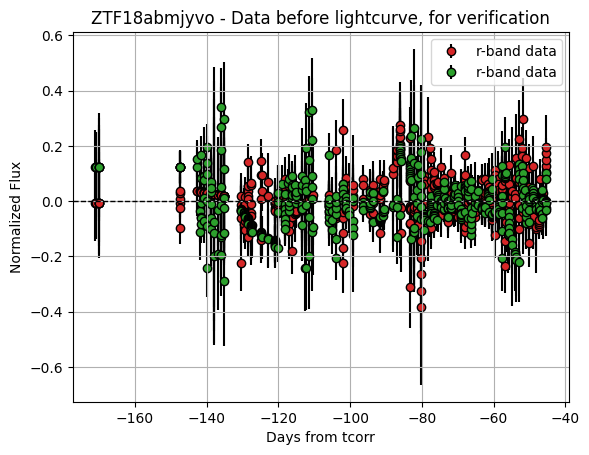

In [ ]:
dddfiltered_datar = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -45) & (sn_lc_cce['mjd_corrected'] >= -500)]
dddfiltered_datag = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -45) & (sn_lc_cce['mjd_corrected'] >= -500)]

plt.errorbar(dddfiltered_datar['mjd_corrected'], dddfiltered_datar['fluxr_normalized'], yerr= dddfiltered_datar['fluxr_err_normalized'], fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.errorbar(dddfiltered_datar['mjd_corrected'], dddfiltered_datar['fluxg_normalized'], yerr= dddfiltered_datar['fluxg_err_normalized'], fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y=0, color = 'black', linestyle = '--', lw = '1')

meanr = np.mean(dddfiltered_datar['fluxr_normalized'])
stddevr = np.std(dddfiltered_datar['fluxr_normalized'])

meang = np.mean(dddfiltered_datag['fluxg_normalized'])
stddevg = np.std(dddfiltered_datag['fluxg_normalized'])

weightsr = 1 / dddfiltered_datar['fluxr_err_normalized'] ** 2
weighted_meanr = np.average(dddfiltered_datar['fluxr_normalized'], weights=weightsr)
weighted_stdr = np.sqrt(np.average((dddfiltered_datar['fluxr_normalized'] - weighted_meanr) ** 2, weights=weightsr))

weightsg = 1 / dddfiltered_datag['fluxg_err_normalized'] ** 2
weighted_meang = np.average(dddfiltered_datag['fluxg_normalized'], weights=weightsg)
weighted_stdg = np.sqrt(np.average((dddfiltered_datag['fluxg_normalized'] - weighted_meang) ** 2, weights=weightsg))

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.title(f'{os.path.basename(ztf_id_to_query)} - Data before lightcurve, for verification')
plt.legend()

#print('The r-band mean is:', meanr)
#print('The r-band standard deviation is:', stddevr)
print('Weighted mean for r-band is:', weighted_meanr)
print('Weighted standard deviation for r-band is:', weighted_stdr)
print('---------------------------------')
#print('The g-band mean is:', meang)
#print('The g-band standard deviation is:', stddevg)
print('Weighted mean for g-band is:', weighted_meang)
print('Weighted standard deviation for g-band is:', weighted_stdg)

In [ ]:
bfiltereddatag = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -20) & (sn_lc_cce['mjd_corrected'] >= -30)]
bfiltereddatar = sn_lc_cce[(sn_lc_cce['mjd_corrected'] <= -20) & (sn_lc_cce['mjd_corrected'] >= -30)]

print("Number of entries in filtered data:", len(bfiltereddatag), 'and', len(bfiltereddatar))

def bootstrap_resample(data, n_bootstrap=1000, seed=42):
    np.random.seed(seed)
    n = len(data)
    if n == 0:
        raise ValueError("The input data is empty")
    idx_bootstrap = np.random.randint(0, n, (n_bootstrap, n))
    bootstrap_samples = [data.iloc[idx] for idx in idx_bootstrap]
    return bootstrap_samples

bootstrapsg = bootstrap_resample(bfiltereddatag, n_bootstrap=1000)
bootstrapsr = bootstrap_resample(bfiltereddatar, n_bootstrap=1000)

mean_flux_green = [sample['fluxg_normalized'].mean() for sample in bootstrapsg]
mean_flux_red = [sample['fluxr_normalized'].mean() for sample in bootstrapsr]

ci_lower_green = np.percentile(mean_flux_green, 2.5)
ci_upper_green = np.percentile(mean_flux_green, 97.5)

ci_lower_red = np.percentile(mean_flux_red, 2.5)
ci_upper_red = np.percentile(mean_flux_red, 97.5)

print("95% Confidence Interval for Mean Flux in green Band:", ci_lower_green, ci_upper_green)
print("95% Confidence Interval for Mean Flux in red Band:", ci_lower_red, ci_upper_red)

Number of entries in filtered data: 51 and 51
95% Confidence Interval for Mean Flux in green Band: 0.009847434893934016 0.07360271355269539
95% Confidence Interval for Mean Flux in red Band: -0.07210325770305351 0.01650469829679324


# A3 - Plotting lightcurves in magnitudes

799
Redshift value: 0.07100536 ± 0.0
Time correction applied: 55224.78472543371
734


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


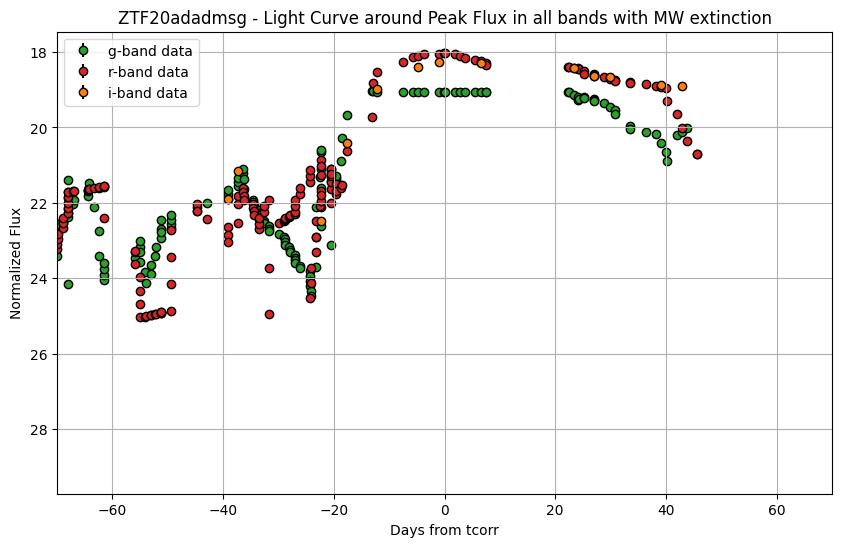

In [ ]:
import astropy.units as u

plt.figure(figsize=(10, 6))

ztf_id_to_query = 'ZTF20adadmsg'

directory = 'dr2/lightcurves'

sn_lc_ccm = os.path.join(directory, f'{ztf_id_to_query}_LC_cleaned.csv')

sn_lc_ccm = pd.read_csv(sn_lc_ccm, comment = '#')

print(len(sn_lc_ccm))

sn_lc_ccm = sn_lc_ccm[(sn_lc_ccm.flag&1==0) & (sn_lc_ccm.flag&2==0) & (sn_lc_ccm.flag&4==0) & (sn_lc_ccm.flag&8==0) & (sn_lc_ccm.flag&16==0)]

ra = coordinates[ztf_id_to_query]['RA']
dec = coordinates[ztf_id_to_query]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
else:
    raise ValueError("E(B-V) column not found in the table.")

rv = 3.1 # This is constant for milky way

av = ebv * rv #av is just a scaling parameter

file_patbh = 'dr2/tables'

file_namme = 'ztfdr2_salt2_params.csv'

fuglpath = os.path.join(file_patbh, file_namme)

jo = pd.read_csv(fuglpath)

pd.set_option('display.max_columns', None)

row = jo.loc[jo['ztfname'] == ztf_id_to_query]
if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]
    print('Redshift value:', z, '±', err)
else:
    print(f"No redshift data found for {ztf_id_to_query}")

waveg = np.array([4746.48]) # g
waver = np.array([6421.17]) # r
wavei = np.array([7955.96]) # i

g_v = 4746.48
r_v = 6421.17
i_v = 7955.96

wave_errg = np.array([g_v])
wave_errr = np.array([r_v])
wave_erri = np.array([i_v])

extinction_valuesg = extinction.fm07(waveg, av)
extinction_valuesr = extinction.fm07(waver, av)
extinction_valuesi = extinction.fm07(wavei, av)

extinction_valueserrg = extinction.fm07(wave_errg, av)
extinction_valueserrr = extinction.fm07(wave_errr, av)
extinction_valueserri = extinction.fm07(wave_erri, av)

magerr = sn_lc_ccm['flux_err']

ZP = sn_lc_ccm['ZP']

magg = -2.5 * np.log10(sn_lc_ccm['flux_ztfg']) + 30
magr = -2.5 * np.log10(sn_lc_ccm['flux_ztfr']) + 30
magi = -2.5 * np.log10(sn_lc_ccm['flux_ztfi']) + 30

magerrg = np.abs((2.5 / np.log(10)) * (magerr / sn_lc_ccm['flux_ztfg']))
magerrr = np.abs((2.5 / np.log(10)) * (magerr / sn_lc_ccm['flux_ztfr']))
magerri = np.abs((2.5 / np.log(10)) * (magerr / sn_lc_ccm['flux_ztfi']))

sn_lc_ccm['magg'] = magg
sn_lc_ccm['magr'] = magr
sn_lc_ccm['magi'] = magi

sn_lc_ccm['magg_dereddened'] = sn_lc_ccm['magg'] - extinction_valuesg[0]
sn_lc_ccm['magr_dereddened'] = sn_lc_ccm['magr'] - extinction_valuesr[0]
sn_lc_ccm['magi_dereddened'] = sn_lc_ccm['magi'] - extinction_valuesi[0]

updated_csv_path = os.path.join(directory, f'{ztf_id_to_query}_LC_magnitude.csv')
sn_lc_ccm.to_csv(updated_csv_path, index=False)

peak_mjd_ztfg = sn_lc_ccm.loc[sn_lc_ccm['magg'].idxmin(), 'mjd']
peak_mjd_ztfr = sn_lc_ccm.loc[sn_lc_ccm['magr'].idxmin(), 'mjd']

tcorr = tcorr #min(peak_mjd_ztfg,peak_mjd_ztfr)

print('Time correction applied:', tcorr)

sn_lc_ccm['magg'] = sn_lc_ccm['magg'].interpolate(method='linear', limit_direction='both')
sn_lc_ccm['magr'] = sn_lc_ccm['magr'].interpolate(method='linear', limit_direction='both')

print(len(sn_lc_ccm))

sn_lc_ccm['mjd_corrected'] = sn_lc_ccm['mjd'] / (1 + z)
sn_lc_ccm['mjd_corrected'] = sn_lc_ccm['mjd_corrected'] - 55297.772851482274


plt.errorbar(sn_lc_ccm['mjd_corrected'], (sn_lc_ccm['magg']), yerr = 0, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(sn_lc_ccm['mjd_corrected'], (sn_lc_ccm['magr']), yerr = 0, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)
plt.errorbar(sn_lc_ccm['mjd_corrected'], (sn_lc_ccm['magi']), yerr = 0, fmt='o', color='tab:orange', markersize=6, markeredgecolor='k', ecolor='k', label='i-band data', zorder=1)

plt.xlim(-70, 70)
#plt.ylim(19, 22)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.gca().invert_yaxis()
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in all bands with MW extinction')
plt.legend()
plt.show()

# B - Atlas data work

# B1 - Lightcurve rise time

818
Redshift value: 0.05666686 ± 0.0
Refined Peak MJD from filtered data: 58714.322197
55565.594436263484
253
253


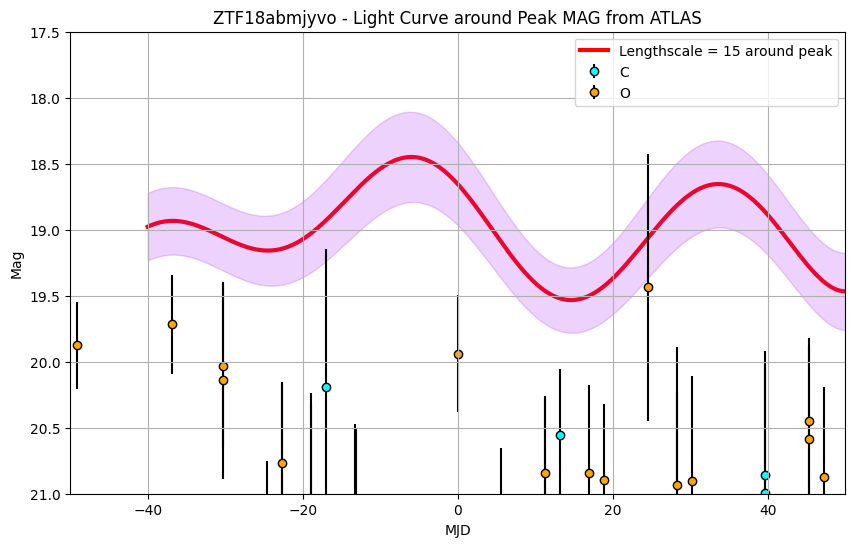

In [166]:
plt.figure(figsize = (10, 6))

ztf_id_to_query = 'ZTF18abmjyvo'

directory = '/content'

file_path = os.path.join(directory, f'{ztf_id_to_query}(UBVRI).txt')

la = pd.read_csv(file_path, sep='\s+')

la = la[la['m'] > 0]

print(len(la))

ti = pd.read_csv(file_path, sep='\s+')

ti = ti[ti['m'] < 0]

file_patch = 'dr2/tables'

file_nambe = 'ztfdr2_salt2_params.csv'

fuelpath = os.path.join(file_patch, file_nambe)

ab = pd.read_csv(fuelpath)

pd.set_option('display.max_columns', None)

row = ab.loc[ab['ztfname'] == ztf_id_to_query]
if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]
    print('Redshift value:', z, '±', err)
else:
    print(f"No redshift data found for {ztf_id_to_query}")


error_threshold = 10
la_filtered = la[(la['dm'] <= error_threshold * la['m']) & (la['m'] > 0)]

initial_guess = 58710

search_window = 20
filtered_data_within_window = la_filtered[
    (la_filtered['###MJD'] > initial_guess - search_window) &
    (la_filtered['###MJD'] < initial_guess + search_window)
]

if not filtered_data_within_window.empty:
    peak_mjd_ATLAS = filtered_data_within_window.loc[filtered_data_within_window['m'].idxmin(), '###MJD']
    print(f"Refined Peak MJD from filtered data: {peak_mjd_ATLAS}")
else:
    print("No data within the search window.")
    peak_mjd_ATLAS = None

time = la['###MJD']
time = time / (1 + z)

tover = (peak_mjd_ATLAS) / (1+z)

print(tover)

time = time - tover

mag = la['m']
mag_err = la['dm']
mask = mag_err <= mag / 18

filter_colours = {
    'c': 'cyan',
    'o': 'orange',
}

ltm = -500
utm = 500

timez = time[mask]
mag = mag[mask]
mag_err = mag_err[mask]
filtered_datam = la[mask]

time_filter = (timez >= ltm) & (timez <= utm)
timez = timez[time_filter]
mag = mag[time_filter]
mag_err = mag_err[time_filter]
filtered_datam = filtered_datam[time_filter]

for f, colour in filter_colours.items():
    maske = la['F'] == f
    plt.errorbar(timez[maske], mag[maske], yerr=mag_err[maske], fmt='o',
                 color=colour, markersize=6, markeredgecolor='k', ecolor='k',
                 label=f'{f.upper()}', zorder=1)

print(len(mag))
print(len(mag_err))

lengthscalem = 15

kernelm = np.var(mag) * kernels.ExpSquaredKernel(lengthscalem ** 2)
gp_regressorm = george.GP(kernelm)
p0m = gp_regressorm.get_parameter_vector()
gp_regressorm.compute(timez.values, mag_err.values)
sn_mjd_predm = np.linspace(-40, 50, 500)
sn_m_pred, sn_merr_var = gp_regressorm.predict(mag.values, sn_mjd_predm, return_var=True)

baselin = np.mean(mag)


plt.plot(sn_mjd_predm, sn_m_pred, color='red', lw=3, zorder=0, label=f'Lengthscale = {lengthscalem} around peak')
plt.fill_between(sn_mjd_predm, sn_m_pred - np.sqrt(sn_merr_var), sn_m_pred + np.sqrt(sn_merr_var), color= '#A020F0', alpha=0.2,zorder=0)

plt.xlim(-50, 50)
plt.ylim(17.5, 21)
plt.grid(True)
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak MAG from ATLAS')
plt.legend()
plt.show()

20.379376073275523
502    1.679577e-08
504    4.242287e-09
506    2.908037e-09
Name: m, dtype: float64
Baseline flux 7.982032390615208e-09
Baseline 20.244716285517764
B_max time: -0.6148786797891148
B_max time + 15 days: 14.385121320210885
Rise time = 66.27583356251712 +/- 1.7370511546154013


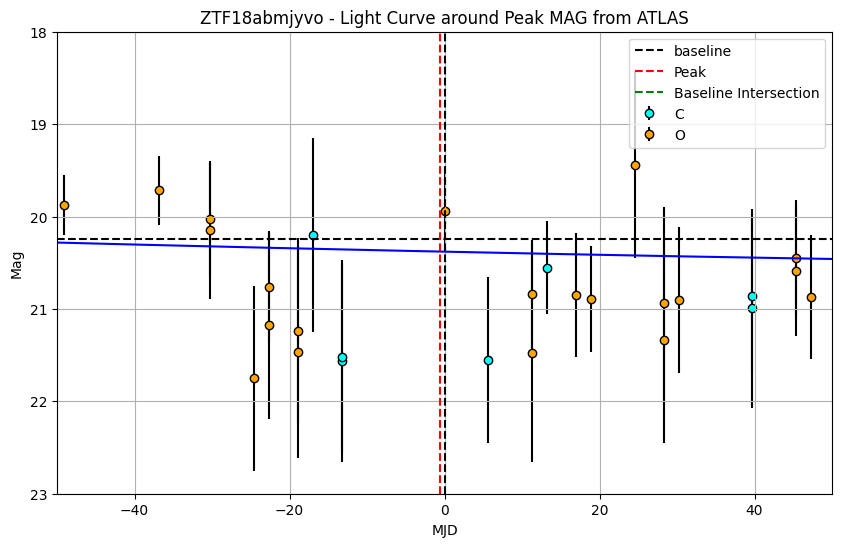

In [167]:
plt.figure(figsize=(10,6))

lm = -1000/2
um = 1000/2

filt_syst3 = (timez >= lm) & (timez <= um)

xfilrt = timez[filt_syst3]
yfilrt = mag[filt_syst3]

mag_errfilrt = mag_err[filt_syst3]

weightsrt = 1/mag_errfilrt

weightsrt = weightsrt[filt_syst3]

spline2 = UnivariateSpline(xfilrt, yfilrt, w=weightsrt, s=500)

for f, colour in filter_colours.items():
    maske = filtered_datam['F'] == f
    plt.errorbar(timez[maske], mag[maske], yerr=mag_err[maske], fmt='o',
                 color=colour, markersize=6, markeredgecolor='k', ecolor='k',
                 label=f'{f.upper()}', zorder=1)

xrt_fit = np.linspace(xfilrt.min(), xfilrt.max(), 500)
yrt_fit = spline2(xrt_fit)

b_max_index = np.argmin(np.abs(xrt_fit))
b_max_value = xrt_fit[b_max_index]
b_max_magnitude = yrt_fit[b_max_index]

print(b_max_magnitude)

xfilrt = np.array(xfilrt)
yfilrt = np.array(yfilrt)

ln = 20
un = 30 ### this might need to be changed depending on specific dataset

magfil = (timez >= ln) & (timez <= un)

filtered_flux = 10 ** (-0.4 * mag[magfil])
print(filtered_flux[:5])
baseline_flux = np.mean(filtered_flux)
print('Baseline flux', baseline_flux)

### SEM
stdfilflux = np.std(filtered_flux)
noofcounts = len(filtered_flux)
uncinbaseline = stdfilflux/np.sqrt(noofcounts)

ept = np.random.rand()
eptb = 1 + 2 * np.random.rand()

eit = np.sqrt(eptb**2 + (uncinbaseline**2))

err_in_rise_time = np.sqrt(eit**2 + ept**2)
###

magb = -2.5 * np.log10(baseline_flux)

baseline_flux = magb

baseline = (magb)
print('Baseline', baseline)

detected_times = []

plt.axvline(x = 0, color = 'black', linestyle = '--')

if not np.isnan(baseline):
    plt.ylim(17.5, baseline + 1)
else:
    plt.ylim(17.5, 22)

plt.axhline(y = baseline, color = 'black', linestyle = '--', label = 'baseline')

plt.plot(xrt_fit, yrt_fit, color = 'blue')

def baseline_intersection(x):
    return spline2(x) - magb

intersection_time = fsolve(baseline_intersection, x0=b_max_value - 10)

rise_time = b_max_value - intersection_time[0]

plt.axvline(x=b_max_value, color='red', linestyle='--', label='Peak')
plt.axvline(x=intersection_time, color='green', linestyle='--', label='Baseline Intersection')

b_max_time = b_max_value
b_max_time_15 = b_max_value + 15

if b_max_time != 0:
  print("B_max time:", b_max_time)
  print("B_max time + 15 days:", b_max_time_15)

print('Rise time =', rise_time, '+/-', err_in_rise_time)

plt.xlim(-50, 50)
plt.ylim(18, 23)

plt.grid(True)
plt.xlabel('MJD')
plt.ylabel('Mag')
plt.gca().invert_yaxis()
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak MAG from ATLAS')
plt.legend()
plt.show()

NameError: name 'sn_lc_ccm' is not defined

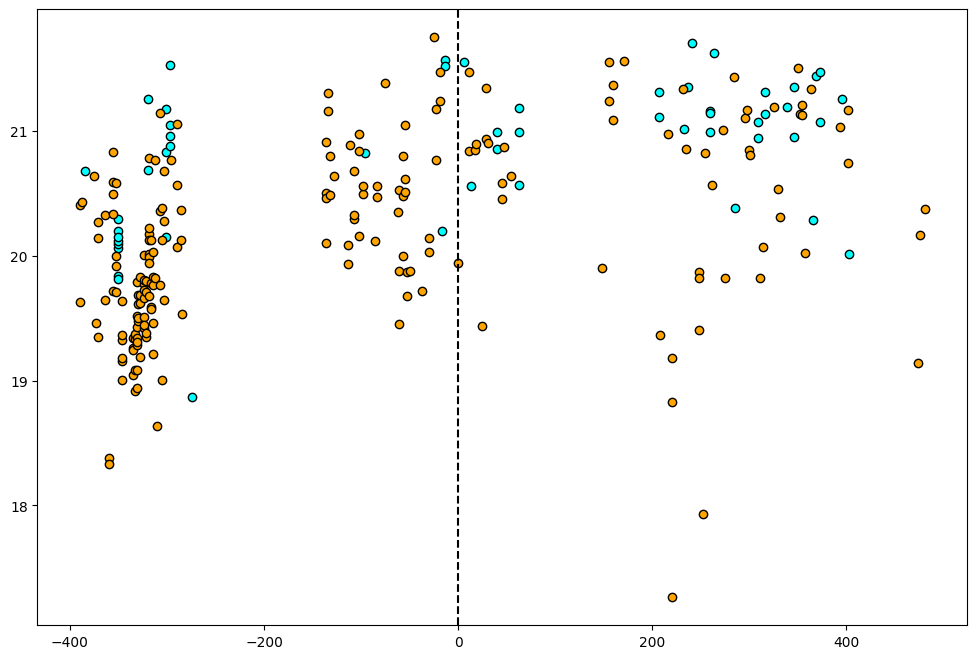

In [168]:
plt.figure(figsize=(12,8))
for f, colour in filter_colours.items():
    maske = filtered_datam['F'] == f
    plt.errorbar(timez[maske], mag[maske], yerr=0, fmt='o',
                 color=colour, markersize=6, markeredgecolor='k', ecolor='k',
                 label=f'{f.upper()}', zorder=1)

    #mag_err[maske]

plt.axvline(x = 0, color = 'black', linestyle = '--')

plt.errorbar(sn_lc_ccm['mjd_corrected'], (sn_lc_ccm['magg']), yerr = 0, fmt='o', color='tab:green', markersize=6, markeredgecolor='k', ecolor='k', label='g-band data', zorder=1)
plt.errorbar(sn_lc_ccm['mjd_corrected'], (sn_lc_ccm['magr']), yerr = 0, fmt='o', color='tab:red', markersize=6, markeredgecolor='k', ecolor='k', label='r-band data', zorder=1)

plt.axhline(y = baseline, color = 'black', linestyle = '--', label = 'baseline magnitude')

plt.xlim(-80/2, 100/2)
plt.ylim(17.5, 21)

plt.grid(True)
plt.xlabel('Days from tcorr')
plt.ylabel('Normalized Flux')
plt.gca().invert_yaxis()
plt.legend()
plt.title(f'{os.path.basename(ztf_id_to_query)} - Light Curve around Peak Flux in all bands with MW extinction')

# B2 - ATLAS data, piscola

In [ ]:
ztf_id_to_query = 'ZTF19abpbqor'

directory = '/content'

file_path = os.path.join(directory, f'{ztf_id_to_query}(AB)acc.txt')

file_patdh = 'dr2/tables'

file_namge = 'ztfdr2_salt2_params.csv'

fuwlpath = os.path.join(file_patdh, file_namge)

mo = pd.read_csv(fuwlpath)

ra = coordinates[ztf_id_to_query]['RA']
dec = coordinates[ztf_id_to_query]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
    print('E(B-V) value:', ebv)
else:
    raise ValueError("E(B-V) column not found in the table.")

metadata = []
timeseries_data = []

with open(file_path, 'r') as file:
    metadata_line = next(file).strip()
    metadata_values = next(file).strip().split()

    timeseries_header = next(file).strip().split()

    for line in file:
        if line.strip():
            timeseries_data.append(line.strip().split())

metadata_columns = ['name', 'z', 'ra', 'dec']
metadata_df = pd.DataFrame([metadata_values], columns=metadata_columns)

timeseries_df = pd.DataFrame(timeseries_data, columns=timeseries_header)

timeseries_df = timeseries_df.drop(columns=['m', 'dm','err', 'chi/N', 'RA', 'Dec', 'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs'])

timeseries_df['band'] = np.where(timeseries_df['F'] == 'o', 'ATLAS_o', 'ATLAS_c')
timeseries_df = timeseries_df.drop(columns=['F'])

timeseries_df['zp'] = '27.5'

timeseries_df['mag_sys'] = 'AB'

timeseries_df['flux'] = timeseries_df['flux'].astype(float)

rv = 3.1 # This is constant for milky way

av = ebv * rv

waveo = np.array([5182.42]) # o
wavec = np.array([6629.82]) # c

o_v = waveo
c_v = wavec

extinction_valueso = extinction.fm07(waveo, av)
extinction_valuesc = extinction.fm07(wavec, av)

print('Extinction values for orange:', extinction_valueso)
print('Extinction values for cyan:', extinction_valuesc)

fluxo_ratio = 10 ** (-0.4 * extinction_valueso[0])
fluxc_ratio = 10 ** (-0.4 * extinction_valuesc[0])

#apply ext.
timeseries_df['flux'] = np.where(
    timeseries_df['band'] == 'ATLAS_o',
    timeseries_df['flux'] * fluxo_ratio,
    timeseries_df['flux'] * fluxc_ratio
)

timeseries_df = timeseries_df.sort_values(by='time')

timeseries_df['flux'] = timeseries_df['flux'].astype(float)
timeseries_df['flux_err'] = timeseries_df['flux_err'].astype(float)

print(len(timeseries_df))
cutoff = timeseries_df['flux_err'].quantile(0.5)
print(cutoff)
timeseries_df = timeseries_df[timeseries_df['flux_err'] <= cutoff]
print(len(timeseries_df))

timeseries_df = timeseries_df[timeseries_df['flux'] > 0]

timeseries_df['zp'] = pd.to_numeric(timeseries_df['zp'], errors='coerce')

output_file_path = os.path.join(directory, f'{ztf_id_to_query}_AB(acc).txt')
os.makedirs(directory, exist_ok=True)

z = float(metadata_df['z'].iloc[0])
print('Redshift value:', z)

timeseries_df['time'] = timeseries_df['time'].astype(float) / (1 + z) # time dil.

with open(output_file_path, 'w') as file:
    file.write(' '.join(metadata_columns) + '\n')
    file.write(' '.join(map(str, metadata_df.iloc[0])) + '\n\n')
    file.write(' '.join(['time', 'flux', 'flux_err', 'band', 'zp', 'mag_sys']) + '\n')
    timeseries_df.to_csv(file, sep=' ', index=False, header=False)

    print("File contents:")
    print()
with open(output_file_path, 'r') as file:
    for _ in range(10):
        print(file.readline().strip())

In [ ]:
try:
    sn = piscola.call_sn(output_file_path)
except ValueError as e:
    print(f"Error during PISCOLA processing: {e}")

sn.fit()

In [ ]:
sn.plot_fits()

sn.lc_parameters

# B3 - ZTF data, Piscola

In [ ]:
ztf_id_to_query = 'ZTF19abpbqor'

directory = '/content'

file_path = os.path.join(directory, f'{ztf_id_to_query}ZTF.txt')

file_patdh = 'dr2/tables'

file_namge = 'ztfdr2_salt2_params.csv'

fuwlpath = os.path.join(file_patdh, file_namge)

mo = pd.read_csv(fuwlpath)

ra = coordinates[ztf_id_to_query]['RA']
dec = coordinates[ztf_id_to_query]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
    print('E(B-V) value:', ebv)
else:
    raise ValueError("E(B-V) column not found in the table.")

metadata = []
timeseries_data = []

with open(file_path, 'r') as file:
    metadata_line = next(file).strip()
    metadata_values = next(file).strip().split()

    timeseries_header = next(file).strip().split()

    for line in file:
        if line.strip():
            timeseries_data.append(line.strip().split())

metadata_columns = ['name', 'z', 'ra', 'dec']
metadata_df = pd.DataFrame([metadata_values], columns=metadata_columns)

timeseries_df = pd.DataFrame(timeseries_data, columns=timeseries_header)

timeseries_df = timeseries_df.drop(columns=['m', 'dm','err', 'chi/N', 'RA', 'Dec', 'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs'])

condis = [
    timeseries_df['F'] == 'ztf_r',
    timeseries_df['F'] == 'ztf_g',
    timeseries_df['F'] == 'ztf_i'
]

filts = [
    'ztf_r',
    'ztf_g',
    'ztf_i'
]

timeseries_df['band'] = np.select(condis, filts, default='Unknown')

timeseries_df = timeseries_df.drop(columns=['F'])

timeseries_df['zp'] = '30'

timeseries_df['mag_sys'] = 'AB'

timeseries_df['flux'] = timeseries_df['flux'].astype(float)

waveg = np.array([4746.48]) # g   # values from SVO
waver = np.array([6421.17]) # r
wavei = np.array([7955.96]) # i

rv = 3.1 # This is constant for milky way

av = ebv * rv

g_v = waveg
r_v = waver
i_v = wavei

extinction_valuesg = extinction.fm07(waveg, av)
extinction_valuesr = extinction.fm07(waver, av)
extinction_valuesi = extinction.fm07(wavei, av)

print()

print('Extinction values for ZTF green:', extinction_valueso)
print('Extinction values for ZTF red:', extinction_valuesc)
print('Extinction values for ZTF near-IR:', extinction_valuesc)

fluxg_ratio = 10 ** (-0.4 * extinction_valuesg[0])
fluxr_ratio = 10 ** (-0.4 * extinction_valuesr[0])
fluxi_ratio = 10 ** (-0.4 * extinction_valuesi[0])

conds = [
  timeseries_df['band'] == 'ztf_g',
  timeseries_df['band'] == 'ztf_r',
  timeseries_df['band'] == 'ztf_i',
]

lst = [
    timeseries_df['flux'] * fluxr_ratio,
    timeseries_df['flux'] * fluxg_ratio,
    timeseries_df['flux'] * fluxi_ratio
]

timeseries_df = timeseries_df.sort_values(by='time') ##

timeseries_df['flux'] = np.select(conds, lst, default=timeseries_df['flux'])

timeseries_df['flux'] = timeseries_df['flux'].astype(float)
timeseries_df['flux_err'] = timeseries_df['flux_err'].astype(float)

print(len(timeseries_df))

flux_thresh = 70000
err_thresh = 10000

timeseries_df = timeseries_df[timeseries_df['flux_err'] <= err_thresh]
timeseries_df = timeseries_df[timeseries_df['flux'] <= flux_thresh]

print(len(timeseries_df))

timeseries_df = timeseries_df[timeseries_df['flux'] > 0]
timeseries_df = timeseries_df[timeseries_df['flux_err'] >= 0]

timeseries_df['zp'] = pd.to_numeric(timeseries_df['zp'], errors='coerce')

output_file_pathB = os.path.join(directory, f'{ztf_id_to_query}ZTF.txt')
os.makedirs(directory, exist_ok=True)

z = float(metadata_df['z'].iloc[0])
print('Redshift value:', z)

try:
  timeseries_df['time'] = timeseries_df['time'].astype(float) / (1 + z) # time dil.
  print('Time dilation applied')
except:
  raise

with open(output_file_pathB, 'w') as file:
    file.write(' '.join(metadata_columns) + '\n')
    file.write(' '.join(map(str, metadata_df.iloc[0])) + '\n\n')
    file.write(' '.join(['time', 'flux', 'flux_err', 'band', 'zp', 'mag_sys']) + '\n')
    timeseries_df.to_csv(file, sep=' ', index=False, header=False)

    print("File contents:")
    print()
with open(output_file_pathB, 'r') as file:
    for _ in range(10):
        print(file.readline().strip())

band_counts = timeseries_df['band'].value_counts()

print('Number of data values under each band name:')
print(band_counts)

In [ ]:
try:
    sn = piscola.call_sn(output_file_pathB)
except ValueError as e:
    print(f"Error during PISCOLA processing: {e}")

sn.fit()

In [ ]:
sn.plot_fits()

sn.lc_parameters

# C - Spectral Analysis

# C1 - Individual spectra

In [174]:
specific_files_s = [
 'ZTF19abkeuto_20190809_NTT_0.ascii', 'ZTF20ackitai_20201023_NTT_0.ascii','ZTF18abhpgje_20180816_SEDm_0.ascii ','ZTF20abahhml_20200609_SEDm_0.ascii',
 'ZTF20adadmsg_20210116_SEDm_0.ascii', 'ZTF18aayiahw_20180622_SEDm_0.ascii', 'ZTF18abmjyvo_20180826_SEDm_0.ascii','ZTF19abpbqor_20190819_SEDm_0.ascii', 'ZTF20abgfekk_20200623_SEDm_0.ascii']

Redshift value: 0.04155541 ± 0.0
Error values not present


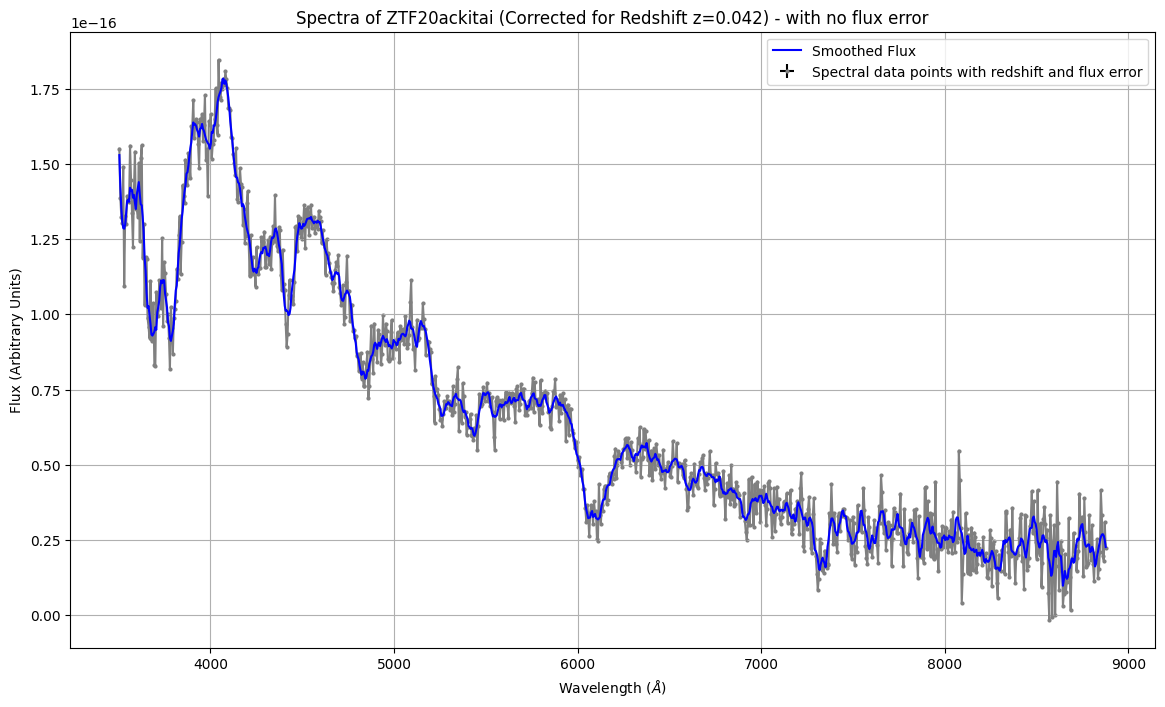

In [175]:
window_length = 13  # must be odd number
polyorder = 3

ztf_spectral_ids = [filename.split('_')[0] for filename in specific_files_s]

directory_path = 'dr2/spectra'

supernova_id = 'ZTF20ackitai'

filename = next((file for file in specific_files_s if supernova_id in file), None)

file_pathh = 'dr2/tables'

file_name = 'ztfdr2_salt2_params.csv'

fullpath = os.path.join(file_pathh, file_name)

do = pd.read_csv(fullpath)

ra = coordinates[supernova_id]['RA']
dec = coordinates[supernova_id]['DEC']

coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

table = IrsaDust.get_query_table(coord, section='ebv')

if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
else:
    raise ValueError("E(B-V) column not found in the table.")

rv = 3.1 # This is constant for milky way

av = ebv * rv

file_path = os.path.join(directory_path, filename.strip())

try:
    df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
    wave = df[0]
    flux = df[1]
    flux_err = df[2] if df.shape[1] > 2 else None
    flux_smoothed = savgol_filter(flux, window_length, polyorder)

except Exception as e:
    print(f"Failed to read {file_path}: {e}")
    raise

row = do.loc[do['ztfname'] == supernova_id]
if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]
    print('Redshift value:', z, '±', err)
else:
    print(f"No redshift data found for {supernova_id}")

wave = wave / (1 + z)
wave_err = wave * err

plt.figure(figsize=(14, 8))

#plt.axvline(x = 7594, color = '#87CEEB', linestyle = '-.', label = 'Telluric Lines')
#plt.axvline(x = 7621, color = '#87CEEB', linestyle = '-.', label = 'Telluric Lines')

#plt.axvline(x = 6355, color = 'green', linestyle = '--', label = 'Si II')
#plt.axvline(x = 6155, color = 'green', linestyle = '--', label = 'Si II')

#plt.axvline(x = 5868, color = 'green', linestyle = '--', label = 'Si II')
#plt.axvline(x = 5041, color = 'green', linestyle = '--', label = 'Si II')
#plt.axvline(x = 4621, color = 'green', linestyle = ':', label = 'Si II')
#plt.axvline(x = 3905, color = 'green', linestyle = ':', label = 'Si II')

#plt.axvline(x = 6582, color = 'purple', linestyle = '--', label = 'C II')
#plt.axvline(x = 7231, color = 'purple', linestyle = '--', label = 'C II')

#plt.axvline(x = 5151, color = 'purple', linestyle = ':', label = 'C II')
#plt.axvline(x = 5889, color = 'purple', linestyle = ':', label = 'C II')
#plt.axvline(x = 8355, color = 'purple', linestyle = ':', label = 'C II')

#plt.axvline(x = 7774, color = 'orange', linestyle = '--', label = 'O I')

#plt.axvline(x = 6000, color = 'black', linestyle = '--', alpha = 0.4)
#plt.axvline(x = 6500, color = 'black', linestyle = '--', alpha = 0.4)

#plt.axvline(x = 6554, color = 'indigo')
#plt.axvline(x = 6210, color = 'cyan')


if flux_err is not None and np.any(flux_err != 0):
  print('Error values present')
  plt.plot(wave,flux, color = 'grey')
  plt.plot(wave, flux_smoothed, color='blue', label='Smoothed Flux')
  plt.errorbar(wave, flux, xerr = wave_err, yerr = flux_err, fmt='o', color='gray', markersize=2, ecolor='k', label='Spectral data points with redshift and flux error', zorder= 1)
  plt.grid(True)
  plt.xlabel('Wavelength ($\\AA$)')
  plt.ylabel(r'Flux ($\mathrm{erg\,s^{-1}\,cm^{-2}\,\AA^{-1}}$)')

  #plt.xlim(6000,8000)
  #plt.ylim(0e-16, .75e-16)

  plt.title(f'Spectra of {supernova_id} (Corrected for Redshift z={z:.3f})')
  plt.legend(loc ='best')
  plt.show()
else:
  print('Error values not present')
  plt.plot(wave,flux, color = 'grey')
  plt.plot(wave, flux_smoothed + 0*1e-17, color='blue', label='Smoothed Flux')
  plt.errorbar(wave, flux, xerr = 0, yerr = 0, fmt='o', color='grey', markersize=2, ecolor='k', label='Spectral data points with redshift and flux error', zorder= 1)
  plt.grid(True)
  plt.xlabel('Wavelength ($\\AA$)')
  #plt.ylabel(r'Flux ($\mathrm{erg\,s^{-1}\,cm^{-2}\,\AA^{-1}}$)')
  plt.ylabel('Flux (Arbitrary Units)')

  #plt.xlim(6000,8000)
  #plt.ylim(4e-17, 1.2e-16)
  plt.title(f'Spectra of {supernova_id} (Corrected for Redshift z={z:.3f}) - with no flux error')
  plt.legend(loc ='best')
  plt.show()

In [176]:
wobs1 = 6060 #si
wrst1 = 6155

wobs2 = 5750 #si
wrst2 = 5868

wobs3 = 4870
wrst3 = 5041

wobs4 = 7100
wrst4 = 7231

wobs5 = 6451
wrst5 = 6582

z1 = (wobs1 - wrst1)/wrst1
z2 = (wobs2 - wrst2)/wrst2
z3 = (wobs3 - wrst3)/wrst3
z4 = (wobs4 - wrst4)/wrst4
z5 = (wobs5 - wrst5)/wrst5

print(z1)

c = 299792458

vel1 = (((z1+1)**2 - 1)*c)/(1+(1+z1)**2)
vel2 = (((z2+1)**2 - 1)*c)/(1+(1+z2)**2)
vel3 = (((z3+1)**2 - 1)*c)/(1+(1+z3)**2)
vel4 = (((z4+1)**2 - 1)*c)/(1+(1+z4)**2)
vel5 = (((z5+1)**2 - 1)*c)/(1+(1+z5)**2)


print('The 1st velocity found is:', vel1 * 0.001, 'km/s')
print('The 2nd velocity found is:', vel2 * 0.001, 'km/s')
print('The 3rd velocity found is:', vel3 * 0.001, 'km/s')
print('The 4th velocity found is:', vel4 * 0.001, 'km/s')
print('The 5th velocity found is:', vel5 * 0.001, 'km/s')

if vel1 > 0 or vel2 > 0 or vel3 > 0 or vel4 > 0 or vel5 > 0:
    print('Based on this result, it cannot be said for certain whether spectrum is red or blushifted')
else:
    print('Based on this result, this spectra is BLUESHIFTED')


-0.015434606011372868
The 1st velocity found is: -4662.8834931369365 km/s
The 2nd velocity found is: -6089.148074944388 km/s
The 3rd velocity found is: -10341.893688354183 km/s
The 4th velocity found is: -5480.361552263615 km/s
The 5th velocity found is: -6026.063781958157 km/s
Based on this result, this spectra is BLUESHIFTED


# C2 - Simultaneous plotting with offset

Computed E(B-V) and A_V for ZTF19abkeuto: 0.059, 0.181 mag
Redshift value: 0.13214608 ± 0.0

Computed E(B-V) and A_V for ZTF20ackitai: 0.059, 0.182 mag
Redshift value: 0.04155541 ± 0.0

Computed E(B-V) and A_V for ZTF18abhpgje: 0.036, 0.110 mag
Redshift value: 0.13501953 ± 0.0

Computed E(B-V) and A_V for ZTF20adadmsg: 0.053, 0.164 mag
Redshift value: 0.07100536 ± 0.0

Computed E(B-V) and A_V for ZTF19abpbqor: 0.056, 0.172 mag
Redshift value: 0.04630013 ± 0.0

Computed E(B-V) and A_V for ZTF18abmjyvo: 0.024, 0.073 mag
Redshift value: 0.05666686 ± 0.0

Computed E(B-V) and A_V for ZTF18aayiahw: 0.013, 0.041 mag
Redshift value: 0.06371429 ± 0.0

Computed E(B-V) and A_V for ZTF20abahhml: 0.345, 1.068 mag
Redshift value: 0.04493157 ± 0.0

Computed E(B-V) and A_V for ZTF20abgfekk: 0.013, 0.040 mag
Redshift value: 0.05737287 ± 0.0



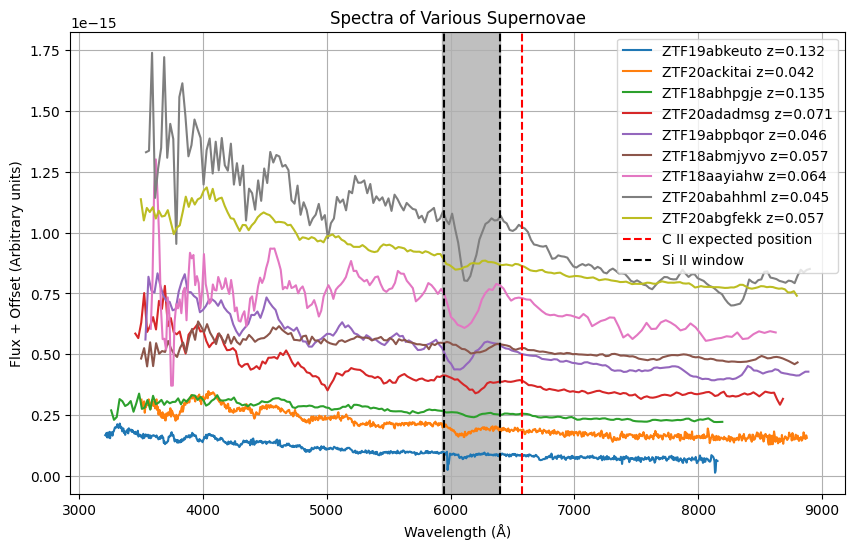

In [177]:
directory_path = 'dr2/spectra'
file_pathh = 'dr2/tables'
file_name = 'ztfdr2_salt2_params.csv'
full_path = os.path.join(file_pathh, file_name)

redshift_data = pd.read_csv(full_path)

plt.figure(figsize=(10, 6))

specific_files = [
    'ZTF19abkeuto_20190809_NTT_0.ascii', 'ZTF20ackitai_20201023_NTT_0.ascii',
    'ZTF18abhpgje_20180816_SEDm_0.ascii ',
    'ZTF20adadmsg_20210116_SEDm_0.ascii', 'ZTF19abpbqor_20190819_SEDm_0.ascii',
    'ZTF18abmjyvo_20180826_SEDm_0.ascii', 'ZTF18aayiahw_20180622_SEDm_0.ascii',
    'ZTF20abahhml_20200609_SEDm_0.ascii', 'ZTF20abgfekk_20200623_SEDm_0.ascii'
]

offset = 5e-17
offset_increment = 8e-17

for file in specific_files:
    file_path = os.path.join(directory_path, file.strip())
    supernova_id = file.split('_')[0]

    reds = redshift_data[redshift_data['ztfname'] == supernova_id]
    if not reds.empty:
        z = reds['z'].iloc[0]
        z_err = reds['z_err'].iloc[0]
    else:
        print(f"No redshift data for {supernova_id}")

    ra = coordinates[supernova_id]['RA']
    dec = coordinates[supernova_id]['DEC']
    coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')
    table = IrsaDust.get_query_table(coord, section='ebv')

    if 'ext SFD min' in table.colnames:
        ebv = table['ext SFD min'][0]
    else:
        raise ValueError("E(B-V) column not found in the table.")

    rv = 3.1  # This is constant for the Milky Way
    av = ebv * rv

    print(f'Computed E(B-V) and A_V for {supernova_id}: {ebv:.3f}, {av:.3f} mag')
    print('Redshift value:', z, '±', z_err)
    print()

    try:
        df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
        wave = df[0]
        wave = wave / (1 + z)
        flux = df[1]
        if df.shape[1] > 2:
            flux_err = df[2]
        else:
            flux_err = None

        flux = flux * 10**(0.4 * av)
        flux_offset = flux + offset
        plt.plot(wave, flux_offset, label=f'{supernova_id} z={z:.3f}')
        offset += offset_increment

    except Exception as e:
        print(f"Failed to read {file_path}: {e}")
        raise

#plt.axvline(x = 6355, color = 'black', linestyle = ':', label = 'Si II')
plt.axvline(x = 6580, color = 'red', linestyle = '--', label = 'C II expected position')
#plt.axvline(x = 7231, color = 'black', linestyle = ':', label = 'Ca II')
#plt.axvline(x = 7774, color = 'black', linestyle = ':', label = 'O I')

#plt.axvline(x = 5972, color = 'black', linestyle = ':', label = 'Si II')

plt.axvline(x = 5950, color = 'black', linestyle = '--', label ='Si II window')
plt.axvline(x = 6400, color = 'black', linestyle = '--')
plt.axvspan(5930, 6400, color='grey', alpha=0.5)
#plt.axvline(x = 7594, color = 'blue', linestyle = ':', label = 'Atmospheric impact', alpha = 0.5)
#plt.axvline(x = 7621, color = 'blue', linestyle = ':', label = 'Atmospheric impact', alpha = 0.5)

plt.xlabel('Wavelength (Å)')
#plt.ylabel('Flux + Offset (erg/s/cm²/Å)')
plt.ylabel('Flux + Offset (Arbitrary units)')
plt.title('Spectra of Various Supernovae')
plt.legend()
plt.grid(True)
plt.show()

# C3 - Simultaneous plotting in sep. plots

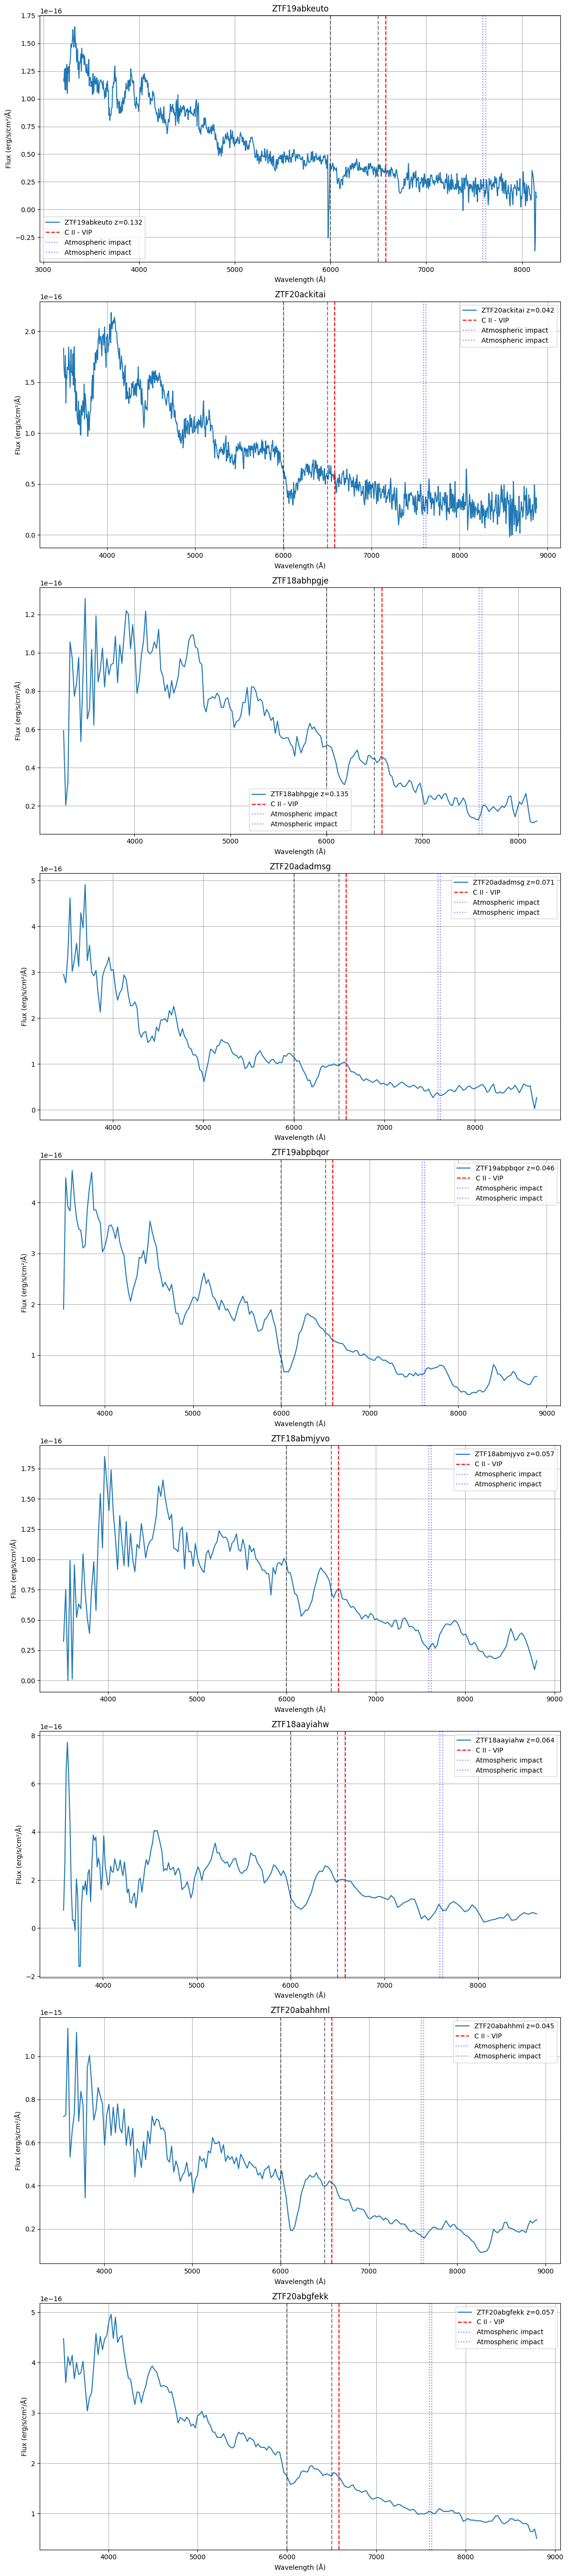

In [178]:
num_files = len(specific_files)
cols = 1
rows = (num_files + cols - 1) // cols
plt.figure(figsize=(12,6 * rows))

for index, file in enumerate(specific_files, start=1):
    plt.subplot(rows, cols, index)
    file_path = os.path.join(directory_path, file.strip())
    supernova_id = file.split('_')[0]

    reds = redshift_data[redshift_data['ztfname'] == supernova_id]
    if not reds.empty:
        z = reds['z'].iloc[0]
        z_err = reds['z_err'].iloc[0]
    else:
        print(f"No redshift data for {supernova_id}")
        continue

    ra = coordinates[supernova_id]['RA']
    dec = coordinates[supernova_id]['DEC']
    coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')
    table = IrsaDust.get_query_table(coord, section='ebv')

    if 'ext SFD min' in table.colnames:
        ebv = table['ext SFD min'][0]
    else:
        raise ValueError("E(B-V) column not found in the table.")

    rv = 3.1  # This is constant for the Milky Way
    av = ebv * rv

    try:
        df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
        wave = df[0]
        wave = wave / (1 + z)
        flux = df[1] * 10**(0.4 * av)

        plt.plot(wave, flux, label=f'{supernova_id} z={z:.3f}')

        #plt.axvline(x = 6355, color = 'green', linestyle = '-', label = 'Si II')
        #plt.axvline(x = 5972, color = 'green', linestyle = '-', label = 'Si II')
        #plt.axvline(x = 5882, color = 'green', linestyle = '-', label = 'Si II')
        plt.axvline(x = 6000, color = 'black', linestyle = '--', alpha = 0.5)
        plt.axvline(x = 6500, color = 'black', linestyle = '--', alpha = 0.5)

        plt.axvline(x = 6580, color = 'red', linestyle = '--', label = 'C II - VIP')
        #plt.axvline(x = 7231, color = 'purple', linestyle = '--', label = 'C II - VIP')

        #plt.axvline(x = 7774, color = 'maroon', linestyle = '--', label = 'O I')

        plt.axvline(x = 7594, color = 'blue', linestyle = ':', label = 'Atmospheric impact', alpha = 0.5)
        plt.axvline(x = 7621, color = 'blue', linestyle = ':', label = 'Atmospheric impact', alpha = 0.5)

        plt.xlabel('Wavelength (Å)')
        plt.ylabel('Flux (erg/s/cm²/Å)')
        plt.title(f'{supernova_id}')
        plt.grid(True)
        plt.legend()

        #plt.xlim(5750,6600)
        #plt.ylim(1.5e-16, 2.5e-16)

        offset += offset_increment
    except Exception as e:
        print(f"Failed to read {file_path}: {e}")
        continue

plt.tight_layout()

# C4 - To produce hist. vel. plots

In [191]:
uncs = []
gfit_unc = 0.01
sigs = []
vels = []

def gaussplotvel(supernova_id, a, b, c, h, min_val, max_val, spec_l, x1, x2, y1, y2):
  print('This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)')

  filename = next((file for file in specific_files_s if supernova_id in file), None)

  file_pathh = 'dr2/tables'

  file_name = 'ztfdr2_salt2_params.csv'

  fullpath = os.path.join(file_pathh, file_name)

  do = pd.read_csv(fullpath)

  ra = coordinates[supernova_id]['RA']
  dec = coordinates[supernova_id]['DEC']

  coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

  table = IrsaDust.get_query_table(coord, section='ebv')

  if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
  else:
    raise ValueError("E(B-V) column not found in the table.")

  rv = 3.1 # This is constant for milky way

  av = ebv * rv

  file_path = os.path.join(directory_path, filename.strip())

  try:
    df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
    wave = df[0]
    flux = df[1]
    if df.shape[1] > 2:
      flux_err = df[2]
    else:
      flux_err = None
      print('No Flux Error Provided')
  except Exception as e:
    print(f"Failed to read {file_path}: {e}")
    raise

  row = do.loc[do['ztfname'] == supernova_id]
  if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]

  else:
    print(f"No redshift data found for {supernova_id}")

  wave = wave / (1 + z)
  wave_err = wave * err
  delta = 20

  omin = min_val
  omax = max_val

  min_val_range = np.linspace(omin - delta, omin + delta, 11)
  max_val_range = np.linspace(omax - delta, omax + delta, 11)

  for i in range(len(min_val_range) - 1):
    min_val = min_val_range[i]
    max_val = max_val_range[i+1]

    if min_val >= max_val:
      continue

    filtered_wave = (wave >= min_val) & (wave <= max_val)

    wave_fil = wave[filtered_wave]

    flux_fil = flux[filtered_wave]

    def Gau1(wave, a, b, c, h):
        return (a * np.exp(-(wave - b)**2 / (2 * c**2))) + h

    p0 = [a, b, c, h]

    if flux_err is not None:
      flux_err_fil = flux_err[filtered_wave]
      try:
          params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, sigma=flux_err_fil, absolute_sigma=True, maxfev = 100000)
      except Exception as e:
          print(f"Curve fit error with flux_err: {e}")
    else:
      try:
          params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, maxfev = 100000)
      except Exception as e:
          print(f"Curve fit error without flux_err: {e}")

    fity2 = Gau1(wave_fil, params1[0], params1[1], params1[2], params1[3])
    residuals = flux_fil - Gau1(wave_fil, *params1)

    signoise = np.max(flux_fil) / np.std(flux_fil)
    sigs.append(signoise)
    unc = gfit_unc / signoise
    uncs.append(unc)

    sc = 299792458
    b_fit = params1[1]

    B1 = (b_fit - spec_l)/spec_l

    vel = (((B1+1)**2 - 1)*sc)/(1+(1+B1)**2)

    vels.append(vel)

  b_fit_uncertainty = 20
  sigB1 = b_fit_uncertainty / spec_l
  h9 = B1 / 10
  B1_h = B1 + h9
  vel_plus_h = (((B1_h+1)**2 - 1)*sc)/(1+(1+B1_h)**2)
  deriv_vel_B1 = (vel_plus_h - vel) / h9
  sig_vel = np.abs(deriv_vel_B1) * sigB1

  print('For', supernova_id, ':')
  print('Initial Guesses =', p0)
  print('Calculated parameters =', params1)
  print('The E(B-V) value =', ebv)
  print('The A_v value =', av)
  print('Redshift =', z, '+/-', err)
  print('Uncertainty =', unc)
  print('Signal-to-noise ratio =', signoise)
  print('Velocity:', vel * 0.001, '+/-', sig_vel * 0.001,  'km/s') # unc * 0.001 * sc

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 2]})
  ax1.plot(wave, flux, 'b', label='Full Spectrum')
  ax1.plot(wave_fil, flux_fil, 'k', label='Filtered Spectrum')
  ax1.plot(wave_fil, Gau1(wave_fil, *params1), 'r', label='Gaussian Fit')
  ax1.axvline(x = b, color = 'cyan', label = 'Pos. of mean')
  ax1.axvline(x = min_val, color = 'green')
  ax1.axvline(x = max_val, color = 'green', label = 'Range')
  ax1.set_title(f'Spectrum of {supernova_id}')
  ax1.set_ylabel('Flux (Arbitrary units)')
  ax1.set_xlabel('Wavelength (Å)')
  ax1.grid(True)
  ax1.legend()

  plt.tight_layout()
  plt.show()

# C4R - Plots, fits and velocity dist. for different spectra


This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
For ZTF18abhpgje :
Initial Guesses = [-1.9e-17, 6180, 190, 5e-17]
Calculated parameters = [-1.66223757e-17  6.17367114e+03 -5.15176631e+01  4.46360459e-17]
The E(B-V) value = 0.0356
The A_v value = 0.11036
Redshift = 0.13501953 +/- 0.0
Uncertainty = 0.0012917695556217547
Signal-to-noise ratio = 7.741318841646488
Velocity: -8676.042367613974 +/- 971.7256575811683 km/s


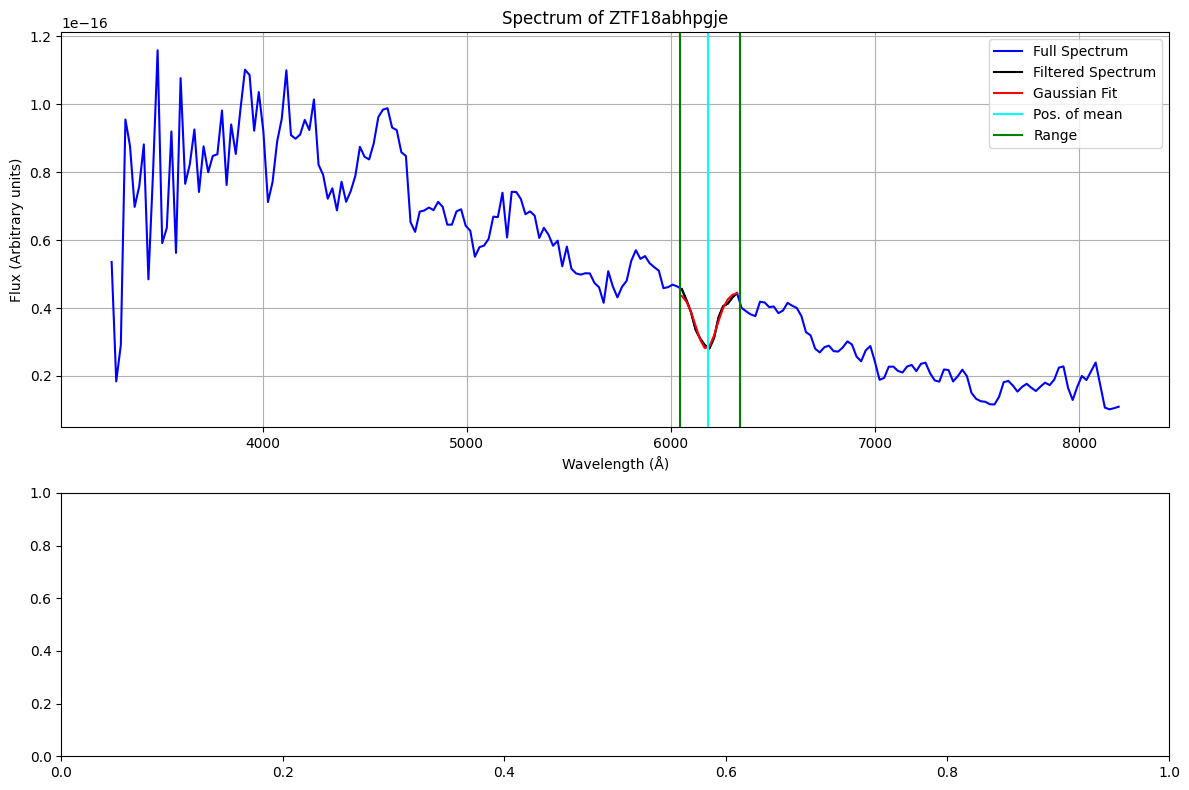

In [192]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF18abhpgje", -0.19e-16,   6180,       190,      .5e-16,      6030, 6320,   6355,   5000, 7500, 0, 1.2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
For ZTF20adadmsg :
Initial Guesses = [-3e-17, 6205, 230, 8e-17]
Calculated parameters = [-3.93764749e-17  6.20239557e+03  5.60553865e+01  8.42405473e-17]
The E(B-V) value = 0.053
The A_v value = 0.1643
Redshift = 0.07100536 +/- 0.0
Uncertainty = 0.001628034784359554
Signal-to-noise ratio = 6.142374902593902
Velocity: -7285.412182467561 +/- 967.2586594997375 km/s


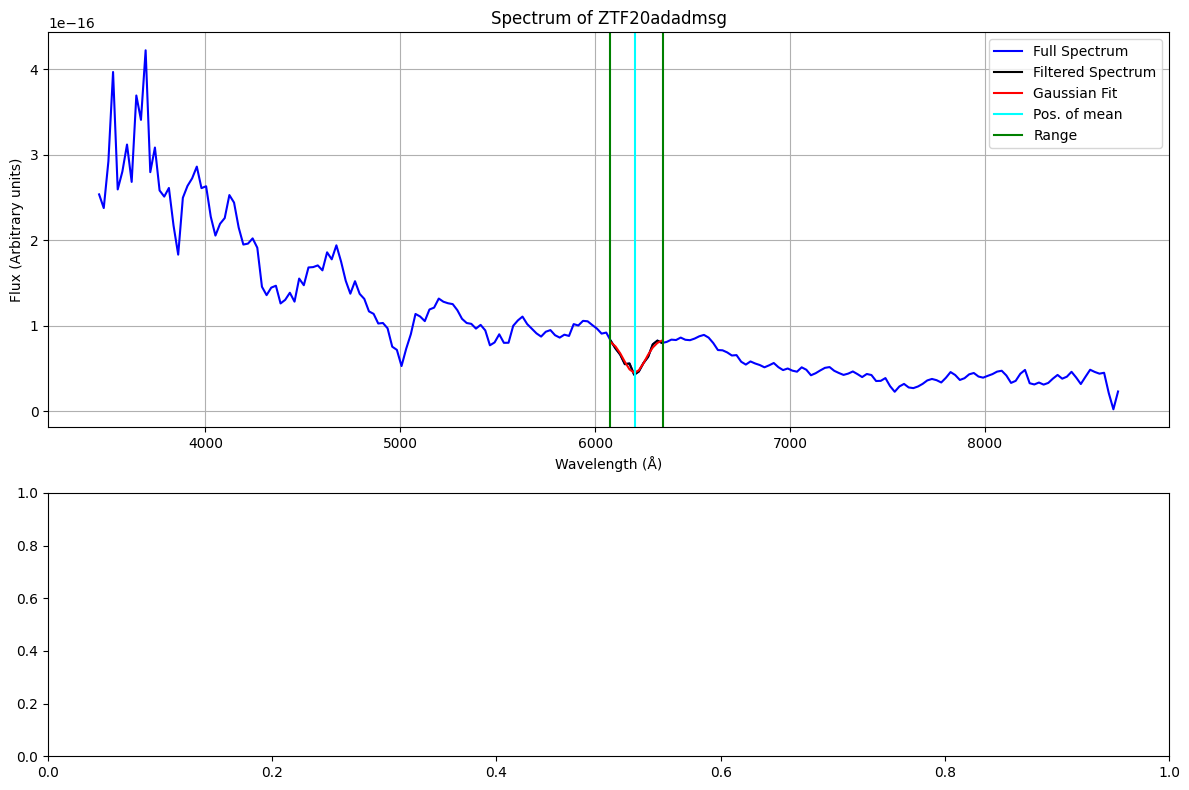

In [193]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF20adadmsg", -0.3e-16,   6205,       230,      .8e-16,     6060, 6330,   6355,   5000, 7500, 0, 1.2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
For ZTF18abmjyvo :
Initial Guesses = [-2e-17, 6166, 240, 5e-17]
Calculated parameters = [-6.52059230e-17  6.19880797e+03 -1.37586711e+02  1.16917024e-16]
The E(B-V) value = 0.0235
The A_v value = 0.07285
Redshift = 0.05666686 +/- 0.0
Uncertainty = 0.0013113542564895653
Signal-to-noise ratio = 7.625704458206082
Velocity: -7458.763925883393 +/- 967.8167765228254 km/s


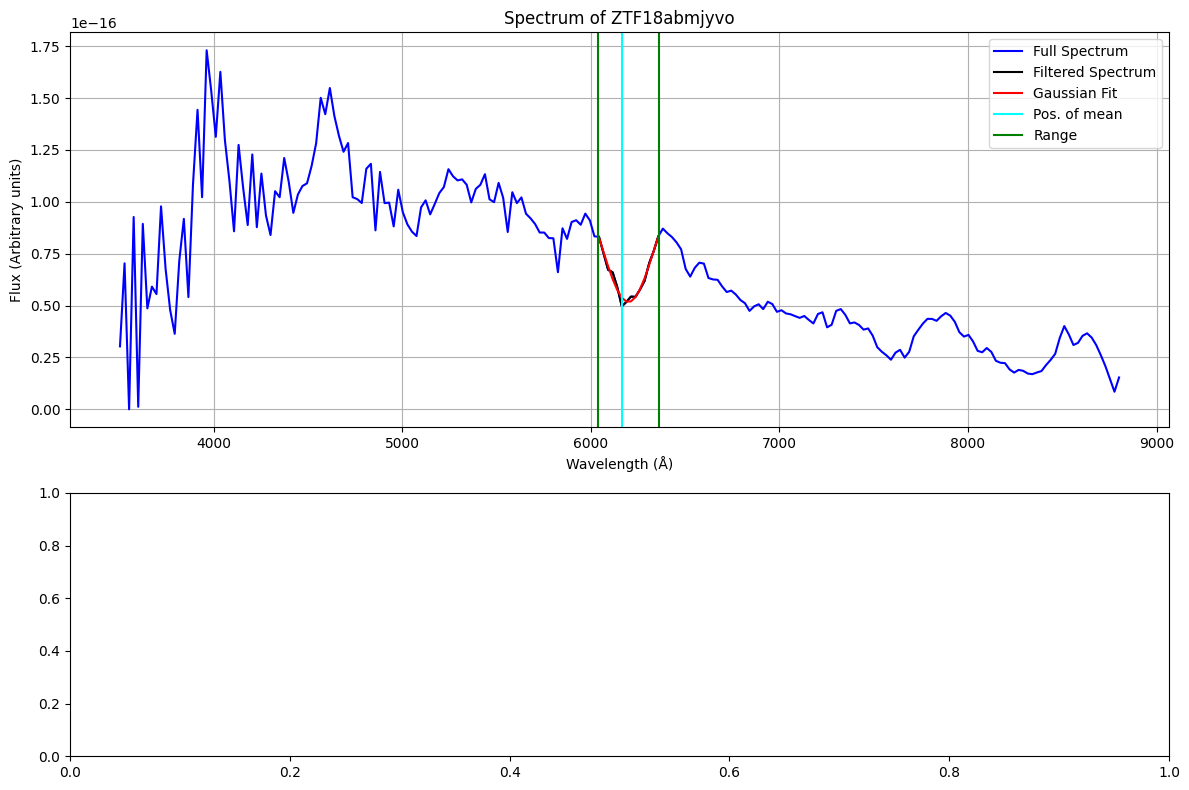

In [194]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF18abmjyvo", -0.2e-16,   6166,       240,      .5e-16,     6020, 6340,   6355,   5000, 7500, 0, 1.2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
For ZTF19abpbqor :
Initial Guesses = [-3e-17, 6080, 200, 1.25e-16]
Calculated parameters = [-1.23588976e-16  6.07341876e+03  1.10430226e+02  1.80415221e-16]
The E(B-V) value = 0.0555
The A_v value = 0.17205
Redshift = 0.04630013 +/- 0.0
Uncertainty = 0.002064590025137762
Signal-to-noise ratio = 4.843576631797753
Velocity: -13577.370569922428 +/- 987.2791345237962 km/s


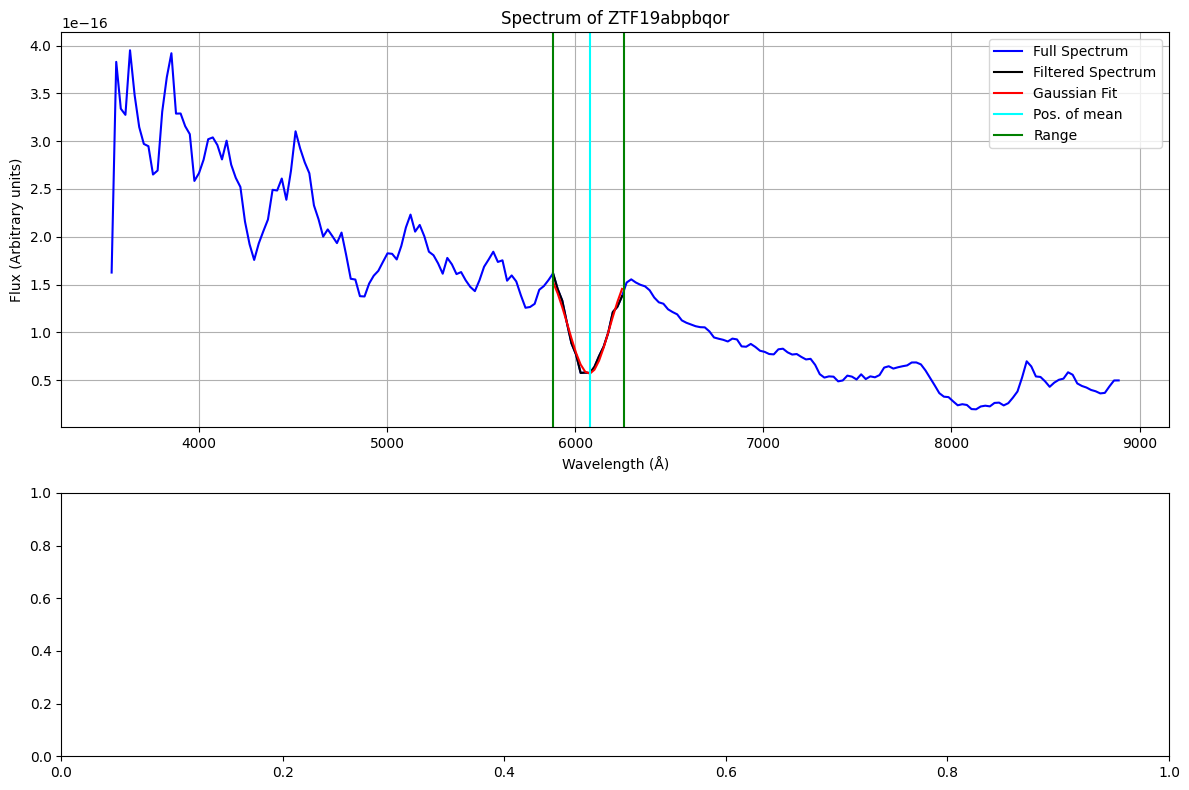

In [195]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF19abpbqor", -.3e-16,   6080,       200,      1.25e-16,     5865, 6240,   6355,   5000, 7500, 0, 2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
No Flux Error Provided
For ZTF20ackitai :
Initial Guesses = [-4.5e-17, 6105, 120, 1e-16]
Calculated parameters = [-3.77965855e-17  6.10742944e+03  9.02128705e+01  7.04855432e-17]
The E(B-V) value = 0.0587
The A_v value = 0.18197000000000002
Redshift = 0.04155541 +/- 0.0
Uncertainty = 0.0016059609482771573
Signal-to-noise ratio = 6.226801474050661
Velocity: -11906.267492809899 +/- 982.010136629337 km/s


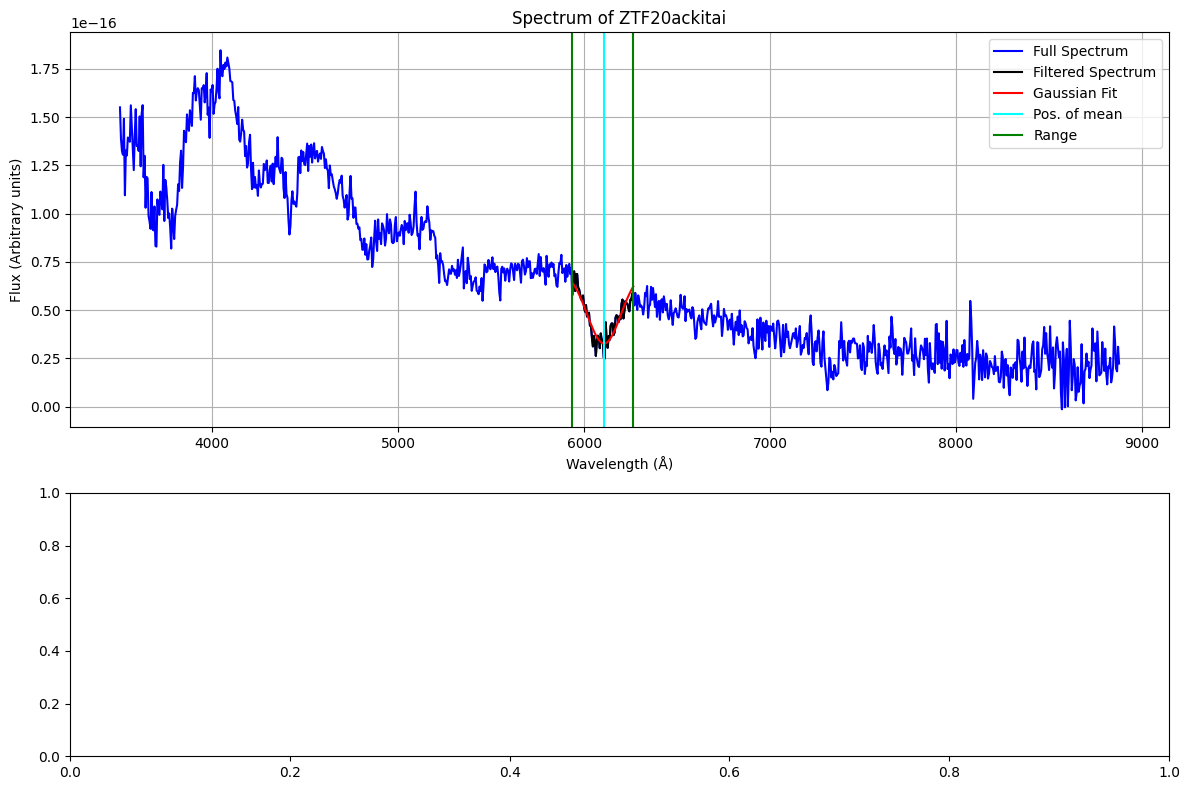

In [196]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF20ackitai", -.45e-16,   6105,       120,      1e-16,     5920, 6245,   6355,   5000, 7000, -.5e-16, 2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
No Flux Error Provided
For ZTF19abkeuto :
Initial Guesses = [-1e-17, 6080, 200, 5e-17]
Calculated parameters = [-1.52217120e-14  6.08550294e+03 -4.49934677e+03  1.52461048e-14]
The E(B-V) value = 0.0585
The A_v value = 0.18135
Redshift = 0.13214608 +/- 0.0
Uncertainty = 0.0023544934117179445
Signal-to-noise ratio = 4.247198123482346
Velocity: -12982.6406515162 +/- 985.4080373387009 km/s


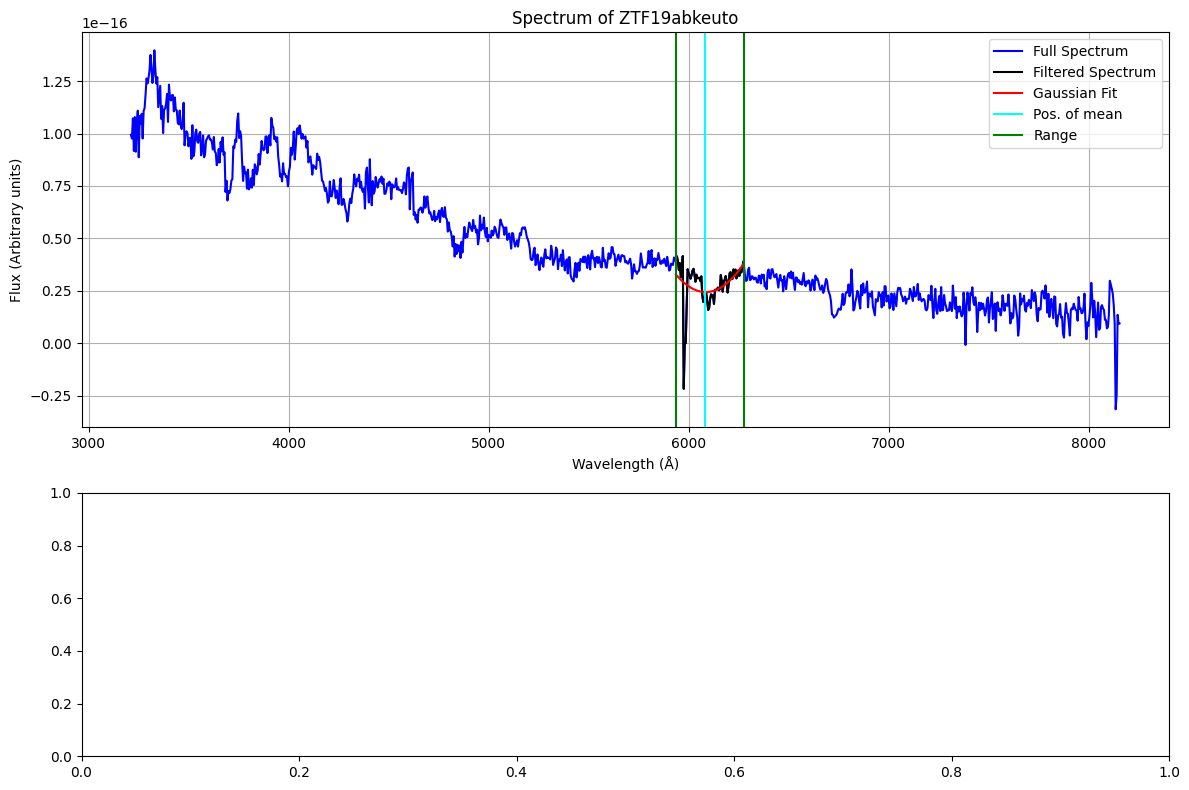

In [197]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF19abkeuto", -.1e-16,   6080,       200,      .5e-16,     5920, 6255,   6355,   5000, 7000, -.5e-16, 2e-16)

This code is for the velocity distributions for the Si II feature (6000 Å - 6500 Å)
No Flux Error Provided
For ZTF18aayiahw :
Initial Guesses = [-4.5e-17, 6115, 100, 1e-16]
Calculated parameters = [-4.61455024e-16  6.10673135e+03 -2.01100515e+02  5.36821176e-16]
The E(B-V) value = 0.0133
The A_v value = 0.041229999999999996
Redshift = 0.06371429 +/- 0.0
Uncertainty = 0.0022781026772504803
Signal-to-noise ratio = 4.389617772658667
Velocity: -11940.482022322398 +/- 982.1183716829554 km/s


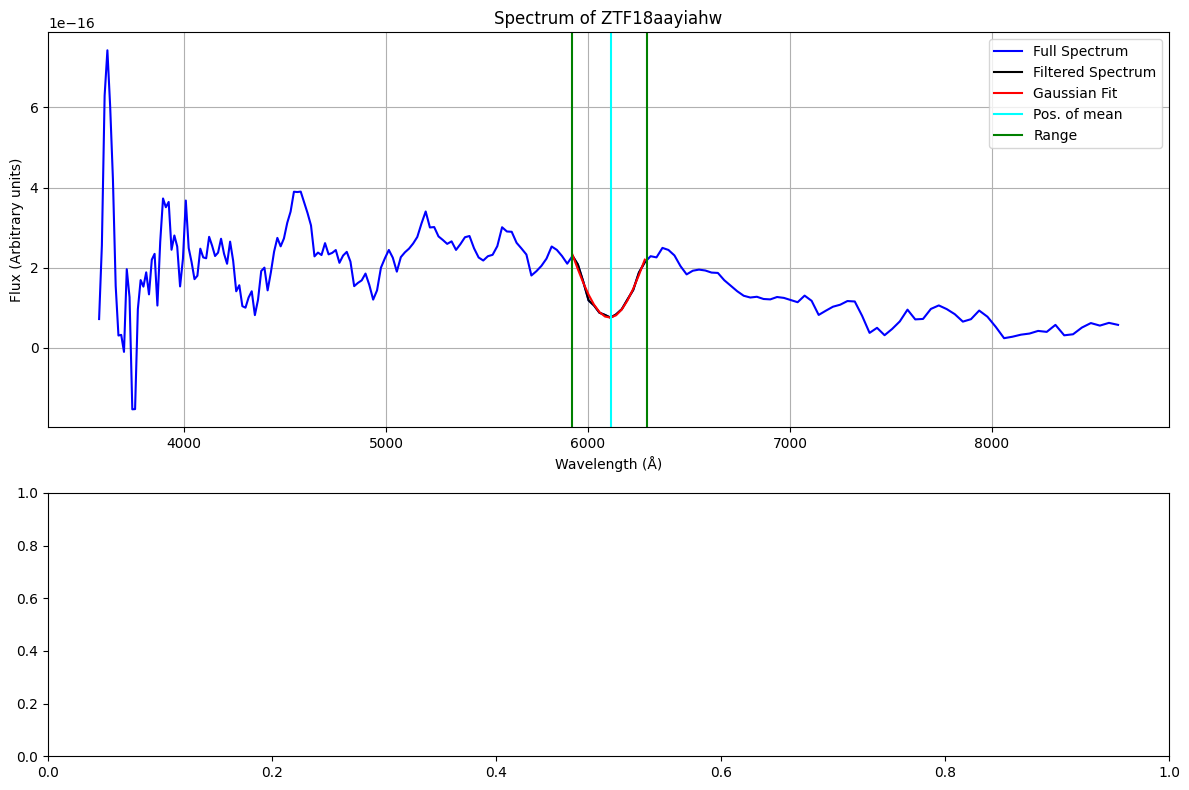

In [198]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotvel("ZTF18aayiahw", -.45e-16,   6115,       100,      1e-16,     5905, 6270,   6355,   5000, 7000, -.5e-16, 5e-16)

# C5 - To find pEW

In [ ]:
uncs = []
gfit_unc = 0.01
sigs = []
pEWs = []

def gaussplotpew(supernova_id, a, b, c, h, min_val, max_val, spec_l, x1, x2, y1, y2, scal):
  filename = next((file for file in specific_files_s if supernova_id in file), None)

  file_pathh = 'dr2/tables'

  file_name = 'ztfdr2_salt2_params.csv'

  fullpath = os.path.join(file_pathh, file_name)

  do = pd.read_csv(fullpath)

  ra = coordinates[supernova_id]['RA']
  dec = coordinates[supernova_id]['DEC']

  coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

  table = IrsaDust.get_query_table(coord, section='ebv')

  if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
  else:
    raise ValueError("E(B-V) column not found in the table.")

  rv = 3.1 # This is constant for milky way

  av = ebv * rv

  file_path = os.path.join(directory_path, filename.strip())

  try:
    df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
    wave = df[0]
    flux = df[1]
    if df.shape[1] > 2:
      flux_err = df[2]
    else:
      flux_err = None
      print('No Flux Error Provided')
  except Exception as e:
    print(f"Failed to read {file_path}: {e}")
    raise

  row = do.loc[do['ztfname'] == supernova_id]
  if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]

  else:
    print(f"No redshift data found for {supernova_id}")

  wave = wave / (1 + z)

  filtered_wave = (wave >= min_val) & (wave <= max_val)

  filtered_wave_l = (wave >= min_val) & (wave <= b)
  filtered_wave_r = (wave >= b) & (wave <= max_val)

  filtered_wave_contl = (wave >= min_val - 10) & (wave <= min_val + 10)
  filtered_wave_contr = (wave >= max_val - 10) & (wave <= max_val + 10)

  wave_fil_contl = wave[filtered_wave_contl]
  flux_fil_contl = flux[filtered_wave_contl]

  wave_fil_contr = wave[filtered_wave_contr]
  flux_fil_contr = flux[filtered_wave_contr]

  total_continuum_mask = filtered_wave_contl | filtered_wave_contr

  wave_fil_cont = wave[total_continuum_mask]
  flux_fil_cont = flux[total_continuum_mask]

  if flux_err is not None:
    flux_err_fil_cont = flux_err[total_continuum_mask]
    weights = 1 / flux_err_fil_cont
    coefficients = np.polyfit(wave_fil_cont, flux_fil_cont, 1, w=weights)
    p = np.poly1d(coefficients)

  else:
    coefficients = np.polyfit(wave_fil_cont, flux_fil_cont, 1)
    p = np.poly1d(coefficients)

  x_cont_fit = np.linspace(min(wave_fil_cont), max(wave_fil_cont), 100)
  y_cont_fit = p(x_cont_fit)

  wave_fil = wave[filtered_wave]

  flux_fil = flux[filtered_wave]

  flux_fil_l = flux[filtered_wave_l]
  flux_fil_r = flux[filtered_wave_r]

  index_l_flux = np.max(flux_fil_l)
  index_r_flux = np.max(flux_fil_r)

  flux_inds = (index_l_flux, index_r_flux)

  avg_flux_index = np.mean(flux_inds)

  contin = p(wave_fil)
  flux_normalised = flux_fil / contin

  def Gau1(wave, a, b, c, h):
      return (a * np.exp(-(wave - b)**2 / (2 * c**2))) + h

  al = a * scal

  p0 = [a, b, c, h]
  p1 = [al, b, c, 0.95]
  print('For', supernova_id, ':')
  print('Initial parameters', p0, p1)

  if flux_err is not None:
    flux_err_fil = flux_err[filtered_wave]
    try:
        params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, sigma=flux_err_fil, absolute_sigma=True, maxfev=100000)
    except Exception as e:
        print(f"Curve fit error with flux_err: {e}")
  else:
    try:
        params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, maxfev=100000)
    except Exception as e:
        print(f"Curve fit error without flux_err: {e}")

  fity2 = Gau1(wave_fil, params1[0], params1[1], params1[2], params1[3])

  min_amplitude, max_amplitude = -np.inf, np.inf
  min_center, max_center = -np.inf, np.inf
  min_offset, max_offset = 0, 1

  min_width, max_width = c - c/100, c + c/100

  bounds = ([min_amplitude, min_center, min_width, min_offset], [max_amplitude, max_center, max_width, max_offset])

  if flux_err is not None:
    flux_err_fil = flux_err[filtered_wave]
    try:
        params2, cov_matrix2 = curve_fit(Gau1, wave_fil, flux_normalised, p0=p1, sigma=flux_err_fil, absolute_sigma=True, maxfev=1000000, bounds = bounds)
    except Exception as e:
        print(f"Curve fit error with flux_err: {e}")
  else:
    try:
        params2, cov_matrix2 = curve_fit(Gau1, wave_fil, flux_normalised, p0=p1, maxfev=1000000)
    except Exception as e:
        print(f"Curve fit error without flux_err: {e}")

  fity3 = Gau1(wave_fil, params2[0], params2[1], params2[2], params2[3])
  ooo = 1 - flux_normalised

  pew = np.trapz(ooo, contin)

  jericho = params2[0]

  jericho = np.abs(jericho)

  jericho = jericho

  print('Jericho', jericho)

  calcutta = params2[2]

  print('Calcutta', calcutta)

  pew2 = abs(jericho) * abs(calcutta) * (np.sqrt(2 * np.pi))

  n_sim = 100000
  coeff_sample = np.zeros((n_sim, 5))

  try:
    for i in range(n_sim):
      simulated_flux = np.random.normal(flux_fil_cont, flux_err_fil_cont)
    if flux_err is not None:
      weights = 1 / np.where(flux_err_fil_cont > 0, flux_err_fil_cont, np.inf)
      coeff_sample[i, :] = np.polyfit(wave_fil_cont, simulated_flux, 1, w=weights)
    else:
      coeff_sample[i, :] = np.polyfit(wave_fil_cont, simulated_flux, 1)
  except:
    a = 1 + 1

  coeff_std = np.std(coeff_sample, axis=0)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 2]})

  ax1.plot(wave, flux, 'b', label='Full Spectrum')
  ax1.plot(wave_fil, flux_fil, 'k', label='Filtered Spectrum')
  ax1.plot(wave_fil, Gau1(wave_fil, *params1), 'r', label='Gaussian Fit')
  ax1.plot(x_cont_fit, y_cont_fit, '--', label='Rough Est. of continuum', color = 'cyan')
  ax1.fill_between(wave_fil, fity2, contin, color='gray', alpha=0.5, label='Integrated Area (pEW)')
  ax1.axvline(x = b, color = 'indigo', label = 'Pos. of mean', linestyle = '--')
  ax1.axvline(x = min_val, color = 'green')
  ax1.axvline(x = max_val, color = 'green', label = 'Range')
  ax1.axhline(y = avg_flux_index, color = 'black', linestyle = '--', alpha = 0.5)

  ax1.set_title(f'Spectrum of {supernova_id}')
  ax1.set_ylabel('Flux (Arbitrary units)')
  ax1.set_xlabel('Wavelength (Å)')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(wave_fil, flux_normalised,  'k', label='Filtered Spectrum')
  ax2.fill_between(wave_fil, flux_normalised, 1, where=(flux_normalised < 1), color='gray', alpha=0.5, label='Integrated Area (pEW)')
  params_test = [-0.4, 6187, 290, 1]
  ax2.set_title(f'Normalised flux for {supernova_id}')
  ax2.set_ylabel('Flux (Arbitrary units)')
  ax2.set_xlabel('Wavelength (Å)')
  ax2.set_xlim(min_val - 20, max_val + 20)
  ax2.legend()
  ax2.grid(True)

  signoise = np.max(flux_fil) / np.std(flux_fil)
  unc = gfit_unc / signoise

  B1 = (b - spec_l)/spec_l
  sc = 299792458
  vel = (((B1+1)**2 - 1)*sc)/(1+(1+B1)**2)

  b_fit_uncertainty = 20
  sigB1 = b_fit_uncertainty / spec_l
  h9 = B1 / 10
  B1_h = B1 + h9
  vel_plus_h = (((B1_h+1)**2 - 1)*sc)/(1+(1+B1_h)**2)
  deriv_vel_B1 = (vel_plus_h - vel) / h9
  sig_vel = np.abs(deriv_vel_B1) * sigB1

  noisy_flux = (flux_normalised + np.random.normal(0, 0.05, size=wave_fil.size))

  noisy_flux = noisy_flux

  error_level = 0.05 * np.abs(flux_normalised)
  num_simulations = 1000
  pews = []

  lower_bounds = [-1, 6000, 0, 0]
  upper_bounds = [0.0, 6500, 300, 0.95]

  bounds = (lower_bounds, upper_bounds)

  def calculate_pEW(o, p):
    return o * p
  for i in range(num_simulations):
    simulation_flux = noisy_flux + np.random.normal(0, error_level)
    try:
        popt, pcov = curve_fit(Gau1, wave_fil, simulation_flux, p0=p1, bounds = bounds, maxfev=10000)
        jericho = abs(popt[0])
        calcutta = abs(popt[2]) * np.sqrt(2 * np.pi)
        pEW = 10 * calculate_pEW(jericho, calcutta)
        pews.append(pEW)
    except Exception as e:
        print(f"Failed to fit: {e}")

  pEW_std = np.std(pews)

  print('Initial Guesses =', p0)
  print('Calculated parameters =', params1)
  print('Uncertainty =', unc)
  print('Signal-to-noise ratio =', signoise)
  print('Velocity:', vel * 0.001, '+/-', sig_vel * 0.001,  'km/s')
  print(f"Pseudo-equivalent width (pEW) via Gaussian params = {pew2:.3f} +/-", pEW_std, "Angstroms")

  plt.show()

# C5R - Finding pEW of Si II absorption

For ZTF18abhpgje :
Initial parameters [-1.9e-17, 6187, 290, 5e-17] [-0.19, 6187, 290, 0.95]
Jericho 0.20400497446617236
Calcutta 287.1000000000001
Initial Guesses = [-1.9e-17, 6187, 290, 5e-17]
Calculated parameters = [-1.74162459e-17  6.17395466e+03 -5.46782529e+01  4.55725360e-17]
Uncertainty = 0.001311997558817599
Signal-to-noise ratio = 7.621965401377896
Velocity: -8029.994858750634 +/- 969.6533282788847 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 146.813 +/- 23.76240637162626 Angstroms


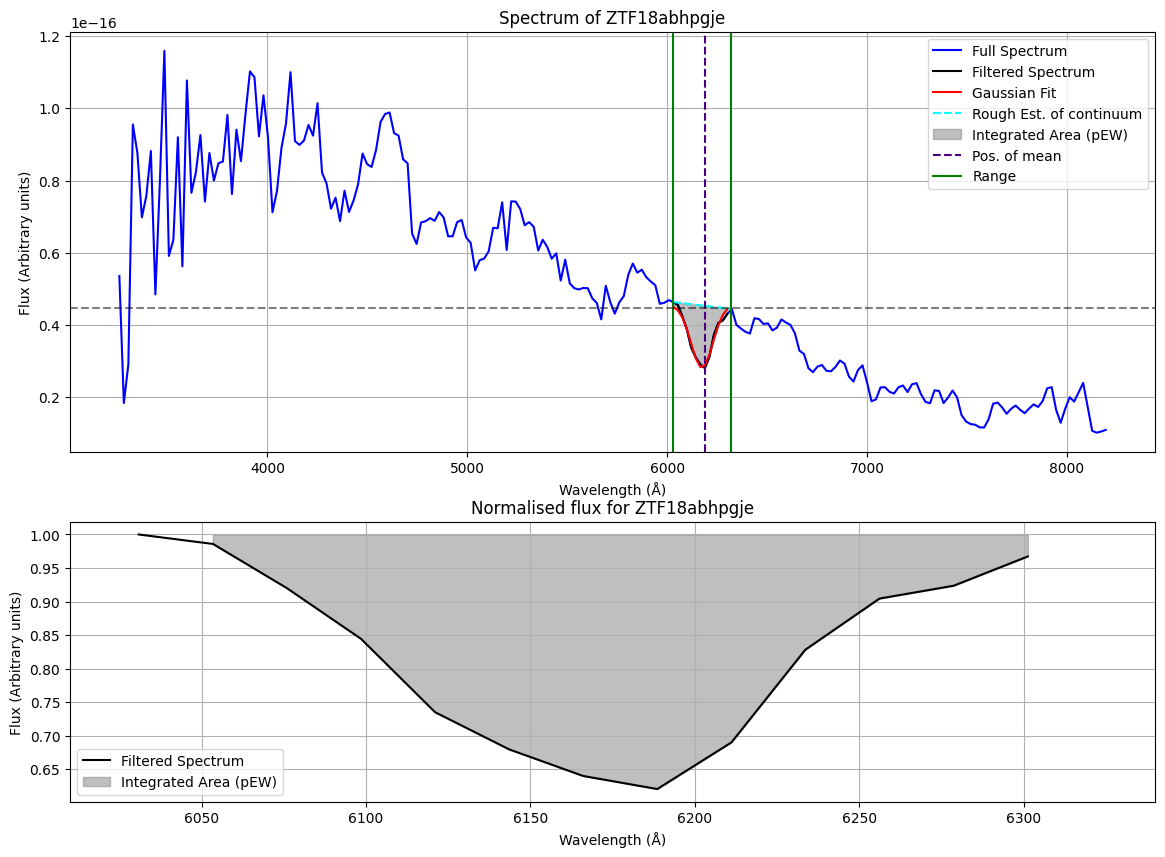

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF18abhpgje", -0.19e-16,   6187,       290,      .5e-16,      6030, 6320,   6355,   5000, 7500, 0, 1.2e-16, 1e16)

For ZTF20adadmsg :
Initial parameters [-2.6e-17, 6205, 290, 8e-17] [-0.26, 6205, 290, 0.95]
Jericho 0.2681712362069733
Calcutta 287.1000000000001
Initial Guesses = [-2.6e-17, 6205, 290, 8e-17]
Calculated parameters = [-5.17118567e-17  6.20136766e+03 -7.38917852e+01  9.77393435e-17]
Uncertainty = 0.0016190508502818596
Signal-to-noise ratio = 6.176458261492594
Velocity: -7159.626722577104 +/- 966.8534592011373 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 192.990 +/- 26.75299462599315 Angstroms


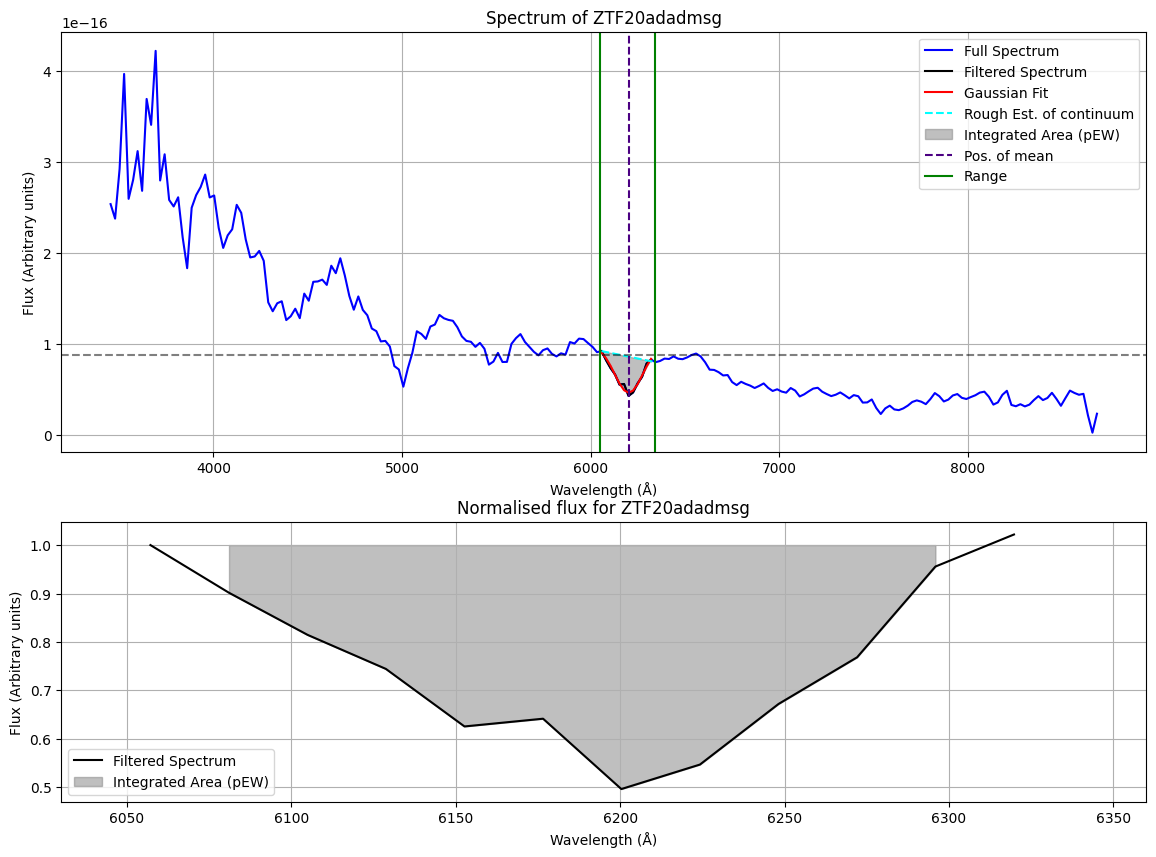

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF20adadmsg", -0.26e-16,   6205,       290,      .8e-16,     6050, 6340,   6355,   5000, 7500, 0, 1.2e-16, 1e16)

For ZTF18abmjyvo :
Initial parameters [-2e-17, 6166, 290, 5e-17] [-0.2, 6166, 290, 0.95]
Jericho 0.2200372371347344
Calcutta 287.1000000000001
Initial Guesses = [-2e-17, 6166, 290, 5e-17]
Calculated parameters = [-6.45585745e-17  6.19883771e+03 -1.36732756e+02  1.16263661e-16]
Uncertainty = 0.0012075929189203517
Signal-to-noise ratio = 8.28093626860656
Velocity: -9048.457383292694 +/- 972.9179434712918 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 158.350 +/- 36.44388658979956 Angstroms


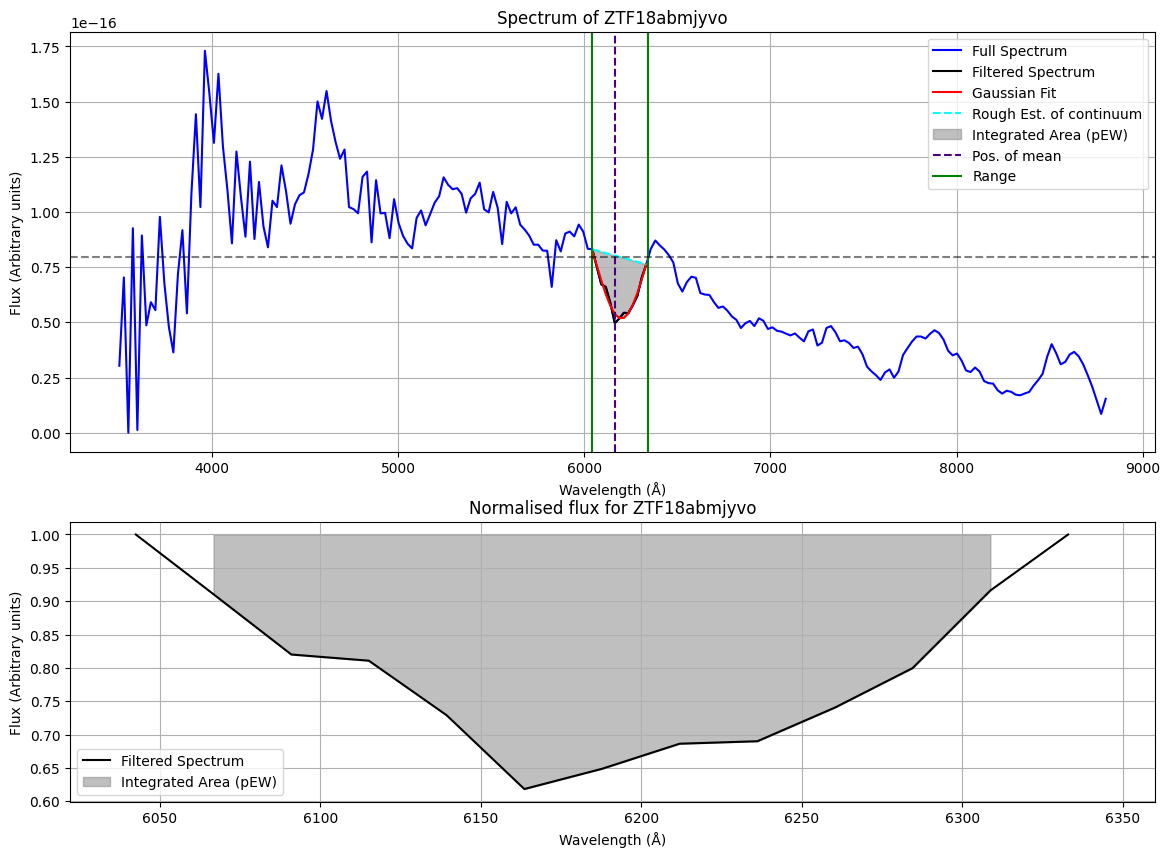

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF18abmjyvo", -0.2e-16,   6166,       290,      .5e-16,     6042, 6340,   6355,   5000, 7500, 0, 1.2e-16, 1e16)

For ZTF19abpbqor :
Initial parameters [-6e-17, 6080, 160, 1.25e-16] [-0.6, 6080, 160, 0.95]
Jericho 0.4978657842591885
Calcutta 158.40000000000003
Initial Guesses = [-6e-17, 6080, 160, 1.25e-16]
Calculated parameters = [-1.17088947e-16  6.07336960e+03 -1.05498535e+02  1.73557468e-16]
Uncertainty = 0.002142022221269819
Signal-to-noise ratio = 4.668485649075979
Velocity: -13253.337360635413 +/- 986.260247324529 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 197.678 +/- 42.07725340078204 Angstroms


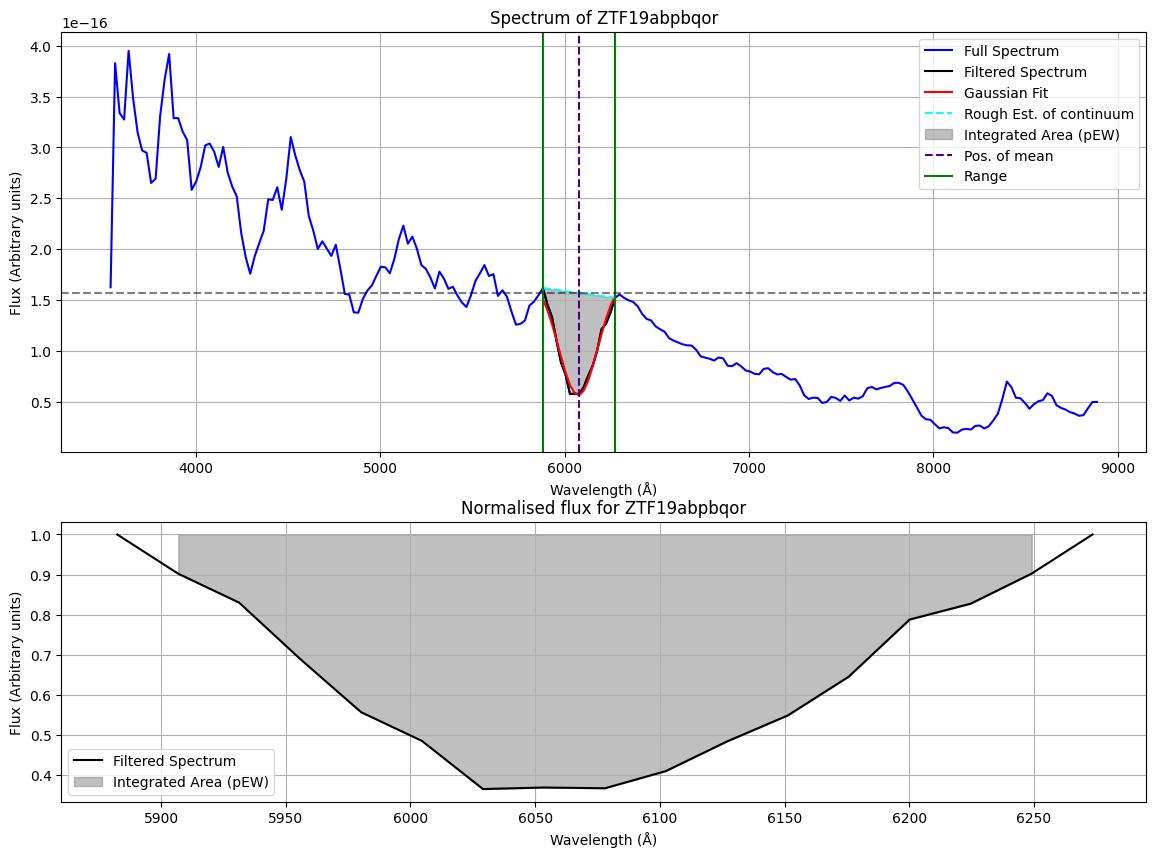

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF19abpbqor", -.6e-16,   6080,       160,      1.25e-16,     5880, 6275,   6355,   5000, 7500, 0, 2e-16, 1e16)

No Flux Error Provided
For ZTF20ackitai :
Initial parameters [-4.5e-17, 6105, 260, 1e-16] [-0.44999999999999996, 6105, 260, 0.95]
Jericho 0.5180392424796921
Calcutta 73.83633867916065
Initial Guesses = [-4.5e-17, 6105, 260, 1e-16]
Calculated parameters = [-4.53013765e-17  6.11029214e+03  1.07929080e+02  7.87042217e-17]
Uncertainty = 0.001635483972443643
Signal-to-noise ratio = 6.1143980427142886
Velocity: -12025.353868966171 +/- 982.3867933353931 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 95.879 +/- 16.48624260458679 Angstroms


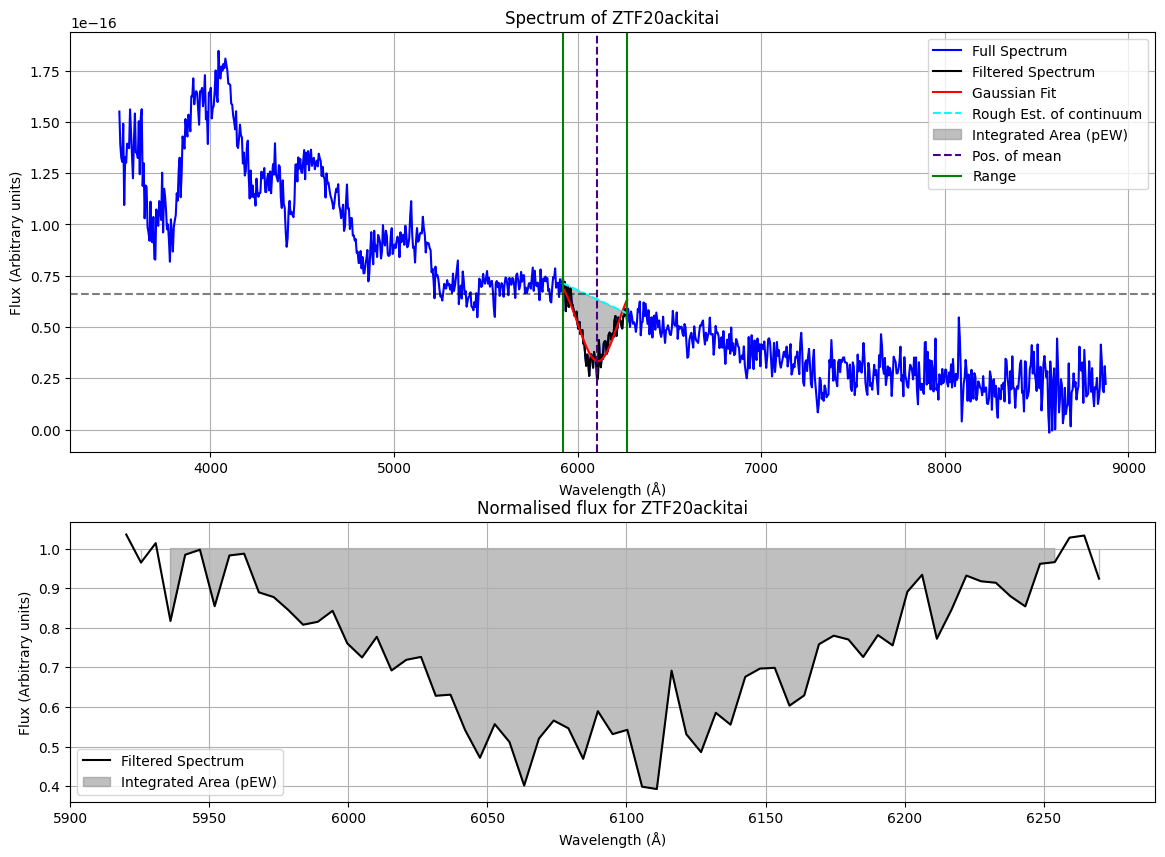

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF20ackitai", -.45e-16,   6105,       260,      1e-16,     5920, 6270,   6355,   5000, 7000, -.5e-16, 2e-16, 1e16)

No Flux Error Provided
For ZTF19abkeuto :
Initial parameters [-1e-17, 6080, 200, 5e-17] [-0.1, 6080, 200, 0.95]
Jericho 1060.0483953593305
Calcutta 6589.477394338906
Initial Guesses = [-1e-17, 6080, 200, 5e-17]
Calculated parameters = [-3.45155612e-14  6.08947868e+03  6.25509142e+03  3.45396156e-14]
Uncertainty = 0.002392834323965126
Signal-to-noise ratio = 4.1791443309911935
Velocity: -13253.337360635413 +/- 986.260247324529 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 17509211.937 +/- 72.38389742991026 Angstroms


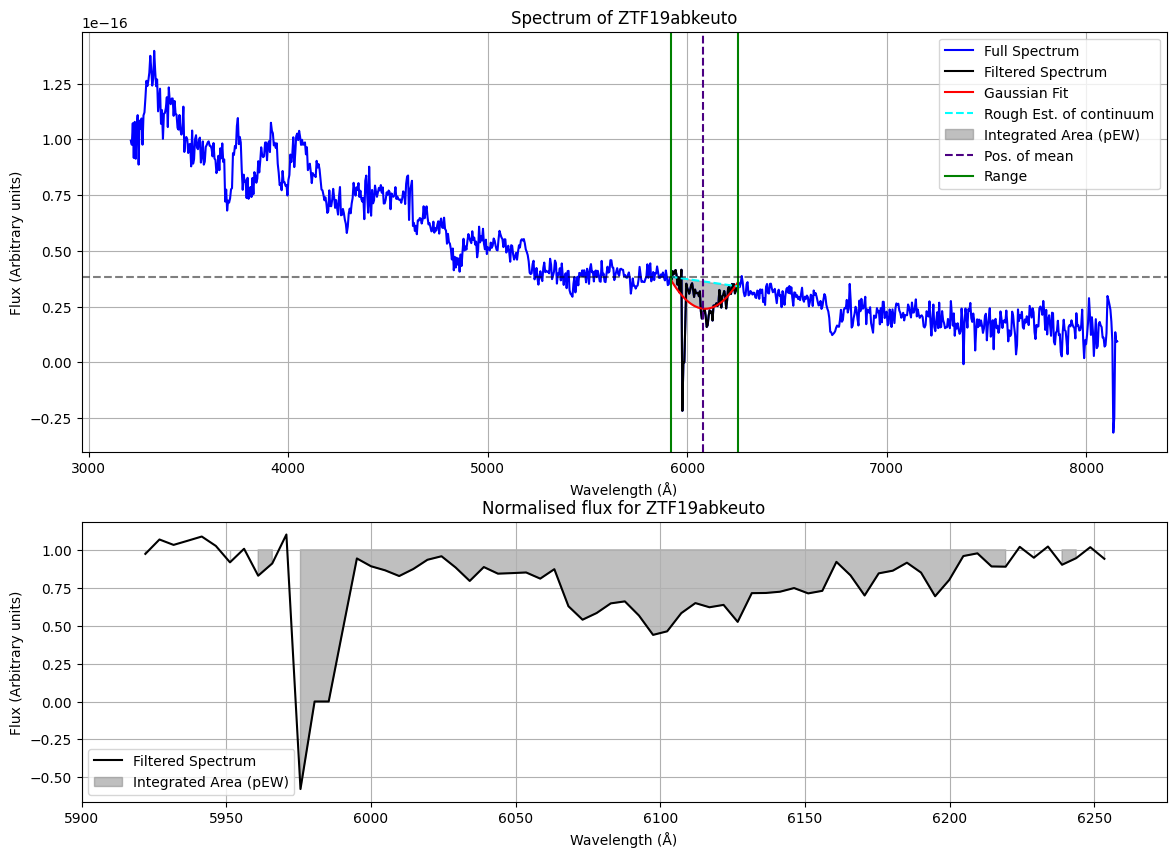

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF19abkeuto", -.1e-16,   6080,       200,      .5e-16,     5920, 6255,   6355,   5000, 7000, -.5e-16, 2e-16, 1e16)

No Flux Error Provided
For ZTF18aayiahw :
Initial parameters [-1e-16, 6112, 300, 1e-17] [-1.0, 6112, 300, 0.95]
Jericho 2.903468304185182
Calcutta 241.06946572429186
Initial Guesses = [-1e-16, 6112, 300, 1e-17]
Calculated parameters = [-6.89418887e-16  6.10745770e+03 -2.51612242e+02  7.65345947e-16]
Uncertainty = 0.0022143500318546777
Signal-to-noise ratio = 4.515997857675771
Velocity: -11682.34555580865 +/- 981.3014113479835 km/s
Pseudo-equivalent width (pEW) via Gaussian params = 1754.483 +/- 36.222868696887936 Angstroms


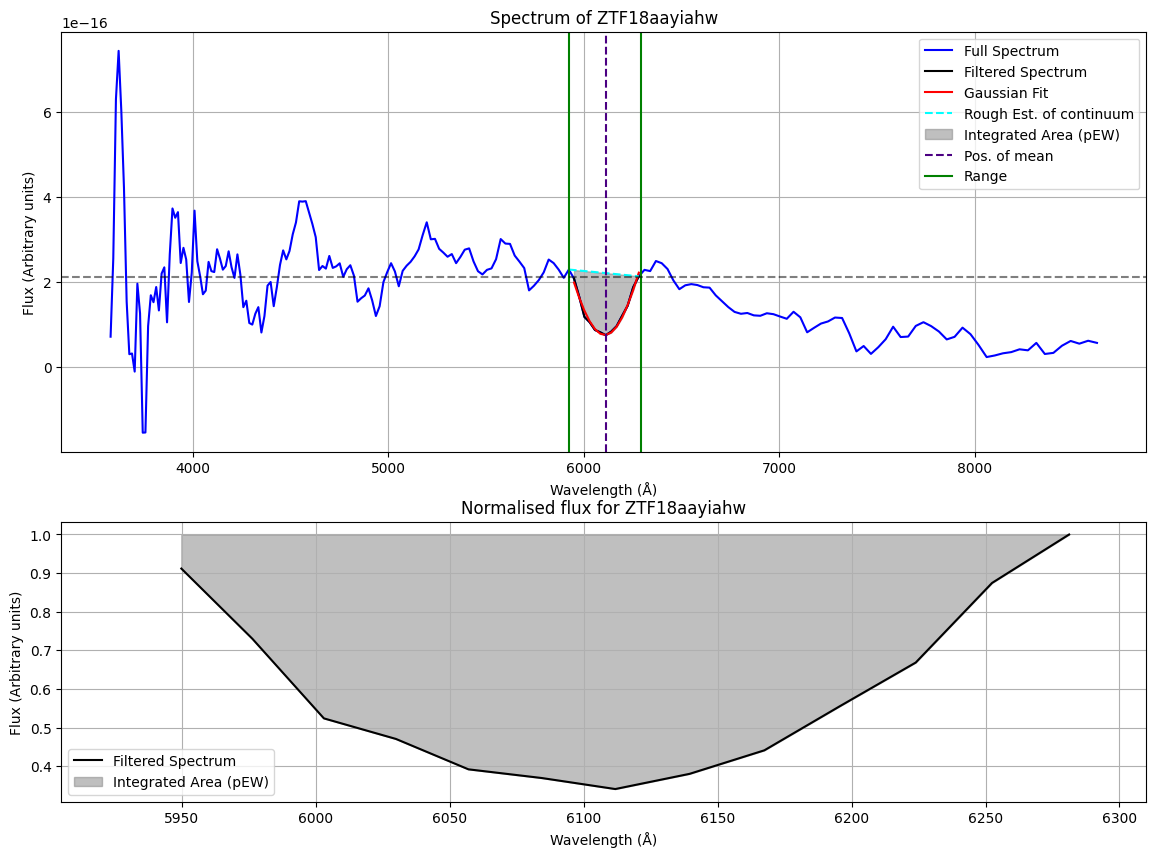

In [ ]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpew("ZTF18aayiahw", -1e-16,   6112,       300,      1e-17,     5925, 6290,   6355,   5000, 7000, -.5e-16, 5e-16, 1e16)

# C6 - Finding pEW of C II

In [199]:
uncs = []
gfit_unc = 0.01
sigs = []
pEWs1 = []

def gaussplotpewc(supernova_id, a, b, c, h, min_val, max_val, spec_l, x1, x2, y1, y2, scal):
  filename = next((file for file in specific_files_s if supernova_id in file), None)

  file_pathh = 'dr2/tables'

  file_name = 'ztfdr2_salt2_params.csv'

  fullpath = os.path.join(file_pathh, file_name)

  do = pd.read_csv(fullpath)

  ra = coordinates[supernova_id]['RA']
  dec = coordinates[supernova_id]['DEC']

  coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')

  table = IrsaDust.get_query_table(coord, section='ebv')

  if 'ext SFD min' in table.colnames:
    ebv = table['ext SFD min'][0]
  else:
    raise ValueError("E(B-V) column not found in the table.")

  rv = 3.1 # This is constant for milky way

  av = ebv * rv

  file_path = os.path.join(directory_path, filename.strip())

  try:
    df = pd.read_csv(file_path, sep='\s+', header=None, comment='#')
    wave = df[0]
    flux = df[1]
    if df.shape[1] > 2:
      flux_err = df[2]
    else:
      flux_err = None
      print('No Flux Error Provided')
  except Exception as e:
    print(f"Failed to read {file_path}: {e}")
    raise

  row = do.loc[do['ztfname'] == supernova_id]
  if not row.empty:
    z = row['z'].iloc[0]
    err = row['z_err'].iloc[0]

  else:
    print(f"No redshift data found for {supernova_id}")

  wave = wave / (1 + z)
  wave_err = wave * err

  if filename in ('ZTF19abkeuto_20190809_NTT_0.ascii', 'ZTF20ackitai_20201023_NTT_0.ascii'):
    #plt.figure(figsize = (8, 6))
    #plt.xlabel('Wavelength (Å)')
    #plt.ylabel('Flux (Arbitrary units)')
    #plt.plot(wave, flux, 'b', label='Un-smoothed spectrum', color = 'grey', alpha = 1)
    window_length = 21
    polyorder = 3
    flux = savgol_filter(flux, window_length, polyorder)
    print('Smoothing applied')

  filtered_wave = (wave >= min_val) & (wave <= max_val)

  filtered_wave_l = (wave >= min_val) & (wave <= b)
  filtered_wave_r = (wave >= b) & (wave <= max_val)

  filtered_wave_contl = (wave >= min_val - 10) & (wave <= min_val + 10)
  filtered_wave_contr = (wave >= max_val - 10) & (wave <= max_val + 10)

  wave_fil_contl = wave[filtered_wave_contl]
  flux_fil_contl = flux[filtered_wave_contl]

  wave_fil_contr = wave[filtered_wave_contr]
  flux_fil_contr = flux[filtered_wave_contr]

  total_continuum_mask = filtered_wave_contl | filtered_wave_contr

  wave_fil_cont = wave[total_continuum_mask]
  flux_fil_cont = flux[total_continuum_mask]

  if flux_err is not None:
    flux_err_fil_cont = flux_err[total_continuum_mask]
    weights = 1 / flux_err_fil_cont
    coefficients = np.polyfit(wave_fil_cont, flux_fil_cont, 1, w=weights)
    p = np.poly1d(coefficients)

  else:
    coefficients = np.polyfit(wave_fil_cont, flux_fil_cont, 1)
    p = np.poly1d(coefficients)

    flux_err_fil_cont = None

  x_cont_fit = np.linspace(min(wave_fil_cont), max(wave_fil_cont), 500)
  y_cont_fit = p(x_cont_fit)

  wave_fil = wave[filtered_wave]

  flux_fil = flux[filtered_wave]

  flux_fil_l = flux[filtered_wave_l]
  flux_fil_r = flux[filtered_wave_r]
  index_l_flux = np.min(flux_fil_l)
  index_r_flux = np.min(flux_fil_r)

  flux_inds = (index_l_flux, index_r_flux)

  avg_flux_index = np.mean(flux_inds)

  def Gau1(wave, a, b, c, h):
      return (a * np.exp(-(wave - b)**2 / (2 * c**2))) + h

  al = a * scal

  p0 = [a, b, c, h]
  p1 = [al, b, c, 0.95]
  print('For', supernova_id, ':')
  print('Initial parameters', p1)

  if flux_err is not None:
    flux_err_fil = flux_err[filtered_wave]
    try:
        params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, sigma=flux_err_fil, absolute_sigma=True, maxfev=100000)
    except Exception as e:
        print(f"Curve fit error with flux_err: {e}")
  else:
    try:
        params1, cov_matrix1 = curve_fit(Gau1, wave_fil, flux_fil, p0=p0, maxfev=100000)
    except Exception as e:
        print(f"Curve fit error without flux_err: {e}")

  fity2 = Gau1(wave_fil, params1[0], params1[1], params1[2], params1[3])

  contin = p(wave_fil)
  flux_normalised = flux_fil / contin

  min_amplitude, max_amplitude = -np.inf, np.inf
  min_center, max_center = -np.inf, np.inf
  min_offset, max_offset = 0, 1

  min_width, max_width = c - c/100, c + c/100

  bounds = ([min_amplitude, min_center, min_width, min_offset], [max_amplitude, max_center, max_width, max_offset])

  if flux_err is not None:
    flux_err_fil = flux_err[filtered_wave]
    try:
        params2, cov_matrix2 = curve_fit(Gau1, wave_fil, flux_normalised, p0=p1, sigma=flux_err_fil, absolute_sigma=True, maxfev=1000000, bounds = bounds)
    except Exception as e:
        print(f"Curve fit error with flux_err: {e}")
  else:
    try:
        params2, cov_matrix2 = curve_fit(Gau1, wave_fil, flux_normalised, p0=p1, maxfev=1000000)
    except Exception as e:
        print(f"Curve fit error without flux_err: {e}")

  print('P2', params2)

  fity3 = Gau1(wave_fil, params2[0], params2[1], params2[2], params2[3])

  pew1 = np.trapz(flux_normalised, wave_fil)

  pew1 = pew1/10

  jericho = params2[0]

  jericho = np.abs(jericho)

  jericho = jericho

  print('Jericho', jericho)

  calcutta = params2[2]

  print ('Calcutta', calcutta)

  pew2 = abs(jericho) * abs(calcutta) * (np.sqrt(2 * np.pi))

  n_sim = 10000
  coeff_sample = np.zeros((n_sim, 2))
  if flux_err_fil_cont is not None:
    for i in range(n_sim):
      simulated_flux = np.random.normal(flux_fil_cont, flux_err_fil_cont)

      if flux_err is not None:
          weights = 1 / np.where(flux_err_fil_cont > 0, flux_err_fil_cont, np.inf)
          coeff_sample[i, :] = np.polyfit(wave_fil_cont, simulated_flux, 1, w=weights)
      else:
          coeff_sample[i, :] = np.polyfit(wave_fil_cont, simulated_flux, 1)
  else:
    ooo = 1 + 1

  coeff_std = np.std(coeff_sample, axis=0)

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 2]})

  ax1.plot(wave, flux, 'b', label='Full Spectrum')
  ax1.plot(wave_fil, flux_fil, 'k', label='Filtered Spectrum')
  ax1.plot(wave_fil, Gau1(wave_fil, *params1), 'r', label='Gaussian Fit')
  ax1.plot(x_cont_fit, y_cont_fit, '--', label='Rough Est. of continuum', color = 'cyan')
  ax1.fill_between(wave_fil, fity2, contin, color='gray', alpha=0.5, label='Integrated Area (pEW)')
  ax1.axvline(x = b, color = 'indigo', label = 'Pos. of mean', linestyle = '--')
  ax1.axvline(x = min_val, color = 'green')
  ax1.axvline(x = max_val, color = 'green', label = 'Range')
  ax1.axhline(y = avg_flux_index, color = 'grey', linestyle = '--', alpha = 0.4)
  ax1.axvline(x = b, color = 'black', linestyle = '--', alpha = 0.8)
  ax1.set_xlim(x1, x2)
  ax1.set_ylim(y1, y2)

  ax1.set_title(f'Spectrum of {supernova_id}')
  ax1.set_ylabel('Flux (Arbitrary units)')
  ax1.set_xlabel('Wavelength (Å)')
  ax1.grid(True)
  ax1.legend()

  ax2.plot(wave_fil, flux_normalised,  'k', label='Normalised Absorption Feature')
  ax2.set_title(f'Normalised flux for {supernova_id}')
  ax2.set_ylabel('Flux (Arbitrary units)')
  ax2.set_xlabel('Wavelength (Å)')
  ax2.set_xlim(min_val - 20, max_val + 20)
  #ax2.set_ylim(0.9, 1)
  ax2.legend()
  ax2.grid(True)

  signoise = np.max(flux_fil) / np.std(flux_fil)
  unc = gfit_unc / signoise

  B1 = (b - spec_l)/spec_l
  sc = 299792458
  vel = (((B1+1)**2 - 1)*sc)/(1+(1+B1)**2)

  b_fit_uncertainty = 20
  sigB1 = b_fit_uncertainty / spec_l
  h9 = B1 / 10
  B1_h = B1 + h9
  vel_plus_h = (((B1_h+1)**2 - 1)*sc)/(1+(1+B1_h)**2)
  deriv_vel_B1 = (vel_plus_h - vel) / h9
  sig_vel = np.abs(deriv_vel_B1) * sigB1

  noisy_flux = (flux_normalised + np.random.normal(0, 0.05, size=wave_fil.size))

  noisy_flux = noisy_flux

  error_level = 0.05 * np.abs(flux_normalised)
  num_simulations = 10
  pews = []

  lower_bounds = [0.0, 6300, 20, 0.94]
  upper_bounds = [0.08, 6600, 45, 0.95]

  bounds = (lower_bounds, upper_bounds)

  def calculate_pEW(o, p):
    return o * p
  for i in range(num_simulations):
    simulation_flux = noisy_flux + np.random.normal(0, error_level)
    try:
        popt, pcov = curve_fit(Gau1, wave_fil, simulation_flux, p0=p1, bounds = bounds, maxfev=10000)
        jericho = abs(popt[0])
        calcutta = abs(popt[2]) * np.sqrt(2 * np.pi)
        pEW = calculate_pEW(jericho, calcutta)
        pews.append(pEW)
    except Exception as e:
        print(f"Failed to fit: {e}")

  pEW_std = np.std(pews)

  print('Initial Guesses =', p0)
  print('Params for total fit:', params1)
  print('Params for nomralised fit:', params2[0], params2[1], params2[2], params2[3])
  print('Redshift =', z, '+/-', err)
  print('Signal-to-noise ratio =', signoise)
  print('Uncertainty of fit =', unc)
  print('Velocity:', vel * 0.001, '+/-', sig_vel * 0.001,  'km/s')
  if np.abs(pew1 - pew2) > 10:
    print(f"Pseudo-equivalent width (pEW) via trapezoidal rule = {pew1:.3f} +/-", pEW_std, "Angstroms")
    print(f"Pseudo-equivalent width (pEW) via Gaussian fit parameters = {pew2} +/-", pEW_std, "Angstroms")
    print('Difference between methods:', np.abs(pew1 - pew2))

    print('WARNING: Instability in fit parameters')

  else:
    print(f"Pseudo-equivalent width (pEW) via trapezoidal rule = {pew1:.3f} +/-", pEW_std, "Angstroms")
    print(f"Pseudo-equivalent width (pEW) via Gaussian fit parameters = {pew2} +/-", pEW_std, "Angstroms")
    print('Difference between methods:', np.abs(pew1 - pew2))

  plt.show()

# C6R1 - pEW for the 7231 Carbon feature

For ZTF18abhpgje :
Initial parameters [-0.05, 6930, 18, 0.95]
P2 [-1.73947816e-01  6.92592348e+03  1.78200000e+01  1.00000000e+00]
Jericho 0.17394781620632924
Calcutta 17.820000007690563
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [-5e-18, 6930, 18, 3e-17]
Params for total fit: [-5.30486675e-18  6.92683700e+03  1.83784695e+01  2.93043948e-17]
Params for nomralised fit: -0.17394781620632924 6925.923475872371 17.820000007690563 0.9999999999983766
Redshift = 0.13501953 +/- 0.0
Signal-to-noise ratio = 15.65642748650946
Uncertainty of fit = 0.0006387153141172605
Velocity: -12738.758428734232 +/- 865.3552277854016 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 8.

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


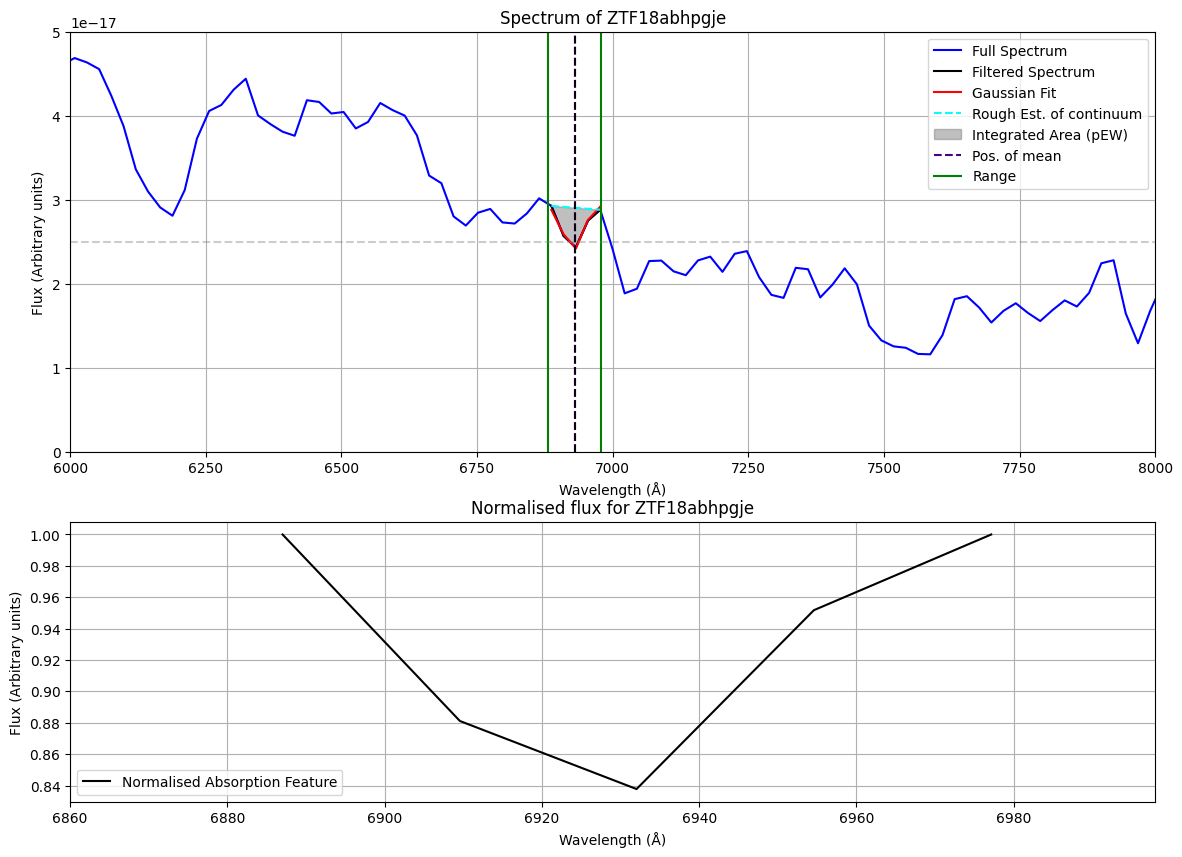

In [200]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2     scal
gaussplotpewc("ZTF18abhpgje", -0.5e-17,   6930,       18,      .3e-16,      6880, 6978,   7231,   6000, 8000, 0,    .5e-16,       1e16)

For ZTF20adadmsg :
Initial parameters [1.0, 7113, 56, 0.95]
P2 [-9.14481739e-02  7.12036949e+03  5.54400000e+01  1.00000000e+00]
Jericho 0.09144817388722835
Calcutta 55.440000000000005
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [1e-17, 7113, 56, 5e-17]
Params for total fit: [-9.47506191e-18  7.11917614e+03  2.53691640e+01  5.15662195e-17]
Params for nomralised fit: -0.09144817388722835 7120.369492322694 55.440000000000005 0.9999999999999999
Redshift = 0.07100536 +/- 0.0
Signal-to-noise ratio = 15.217906130357719
Uncertainty of fit = 0.0006571206258166698
Velocity: -4932.11324523643 +/- 843.3901960582804 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 13.206

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


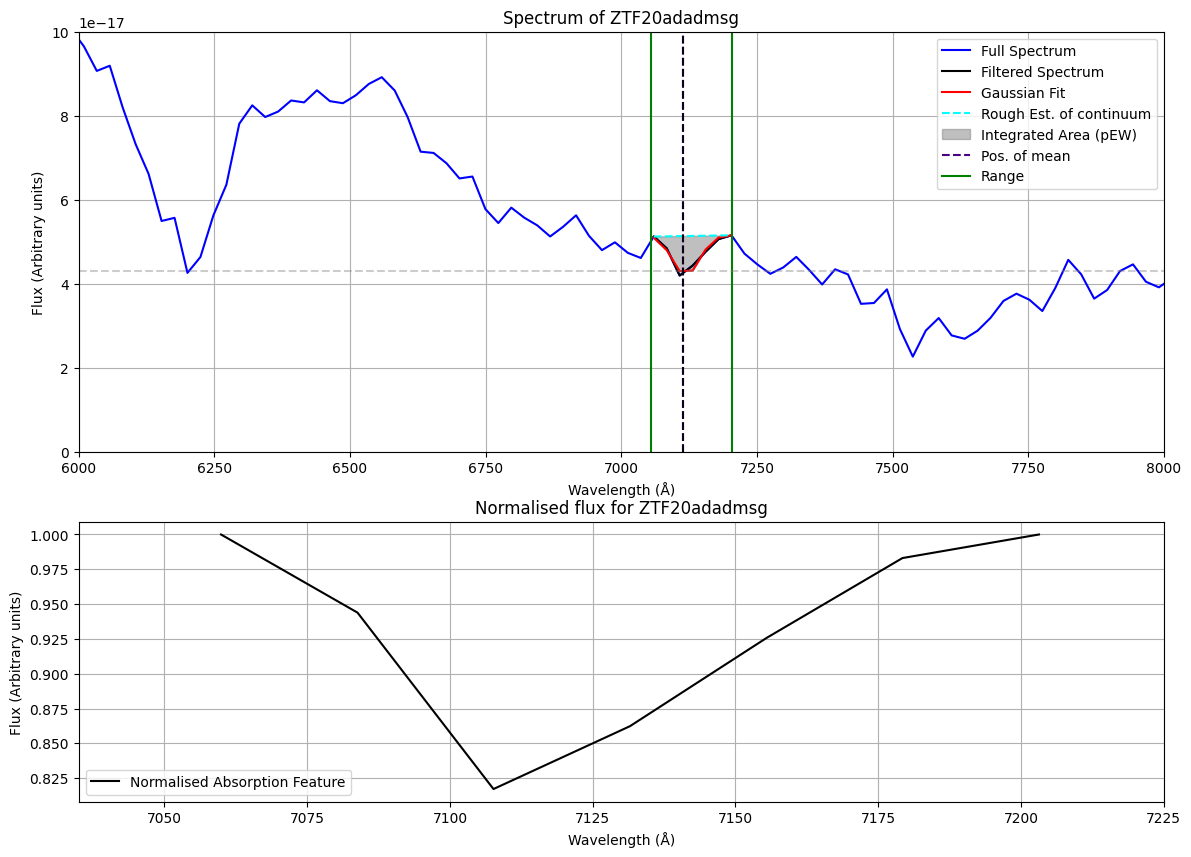

In [201]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF20adadmsg", 1e-17,   7113,       56,      .5e-16,     7055, 7205,   7231,   6000, 8000, .0e-16, 1e-16, 1e17)

For ZTF18abmjyvo :
Initial parameters [0.3, 7180, 51, 0.95]
P2 [-5.05801252e-02  7.19167470e+03  5.04900000e+01  1.00000000e+00]
Jericho 0.05058012523004761
Calcutta 50.49000000000001
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [3e-18, 7180, 51, 2e-17]
Params for total fit: [1.20900702e-16 7.11221212e+03 6.65522553e+00 4.31415840e-17]
Params for nomralised fit: -0.05058012523004761 7191.674702179789 50.49000000000001 0.9999999999999999
Redshift = 0.05666686 +/- 0.0
Signal-to-noise ratio = 26.151207011256496
Uncertainty of fit = 0.00038239152769107795
Velocity: -2121.882433109014 +/- 835.3270149772347 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 6.915 +/- 

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


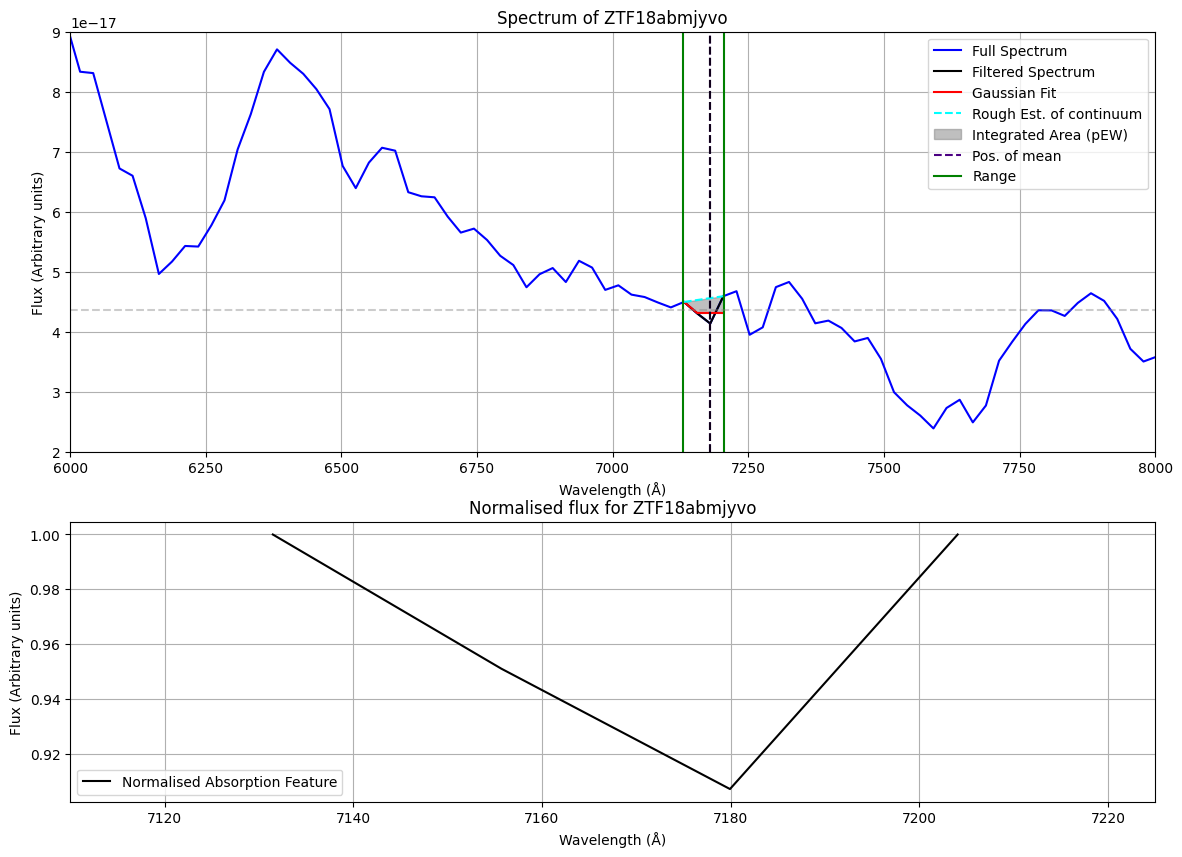

In [202]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF18abmjyvo", 0.3e-17,   7180,       51,      .2e-16,     7130, 7205,   7231,   6000, 8000, .2e-16, .9e-16, 1e17)

For ZTF19abpbqor :
Initial parameters [0.26, 7043, 50, 0.95]
P2 [-3.73110066e-02  7.04110622e+03  4.95000000e+01  1.00000000e+00]
Jericho 0.03731100659028612
Calcutta 49.50000000000001
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [2.6e-18, 7043, 50, 7.8e-17]
Params for total fit: [4.94850913e-18 7.08207240e+03 2.76772665e+00 7.86260135e-17]
Params for nomralised fit: -0.03731100659028612 7041.106220428054 49.50000000000001 0.9999999999999999
Redshift = 0.04630013 +/- 0.0
Signal-to-noise ratio = 40.84734579457424
Uncertainty of fit = 0.0002448139482621733
Velocity: -7895.643388202932 +/- 851.8052979066076 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 9.459 +

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


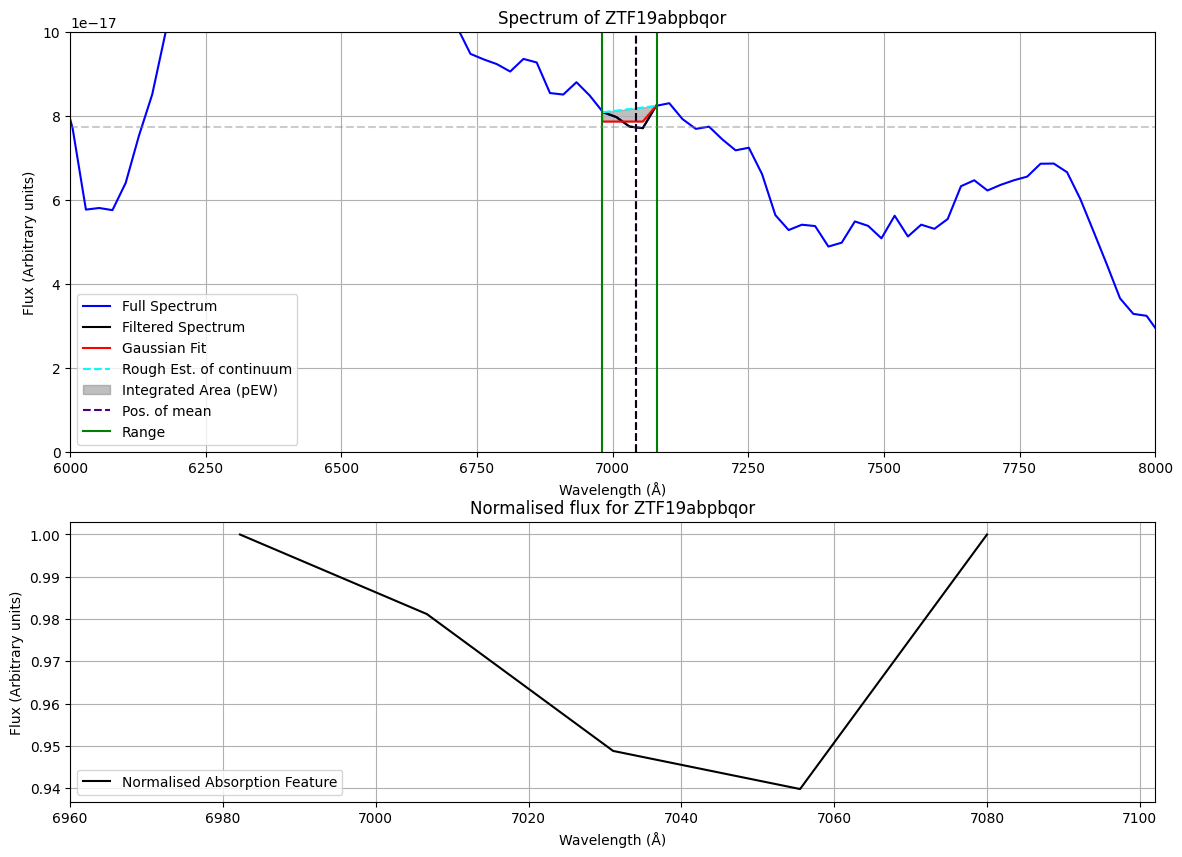

In [203]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF19abpbqor", .26e-17,   7043,       50,      7.8e-17,     6980, 7082,   7231,   6000, 8000, .0e-16, 1e-16, 1e17)

No Flux Error Provided
Smoothing applied
For ZTF20ackitai :
Initial parameters [20.0, 7095, 11, 0.95]
P2 [-4.92633325e-02  7.08807707e+03  1.14226929e+01  9.97864226e-01]
Jericho 0.04926333251123357
Calcutta 11.422692860958557
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [2e-17, 7095, 11, 4e-17]
Params for total fit: [-2.16226943e-18  7.09018295e+03  1.32841875e+01  3.65121372e-17]
Params for nomralised fit: -0.04926333251123357 7088.0770719200245 11.422692860958557 0.9978642257979679
Redshift = 0.04155541 +/- 0.0
Signal-to-noise ratio = 48.572419874245185
Uncertainty of fit = 0.00020587815113783025
Velocity: -5691.484044365424 +/- 845.5551903476488 km/s
Pseudo-equival

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


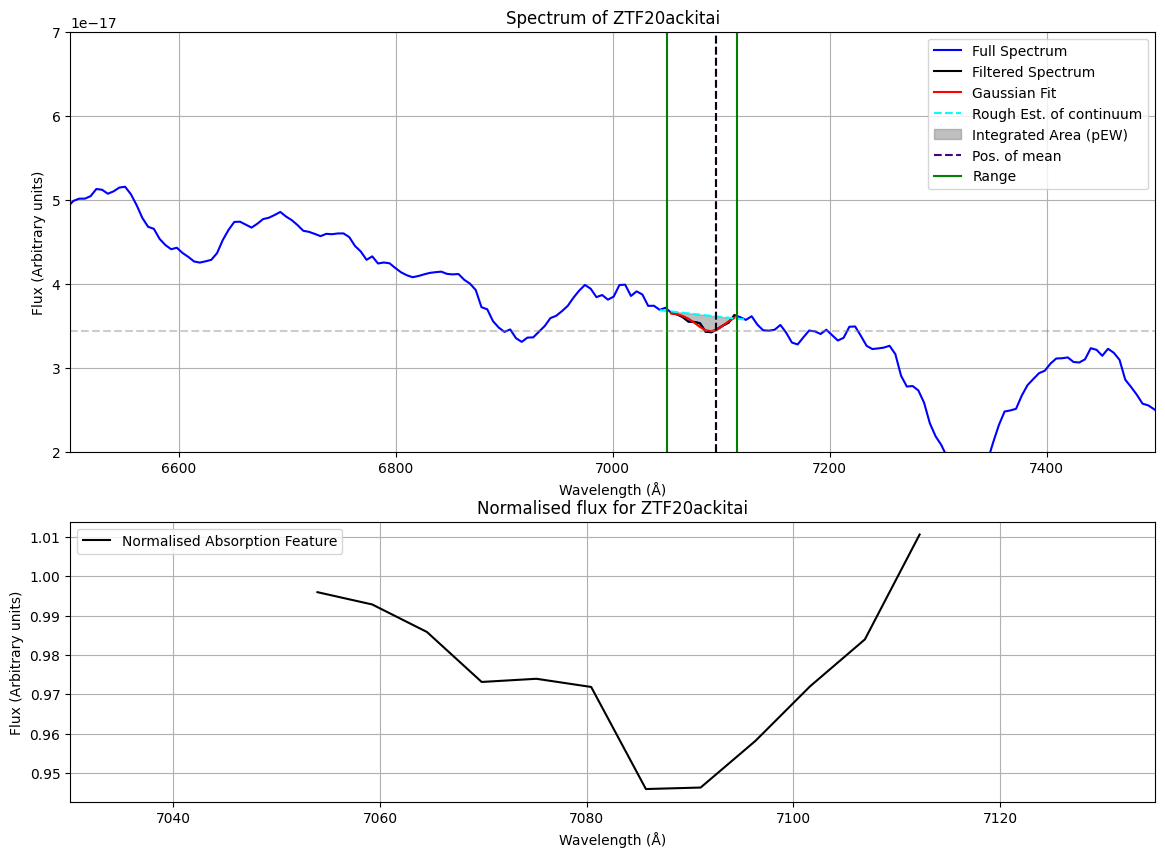

In [204]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF20ackitai", .2e-16,   7095,     11,    .4e-16,         7050, 7115,   7231,   6500, 7500, .2e-16, .7e-16, 1e18)

No Flux Error Provided
Smoothing applied
For ZTF19abkeuto :
Initial parameters [5.1000000000000005, 6935, 45, 0.95]
P2 [-2.22330692e-01  6.93004430e+03  2.50561981e+01  1.05001628e+00]
Jericho 0.2223306921176837
Calcutta 25.05619807338445
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [5.1e-17, 6935, 45, 2e-17]
Params for total fit: [-7.42743981e-18  6.93579113e+03 -3.33760110e+01  2.70020352e-17]
Params for nomralised fit: -0.2223306921176837 6930.044301899983 25.05619807338445 1.0500162845997567
Redshift = 0.13214608 +/- 0.0
Signal-to-noise ratio = 14.943038255047218
Uncertainty of fit = 0.000669207950171871
Velocity: -12522.919773037733 +/- 864.7568597242879 km/s
Pseu

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


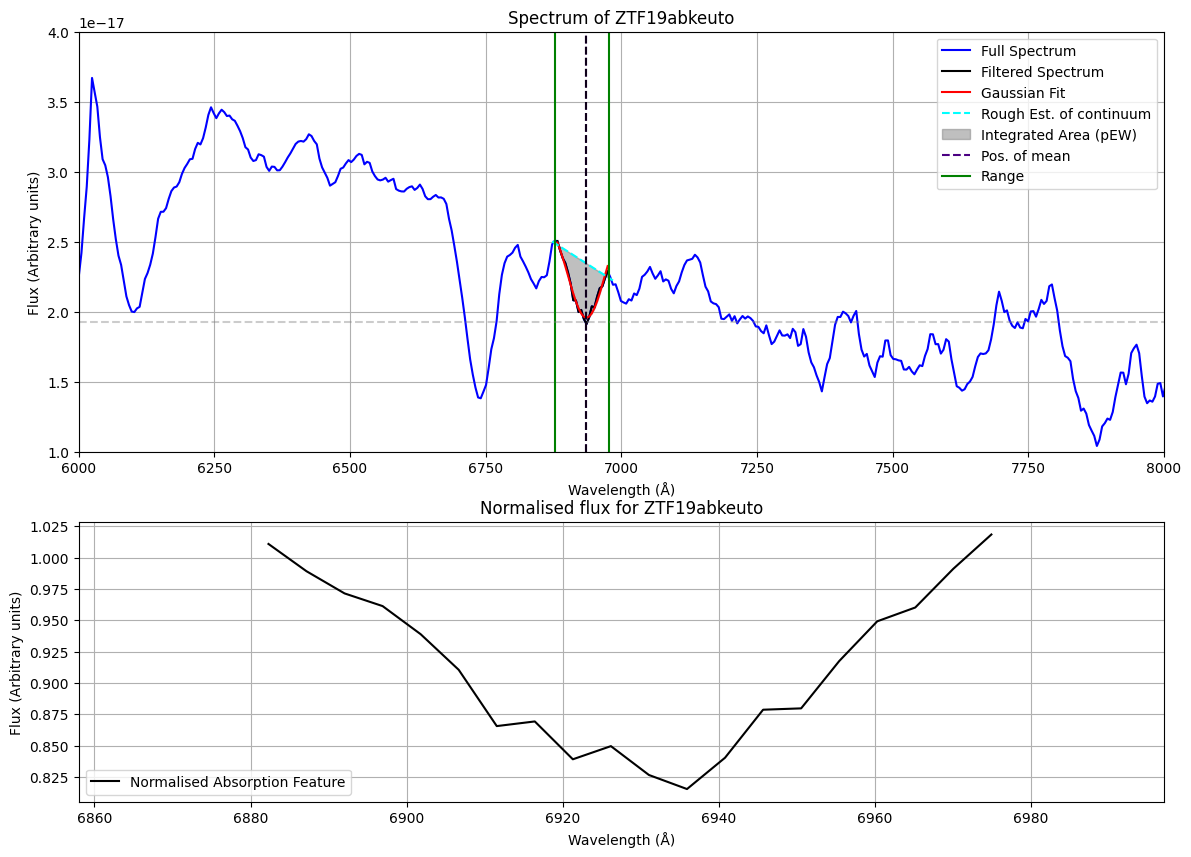

In [205]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF19abkeuto", .51e-16,   6935,       45,      .2e-16,     6878, 6977,   7231,   6000, 8000, .1e-16, .4e-16, 1e17)

No Flux Error Provided
For ZTF18aayiahw :
Initial parameters [0.3, 7040, 30, 0.95]
P2 [-6.34804929e-01  7.02213936e+03  8.47593141e+00  9.82183971e-01]
Jericho 0.6348049292737443
Calcutta 8.47593140606586
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Failed to fit: `x0` is infeasible.
Initial Guesses = [3e-17, 7040, 30, 2e-17]
Params for total fit: [-8.45143631e-17  7.02208337e+03  8.38265089e+00  1.27370000e-16]
Params for nomralised fit: -0.6348049292737443 7022.139364596294 8.47593140606586 0.9821839705399693
Redshift = 0.06371429 +/- 0.0
Signal-to-noise ratio = 22.398780286499317
Uncertainty of fit = 0.00044645288145566656
Velocity: -8023.278608709009 +/- 852.1656508919974 km/s
Pseudo-equivalent width (pEW) via trapez

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


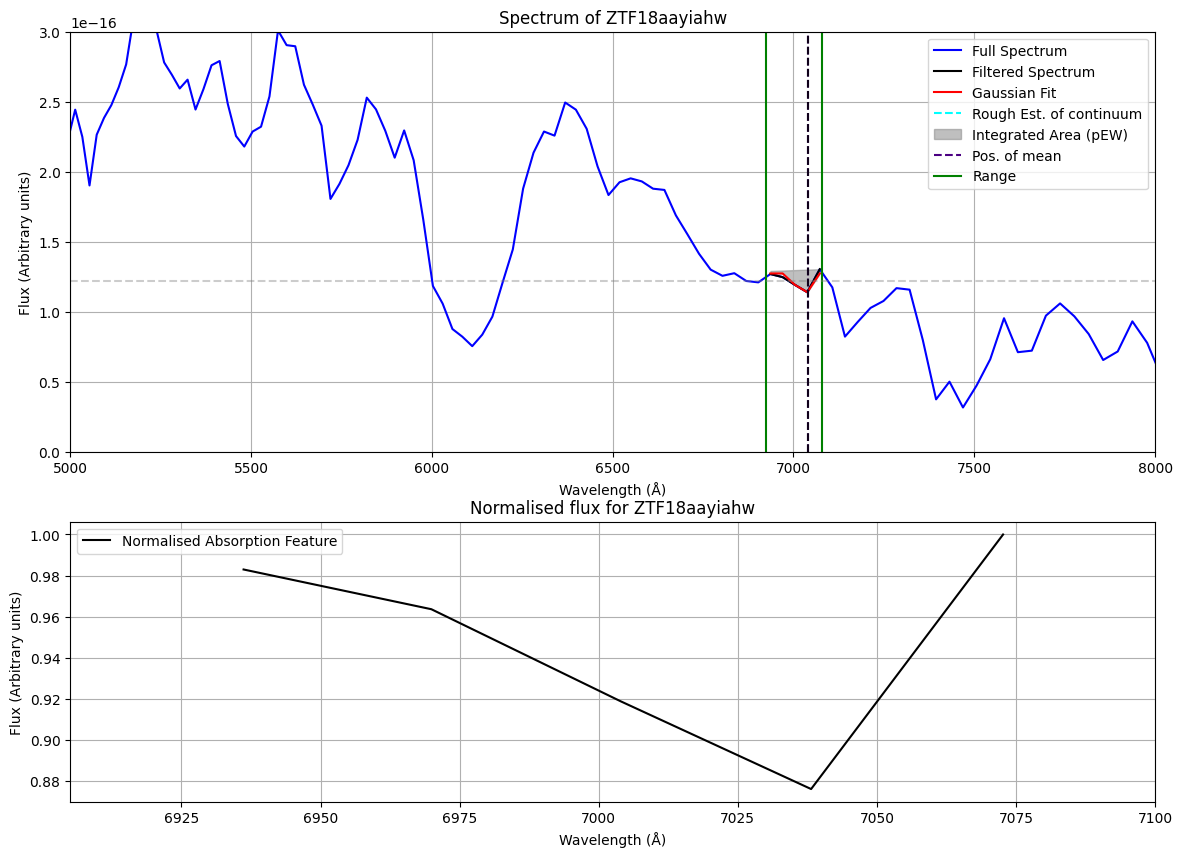

In [206]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2
gaussplotpewc("ZTF18aayiahw", .3e-16,   7040,       30,      .2e-16,     6925, 7080,   7231,   5000, 8000, .0e-16, 3e-16, 1e16)

# C6R2 - pEW for the 6580 Carbon feature

For ZTF18abhpgje :
Initial parameters [0.04, 6388, 34, 0.95]
P2 [-1.22189187e-01  6.38389782e+03  3.36600000e+01  1.00000000e+00]
Jericho 0.12218918662364785
Calcutta 33.660000000000004
Initial Guesses = [4e-18, 6388, 34, 4e-17]
Params for total fit: [-1.55499039e-14  6.38854627e+03  2.21385446e+03  1.55876108e-14]
Params for nomralised fit: -0.12218918662364785 6383.897819061331 33.660000000000004 0.9999999999999999
Redshift = 0.13501953 +/- 0.0
Signal-to-noise ratio = 18.969468563796923
Uncertainty of fit = 0.0005271628968607438
Velocity: -8875.314166244265 +/- 939.114313455027 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 10.341 +/- 1.6291229048652838 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 10.30948140571469 +/- 1.6291229048652838 Angstroms
Difference between methods: 0.03168938563063328


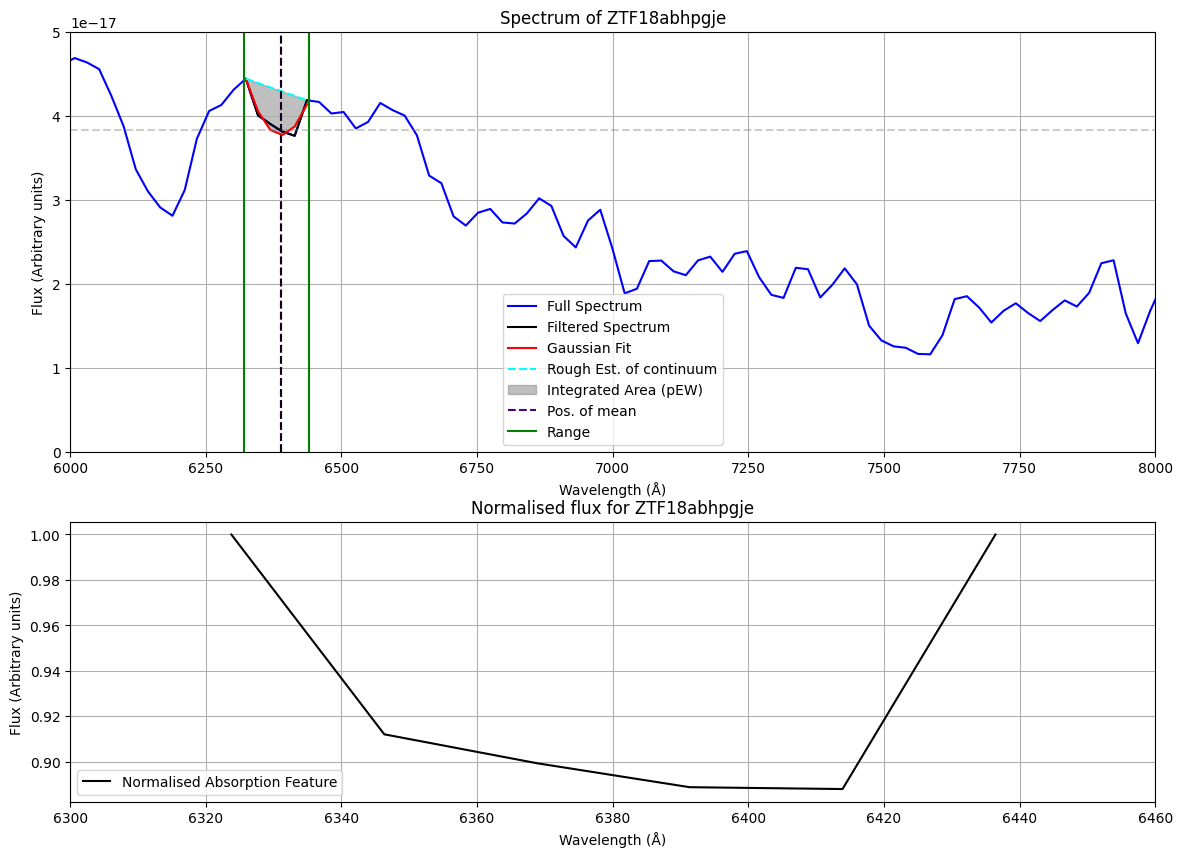

In [207]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2         W
gaussplotpewc("ZTF18abhpgje", 0.4e-17,   6388,       34,      .4e-16,     6320, 6440,   6580,   6000, 8000,    0,    .5e-16, 1e16)

For ZTF20adadmsg :
Initial parameters [0.05, 6480, 40, 0.95]
P2 [-3.98172841e-02  6.48565459e+03  3.96000000e+01  1.00000000e+00]
Jericho 0.03981728410089892
Calcutta 39.60000000000001
Initial Guesses = [5e-18, 6480, 40, 9e-17]
Params for total fit: [-7.11272808e-18  6.47983510e+03  3.70202638e+01  8.99315348e-17]
Params for nomralised fit: -0.03981728410089892 6485.654593560195 39.60000000000001 0.9999999999999999
Redshift = 0.07100536 +/- 0.0
Signal-to-noise ratio = 40.79515103892968
Uncertainty of fit = 0.00024512717186553074
Velocity: -4590.733268782496 +/- 925.7602875926885 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 11.626 +/- 2.1258035119173306 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 3.9523623537946144 +/- 2.1258035119173306 Angstroms
Difference between methods: 7.673440982792151


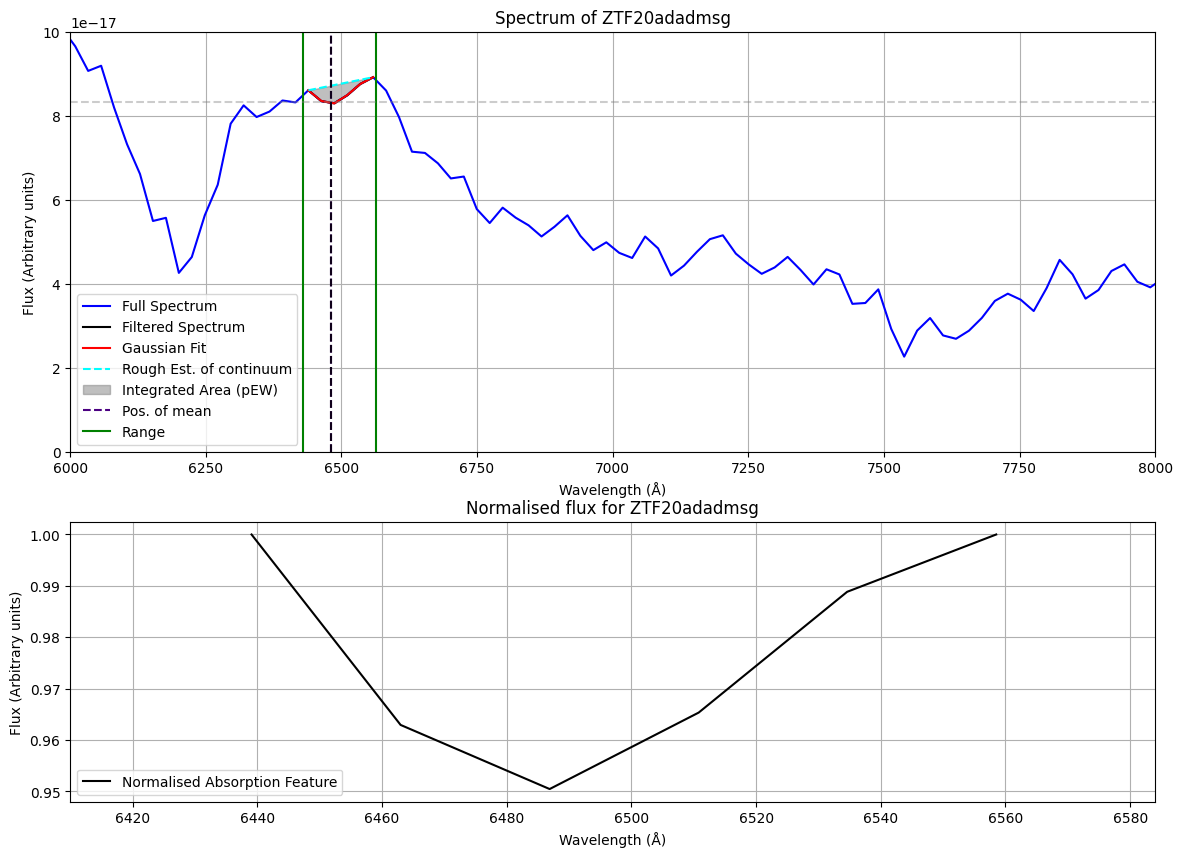

In [208]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2       L
gaussplotpewc("ZTF20adadmsg", .5e-17,   6480,    40,      .9e-16,     6430, 6564,   6580,   6000, 8000, .0e-16, 1e-16, 1e16)

For ZTF18abmjyvo :
Initial parameters [0.015, 6530, 36, 0.95]
P2 [-1.00984590e-01  6.52050526e+03  3.56400000e+01  1.00000000e+00]
Jericho 0.10098458952563977
Calcutta 35.64000000000001
Initial Guesses = [1.5e-17, 6530, 36, 8e-17]
Params for total fit: [-3.85690881e-14  6.53335546e+03  2.25359781e+03  3.86339833e-14]
Params for nomralised fit: -0.10098458952563977 6520.505262608491 35.64000000000001 0.9999999999999999
Redshift = 0.05666686 +/- 0.0
Signal-to-noise ratio = 17.655916626109516
Uncertainty of fit = 0.0005663823754815443
Velocity: -2286.7131759899275 +/- 918.4932065367755 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 8.967 +/- 1.4591951075201612 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 9.021582688784562 +/- 1.4591951075201612 Angstroms
Difference between methods: 0.05471115462375664


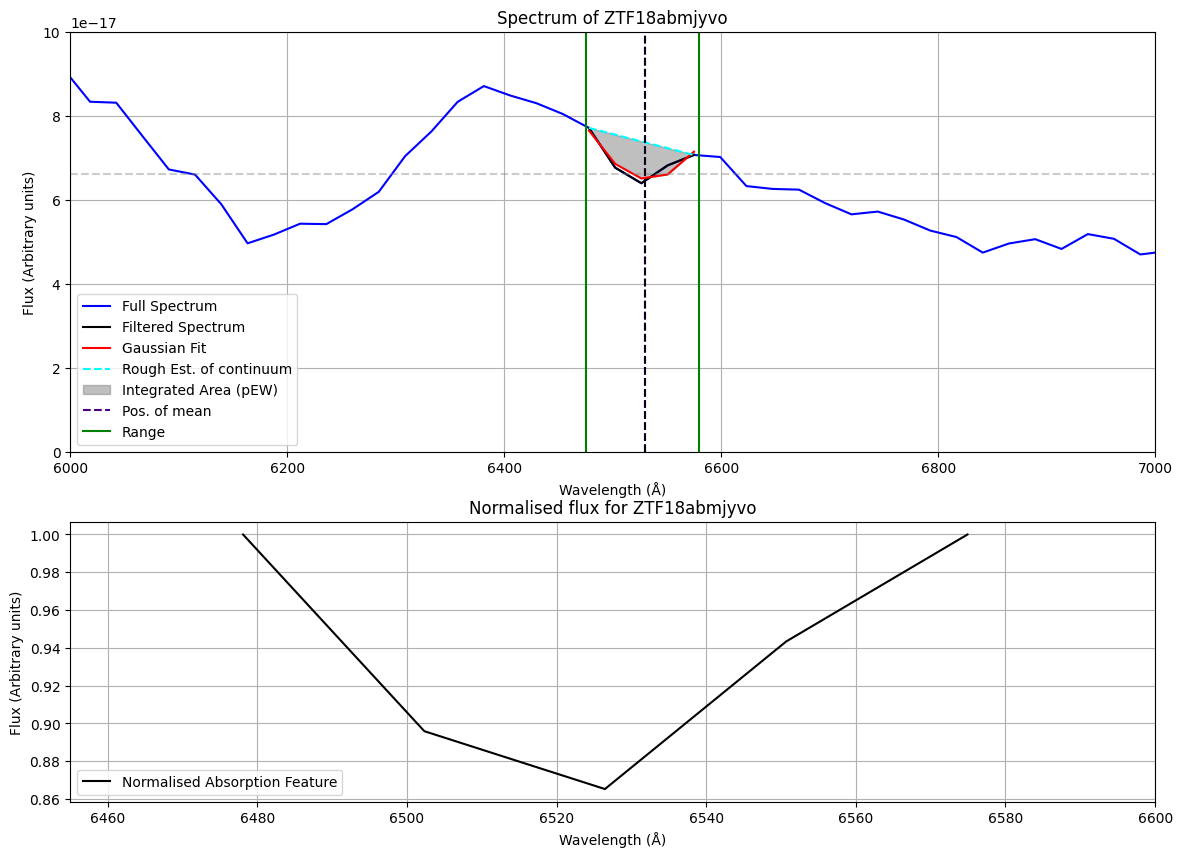

In [209]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2      W
gaussplotpewc("ZTF18abmjyvo", 1.5e-17,   6530,       36,      .8e-16,     6475, 6580,   6580,   6000, 7000, .0e-16, 1e-16, 1e15)

In [210]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2     N/A
#gaussplotpewc("ZTF19abpbqor", .1e-17,   6570,       20,      .6e-16,     6520, 6635,   6580,   6000, 8000, .0e-16, 1.5e-16, 1e17)

No Flux Error Provided
Smoothing applied
For ZTF20ackitai :
Initial parameters [0.052, 6312, 40, 0.95]
P2 [1.63871989e-01 6.23025564e+03 2.13293633e+01 9.69801675e-01]
Jericho 0.163871989328884
Calcutta 21.329363298758103
Initial Guesses = [5.2e-18, 6312, 40, 2e-17]
Params for total fit: [-2.26231074e-18  6.31395848e+03 -1.31237428e+01  5.50559591e-17]
Params for nomralised fit: 0.163871989328884 6230.255643131321 21.329363298758103 0.9698016754452456
Redshift = 0.04155541 +/- 0.0
Signal-to-noise ratio = 63.73684545064202
Uncertainty of fit = 0.00015689511975838254
Velocity: -12458.838560349293 +/- 950.117253095373 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 7.728 +/- 1.3241402871083983 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 8.761380697400318 +/- 1.3241402871083983 Angstroms
Difference between methods: 1.0333423526169732


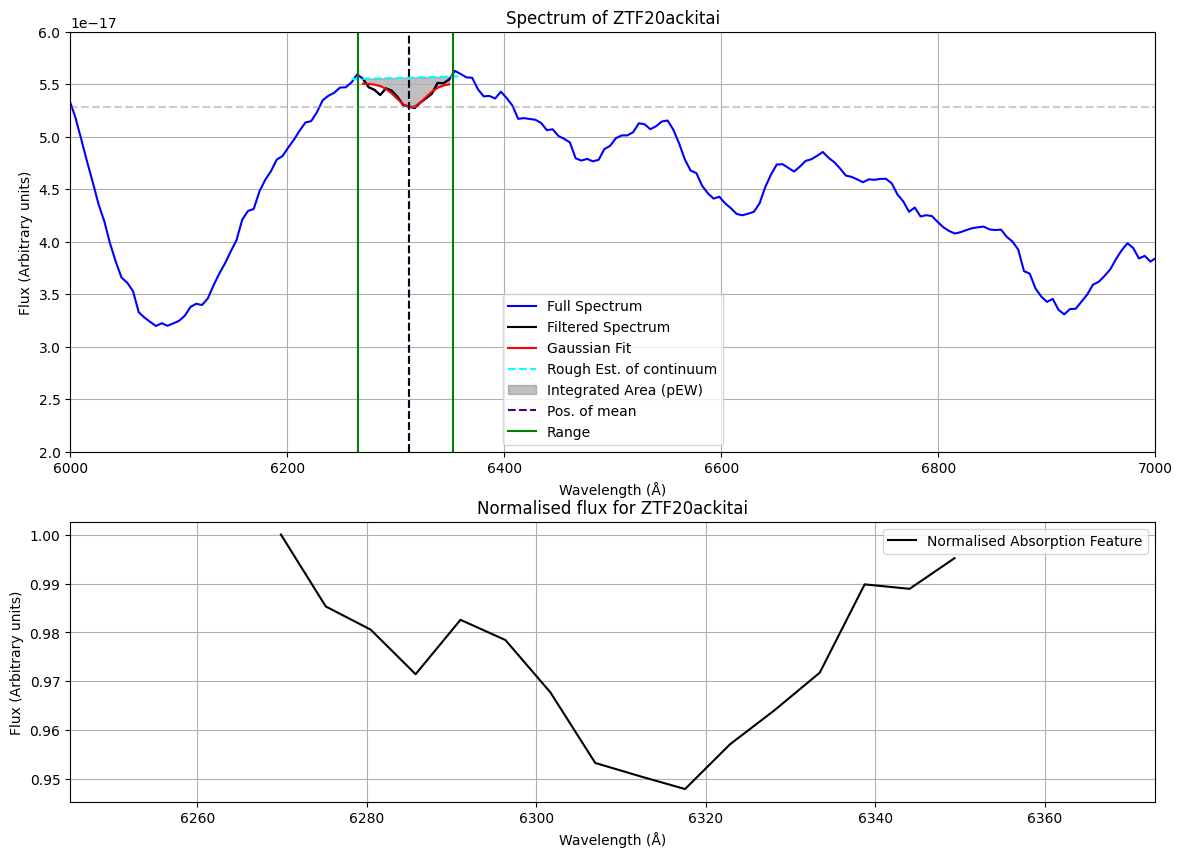

In [211]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2    L
gaussplotpewc("ZTF20ackitai", .52e-17,   6312,       40,         .2e-16,     6265, 6353,   6580,   6000, 7000, .2e-16, 0.6e-16, 1e16)

No Flux Error Provided
Smoothing applied
For ZTF19abkeuto :
Initial parameters [0.05, 6350, 25, 0.95]
P2 [-1.57438121e-01  6.35115187e+03  5.47156698e+01  1.07747098e+00]
Jericho 0.15743812126010429
Calcutta 54.715669756632415
Initial Guesses = [5e-19, 6350, 25, 4e-17]
Params for total fit: [-6.51202834e-18  6.35726014e+03 -6.39876452e+01  3.68311184e-17]
Params for nomralised fit: -0.15743812126010429 6351.151870923192 54.715669756632415 1.0774709834028646
Redshift = 0.13214608 +/- 0.0
Signal-to-noise ratio = 37.752222771940254
Uncertainty of fit = 0.0002648850654545461
Velocity: -10662.096617465664 +/- 944.6198350808966 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 12.033 +/- 0.6469722760296412 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 21.592928784846787 +/- 0.6469722760296412 Angstroms
Difference between methods: 9.559764827404905


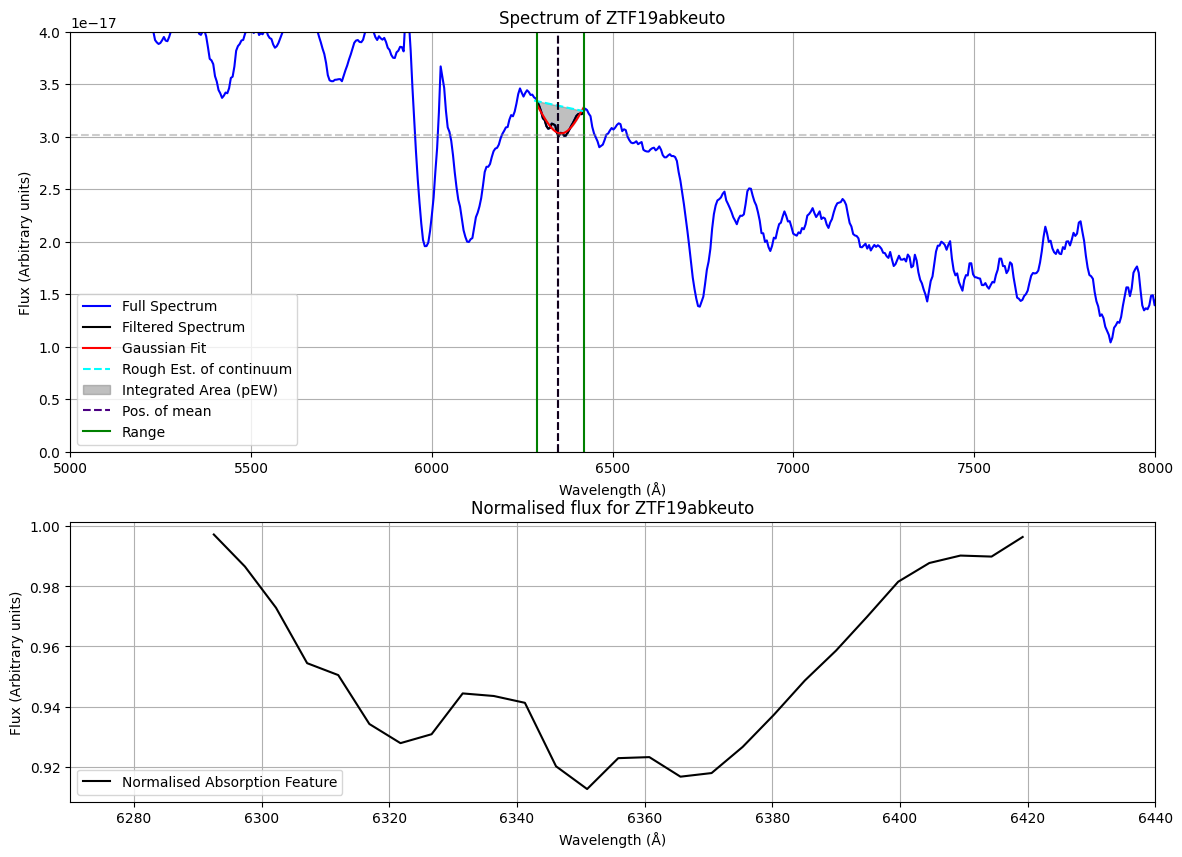

In [212]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2      L
gaussplotpewc("ZTF19abkeuto", .5e-18,   6350,       25,      .4e-16,     6290, 6420,   6580,   5000, 8000, .0e-16, .4e-16, 1e17)

No Flux Error Provided
For ZTF18aayiahw :
Initial parameters [0.0005, 6485, 26, 0.95]
P2 [-1.52877390e-01  6.48535027e+03 -2.67453922e+01  1.01163424e+00]
Jericho 0.15287738956368405
Calcutta -26.74539215219116
Initial Guesses = [5e-17, 6485, 26, 6e-17]
Params for total fit: [-1.15878227e-13  6.50846226e+03  2.89884456e+03  1.16063956e-13]
Params for nomralised fit: -0.15287738956368405 6485.350273510394 -26.74539215219116 1.0116342407249588
Redshift = 0.06371429 +/- 0.0
Signal-to-noise ratio = 14.27862642408786
Uncertainty of fit = 0.0007003474776208254
Velocity: -4814.711767198449 +/- 925.057715400264 km/s
Pseudo-equivalent width (pEW) via trapezoidal rule = 11.310 +/- 2.0744070487649178 Angstroms
Pseudo-equivalent width (pEW) via Gaussian fit parameters = 10.249015799904026 +/- 2.0744070487649178 Angstroms
Difference between methods: 1.06111989893982


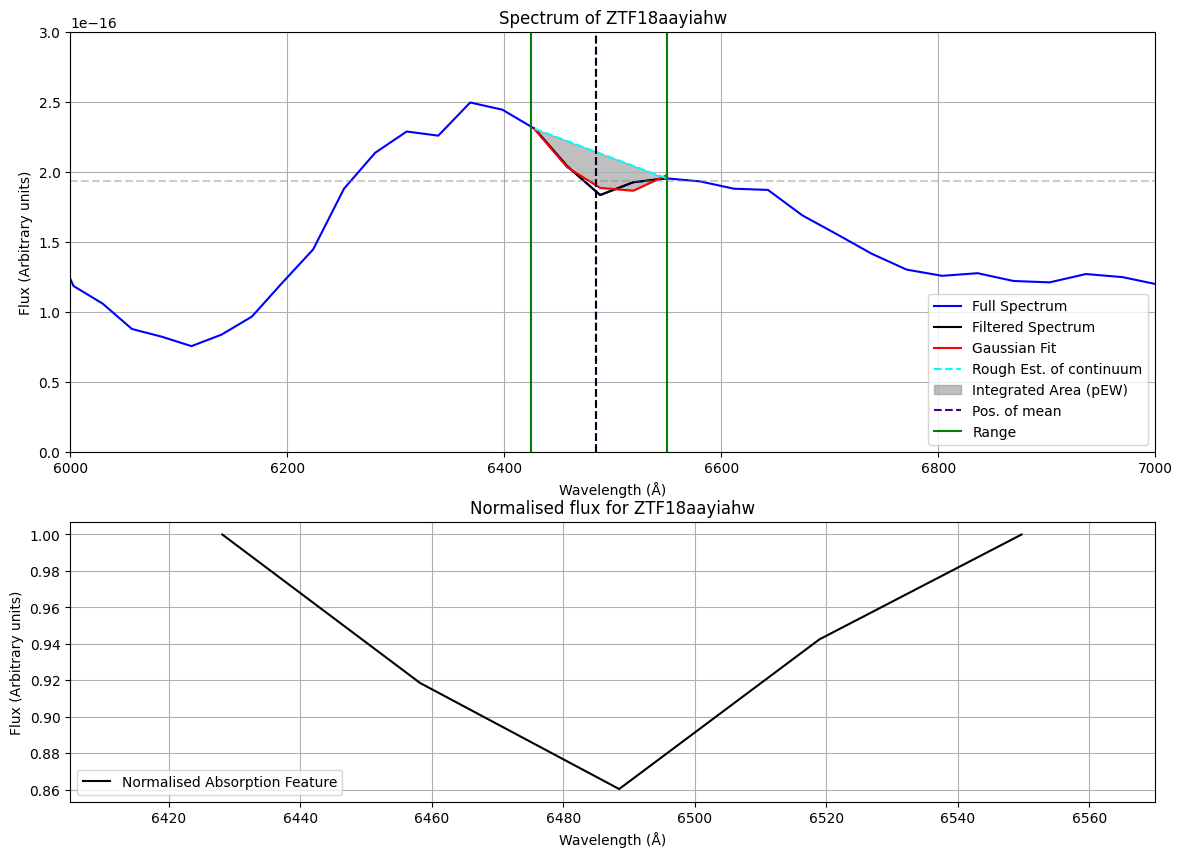

In [213]:
#          supernova id   a = amp   b = mean  c = spread   h = height     min   max   spec line  x1    x2     y1       y2     W
gaussplotpewc("ZTF18aayiahw", .5e-16,   6485,       26,      .6e-16,     6425, 6550,   6590,   6000, 7000, .0e-16, 3e-16, 1e13)

# D - Plotting final results

# D1 - Plotting pEW vs dm15

For 6580 line

03fg - Slope: -0.014175027169757009 Intercept: 0.9304247277409292 R-squared: 0.03228160797472155 P-value: 0.8203291677129492 std err: 0.05487895337765182
02es - Slope: -0.00977198697068405 Intercept: 1.055153094462541 R-squared: 1.0 P-value: 0.0 std err: 0.0
ALL  - Slope: -0.04044029867894111 Intercept: 1.257549753015725 R-squared: 0.1686309025301557 P-value: 0.41865348378013356 std err: 0.04489652371061273

With linear model
03fg - Slope: -0.010864087475074382 Intercept: 0.9168232664474343
02es - Slope: -0.009771986970684059 Intercept: 1.055153094462541
All - Slope: -0.012623526791654969 Intercept: 0.9404150268852138

Significance of 03fg: -0.6893744870355583
Significance of 02es: -0.04559608273234333
Significance of combined data: -0.8054866895221076


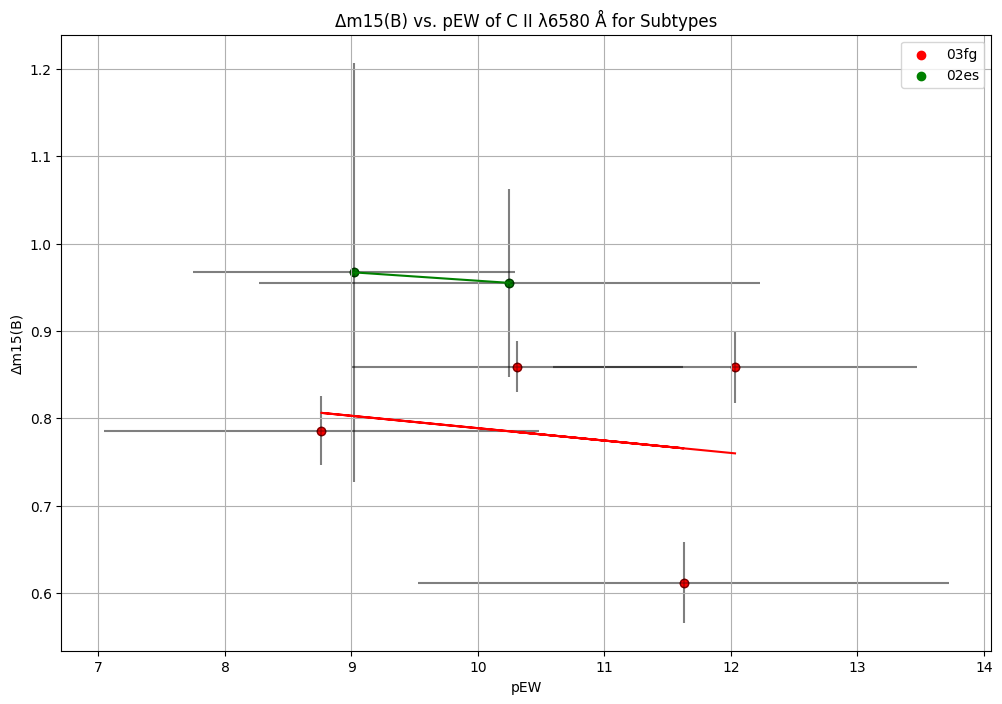

In [214]:
plt.figure(figsize = (12, 8))

pEW031 = np.array([10.31, 11.626, 8.761, 12.033])
pEW031 = (pEW031)
dm15031 = np.array([0.859, 0.612, 0.786, 0.859])
pew031err = np.array([1.31,2.1, 1.72, 1.44])
dm15031err = np.array([0.029, 0.046, 0.039, 0.041])

pEW021 = np.array([9.021, 10.249])
pEW021 = (pEW021)
dm15021 = np.array([0.967, 0.955])
pew021err = np.array([1.27, 1.98])
dm15021err = np.array([0.24, 0.108])

pEW_comb = np.concatenate((pEW031, pEW021))
dm15_comb = np.concatenate((dm15031, dm15021))
pEW_err_comb = np.concatenate((pew031err, pew021err))
dm_15_err_comb = np.concatenate((dm15031err, dm15021err))

def linear_model(x, a, b):
    return a * x + b

popt031, pcov031 = curve_fit(linear_model, pEW031, dm15031, sigma=dm15031err, absolute_sigma=True)
slope031c, intercept031c = popt031
popt021, pcov021 = curve_fit(linear_model, pEW021, dm15021, sigma=dm15021err, absolute_sigma=True)
slope021c, intercept021c = popt021
popt_comb, pcov_comb = curve_fit(linear_model, pEW_comb, dm15_comb, sigma=dm_15_err_comb, absolute_sigma=True)
slopecombc, interceptcombc = popt_comb

slope031, intercept031, r_value031, p_value031, std_err031 = linregress(pEW031, dm15031)
slope021, intercept021, r_value021, p_value021, std_err021 = linregress(pEW021, dm15021)
slopecomb, interceptcomb, r_valuecomb, p_valuecomb, std_errcomb = linregress(pEW_comb, dm15_comb)

plt.scatter(pEW031, dm15031, color='red', label='03fg', zorder=1)
plt.scatter(pEW021, dm15021, color='green', label='02es', zorder=1)
plt.errorbar(pEW031, dm15031, yerr = dm15031err, xerr = pew031err, fmt='o', color='red', markersize=6, markeredgecolor='k', ecolor='k', zorder=1, alpha = 0.5)
plt.errorbar(pEW021, dm15021, yerr = dm15021err, xerr = pew021err, fmt='o', color='green', markersize=6, markeredgecolor='k', ecolor='k', zorder=1, alpha = 0.5)

plt.plot(pEW031, [slope031 * x + intercept031 for x in pEW031], color='red')
plt.plot(pEW021, [slope021 * x + intercept021 for x in pEW021], color='green')
#plt.plot(pEW_comb, [slopecomb * x + interceptcomb for x in pEW_comb], color='blue', label = 'Data fitted together')

#plt.plot(pEW031, linear_model(pEW031, *popt031), color='#8B0000', linestyle = ':')
#plt.plot(pEW021, linear_model(pEW021, *popt021), color='#06402B', linestyle = ':')
#plt.plot(pEW_comb, linear_model(pEW_comb, *popt_comb), color='cyan', label='Data fitted together', linestyle = ':')

plt.title('Δm15(B) vs. pEW of C II λ6580 Å for Subtypes')
plt.ylabel('Δm15(B)')
plt.xlabel('pEW')

plt.grid(True)

plt.legend()

slope_error031 = np.sqrt(pcov031[0, 0])
slope_error021 = np.sqrt(pcov021[0, 0])
slope_errorcomb = np.sqrt(pcov_comb[0, 0])

print("03fg - Slope:", slope031, "Intercept:", intercept031, "R-squared:", r_value031**2, 'P-value:', p_value031, 'std err:', std_err031)
print("02es - Slope:", slope021, "Intercept:", intercept021, "R-squared:", r_value021**2, 'P-value:', p_value021, 'std err:', std_err021)
print("ALL  - Slope:", slopecomb, "Intercept:", interceptcomb, "R-squared:", r_valuecomb**2, 'P-value:', p_valuecomb, 'std err:', std_errcomb)
print()
print('With linear model')
print("03fg - Slope:", slope031c, 'Intercept:',  intercept031c)
print("02es - Slope:", slope021c, 'Intercept:',  intercept021c)
print("All - Slope:", slopecombc, 'Intercept:',  interceptcombc)

sig031 = slope031c/slope_error031
sig021 = slope021c/slope_error021
sigcomb = slopecombc/slope_errorcomb
print()
print('Significance of 03fg:', sig031)
print('Significance of 02es:', sig021)
print('Significance of combined data:', sigcomb)

plt.show()

With linregress:
03fg - Slope: -0.014175027169757009 Intercept: 0.9304247277409292 R-squared: 0.03228160797472155 P-value: 0.8203291677129492 std err: 0.05487895337765182
02es - Slope: -0.00977198697068405 Intercept: 1.055153094462541 R-squared: 1.0 P-value: 0.0 std err: 0.0
ALL  - Slope: -0.04044029867894111 Intercept: 1.257549753015725 R-squared: 0.1686309025301557 P-value: 0.41865348378013356 std err: 0.04489652371061273

With linear model
03fg - Slope: -0.010864087475074382 Intercept: 0.9168232664474343
02es - Slope: -0.009771986970684059 Intercept: 1.055153094462541
All - Slope: -0.012623526791654969 Intercept: 0.9404150268852138

Significance of 03fg: -0.6893744870355583
Significance of 02es: -0.04559608273234333
Significance of combined data: -0.8054866895221076


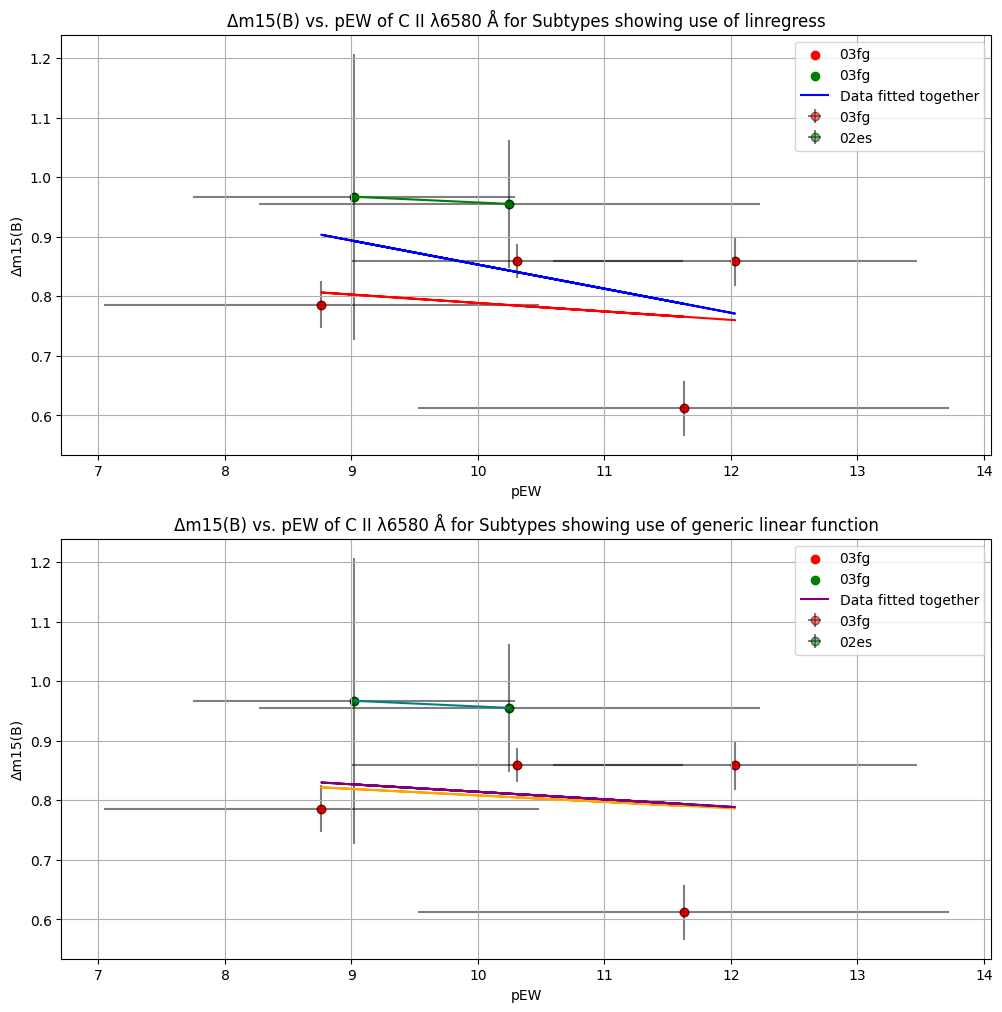

In [215]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [1, 1]})

pEW031 = np.array([10.31, 11.626, 8.761, 12.033])
pEW031 = (pEW031)
dm15031 = np.array([0.859, 0.612, 0.786, 0.859])
pew031err = np.array([1.31,2.1, 1.72, 1.44])
dm15031err = np.array([0.029, 0.046, 0.039, 0.041])

pEW021 = np.array([9.021, 10.249])
pEW021 = (pEW021)
dm15021 = np.array([0.967, 0.955])
pew021err = np.array([1.27, 1.98])
dm15021err = np.array([0.24, 0.108])

pEW_comb = np.concatenate((pEW031, pEW021))
dm15_comb = np.concatenate((dm15031, dm15021))
pEW_err_comb = np.concatenate((pew031err, pew021err))
dm_15_err_comb = np.concatenate((dm15031err, dm15021err))

def linear_model(x, a, b):
    return a * x + b

popt031, pcov031 = curve_fit(linear_model, pEW031, dm15031, sigma=dm15031err, absolute_sigma=True)
slope031c, intercept031c = popt031
popt021, pcov021 = curve_fit(linear_model, pEW021, dm15021, sigma=dm15021err, absolute_sigma=True)
slope021c, intercept021c = popt021
popt_comb, pcov_comb = curve_fit(linear_model, pEW_comb, dm15_comb, sigma=dm_15_err_comb, absolute_sigma=True)
slopecombc, interceptcombc = popt_comb

slope031, intercept031, r_value031, p_value031, std_err031 = linregress(pEW031, dm15031)
slope021, intercept021, r_value021, p_value021, std_err021 = linregress(pEW021, dm15021)
slopecomb, interceptcomb, r_valuecomb, p_valuecomb, std_errcomb = linregress(pEW_comb, dm15_comb)

ax1.scatter(pEW031, dm15031, color='red', label='03fg', zorder=1)
ax1.scatter(pEW021, dm15021, color='green', label='03fg', zorder=1)

ax2.scatter(pEW031, dm15031, color='red', label='03fg', zorder=1)
ax2.scatter(pEW021, dm15021, color='green', label='03fg', zorder=1)

ax1.errorbar(pEW031, dm15031, yerr = dm15031err, xerr = pew031err, fmt='o', color='red', markersize=6, markeredgecolor='k', ecolor='k', label='03fg', zorder=1, alpha = 0.5)
ax1.errorbar(pEW021, dm15021, yerr = dm15021err, xerr = pew021err, fmt='o', color='green', markersize=6, markeredgecolor='k', ecolor='k', label='02es', zorder=1, alpha = 0.5)

ax2.errorbar(pEW031, dm15031, yerr = dm15031err, xerr = pew031err, fmt='o', color='red', markersize=6, markeredgecolor='k', ecolor='k', label='03fg', zorder=1, alpha = 0.5)
ax2.errorbar(pEW021, dm15021, yerr = dm15021err, xerr = pew021err, fmt='o', color='green', markersize=6, markeredgecolor='k', ecolor='k', label='02es', zorder=1, alpha = 0.5)

ax1.plot(pEW031, [slope031 * x + intercept031 for x in pEW031], color='red')
ax1.plot(pEW021, [slope021 * x + intercept021 for x in pEW021], color='green')
ax1.plot(pEW_comb, [slopecomb * x + interceptcomb for x in pEW_comb], color='blue', label = 'Data fitted together')

ax2.plot(pEW031, linear_model(pEW031, *popt031), color='orange')
ax2.plot(pEW021, linear_model(pEW021, *popt021), color='teal')
ax2.plot(pEW_comb, linear_model(pEW_comb, *popt_comb), color='purple', label='Data fitted together')

ax1.set_title('Δm15(B) vs. pEW of C II λ6580 Å for Subtypes showing use of linregress')
ax1.set_ylabel('Δm15(B)')
ax1.set_xlabel('pEW')

ax2.set_title('Δm15(B) vs. pEW of C II λ6580 Å for Subtypes showing use of generic linear function')
ax2.set_ylabel('Δm15(B)')
ax2.set_xlabel('pEW')

ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

slope_error031 = np.sqrt(pcov031[0, 0])
slope_error021 = np.sqrt(pcov021[0, 0])
slope_errorcomb = np.sqrt(pcov_comb[0, 0])

print('With linregress:')
print("03fg - Slope:", slope031, "Intercept:", intercept031, "R-squared:", r_value031**2, 'P-value:', p_value031, 'std err:', std_err031)
print("02es - Slope:", slope021, "Intercept:", intercept021, "R-squared:", r_value021**2, 'P-value:', p_value021, 'std err:', std_err021)
print("ALL  - Slope:", slopecomb, "Intercept:", interceptcomb, "R-squared:", r_valuecomb**2, 'P-value:', p_valuecomb, 'std err:', std_errcomb)
print()
print('With linear model')
print("03fg - Slope:", slope031c, 'Intercept:',  intercept031c)
print("02es - Slope:", slope021c, 'Intercept:',  intercept021c)
print("All - Slope:", slopecombc, 'Intercept:',  interceptcombc)

sig031 = slope031c/slope_error031
sig021 = slope021c/slope_error021
sigcomb = slopecombc/slope_errorcomb
print()
print('Significance of 03fg:', sig031)
print('Significance of 02es:', sig021)
print('Significance of combined data:', sigcomb)

plt.show()

# Misc

For 7231 line

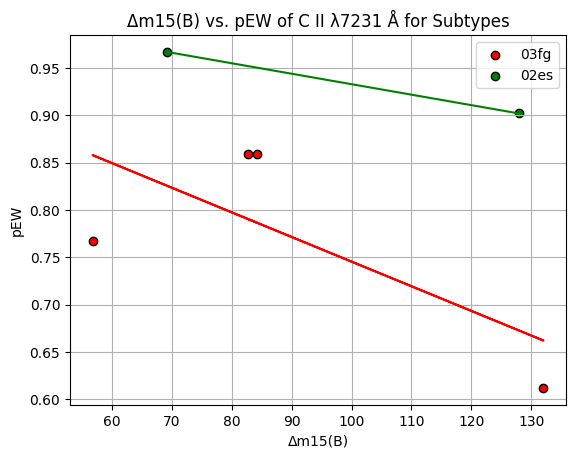

03fg - Slope: -0.0026004795042703795 Intercept: 1.0054846375197222 R-squared: 0.49110774526872697
02es - Slope: -0.0011055173821348382 Intercept: 1.0434476324920061
R-squared: 1.0 P-value: 0.0 std err: 0.0


In [ ]:
pEW03 = (82.716, 132.063, 56.725, 84.176)
pEW02 = (69.151, 127.947)
dm1503 = (0.859, 0.612, 0.767, 0.859)
dm1502 = (0.967, 0.902)

plt.scatter(pEW03, dm1503, color='red', s=36, edgecolor='k', label='03fg', zorder=1)
plt.scatter(pEW02, dm1502, color='green', s=36, edgecolor='k', label='02es', zorder=1)

slope03, intercept03, r_value03, p_value03, std_err03 = linregress(pEW03, dm1503)
slope02, intercept02, r_value02, p_value02, std_err02 = linregress(pEW02, dm1502)

plt.plot(pEW03, [slope03 * x + intercept03 for x in pEW03], color='red')
plt.plot(pEW02, [slope02 * x + intercept02 for x in pEW02], color='green')

plt.title('Δm15(B) vs. pEW of C II λ7231 Å for Subtypes')
plt.xlabel('Δm15(B)')
plt.ylabel('pEW')

plt.grid(True)

plt.legend()

plt.show()

print("03fg - Slope:", slope03, "Intercept:", intercept03, "R-squared:", r_value03**2)
print("02es - Slope:", slope02, "Intercept:", intercept02)
print("R-squared:", r_value02**2, 'P-value:', p_value02, 'std err:', std_err02)

02es 6580 - Slope: -0.00977198697068405 Intercept: 1.055153094462541 R-squared: 1.0 P-value: 0.0 std err: 0.0
02es 7231 - Slope: -0.0011055173821348382 Intercept: 1.0434476324920061 R-squared: 1.0 P-value: 0.0 std err: 0.0


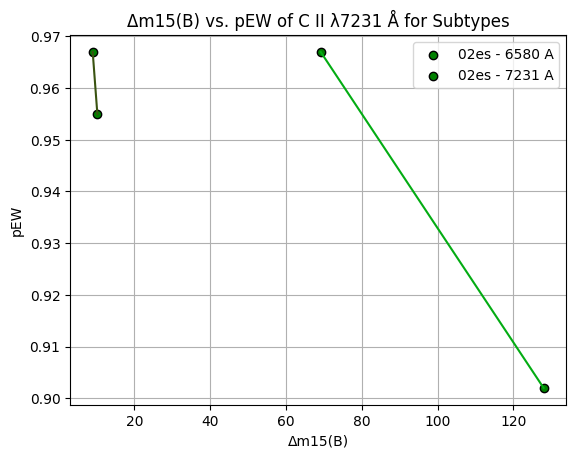

In [ ]:
# A potential relationship?
plt.scatter(pEW021, dm15021, color='green', s=36, edgecolor='k', label='02es - 6580 A', zorder=1)
plt.plot(pEW021, [slope021 * x + intercept021 for x in pEW021], color='#3A5311')

plt.scatter(pEW02, dm1502, color='green', s=36, edgecolor='k', label='02es - 7231 A', zorder=1)
plt.plot(pEW02, [slope02 * x + intercept02 for x in pEW02], color='#03AC13')

print("02es 6580 - Slope:", slope021, "Intercept:", intercept021, "R-squared:", r_value021**2, 'P-value:', p_value021, 'std err:', std_err021)
print("02es 7231 - Slope:", slope02, "Intercept:", intercept02, "R-squared:", r_value02**2, 'P-value:', p_value02, 'std err:', std_err02)

plt.title('Δm15(B) vs. pEW of C II λ7231 Å for Subtypes')
plt.xlabel('Δm15(B)')
plt.ylabel('pEW')

plt.grid(True)

plt.legend()

plt.show()